In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.6e}'.format)

In [2]:
# Load the dataset
df = pd.read_csv('fraudTrain.csv')

# Display the first few rows
df.head()

Index trans_date_trans_time       cc_num  \
0      0         1/1/2019 0:00 2.703190e+15   
1      1         1/1/2019 0:00 6.304230e+11   
2      2         1/1/2019 0:00 3.885950e+13   
3      3         1/1/2019 0:01 3.534090e+15   
4      4         1/1/2019 0:03 3.755340e+14   

                             merchant       category          amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net 4.970000e+00   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos 1.072300e+02  Stephanie   
2                fraud_Lind-Buckridge  entertainment 2.201100e+02     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport 4.500000e+01     Jeremy   
4                 fraud_Keeling-Crist       misc_pos 4.196000e+01      Tyler   

      last gender                        street            city state    zip  \
0    Banks      F                561 Perry Cove  Moravian Falls    NC  28654   
1     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160   
2  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252   
3    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632   
4   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433   

           lat          long  city_pop                                job  \
0 3.607880e+01 -8.117810e+01      3495          Psychologist, counselling   
1 4.888780e+01 -1.182105e+02       149  Special educational needs teacher   
2 4.218080e+01 -1.122620e+02      4154        Nature conservation officer   
3 4.623060e+01 -1.121138e+02      1939                    Patent attorney   
4 3.842070e+01 -7.946290e+01        99     Dance movement psychotherapist   

         dob                         trans_num   unix_time    merch_lat  \
0   3/9/1988  0b242abb623afc578575680df30655b9  1325376018 3.601129e+01   
1  6/21/1978  1f76529f8574734946361c461b024d99  1325376044 4.915905e+01   
2  1/19/1962  a1a22d70485983eac12b5b88dad1cf95  1325376051 4.315070e+01   
3  1/12/1967  6b849c168bdad6f867558c3793159a81  1325376076 4.703433e+01   
4  3/28/1986  a41d7549acf90789359a9aa5346dcb46  1325376186 3.867500e+01   

     merch_long  is_fraud  
0 -8.204832e+01         0  
1 -1.181865e+02         0  
2 -1.121545e+02         0  
3 -1.125611e+02         0  
4 -7.863246e+01         0

In [3]:
# Display dataset information
print(df.info())

# Display summary statistics
df.describe()

# Count of 'is_fraud' values
df['is_fraud'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Index                  1048575 non-null  int64  
 1   trans_date_trans_time  1048575 non-null  object 
 2   cc_num                 1048575 non-null  float64
 3   merchant               1048575 non-null  object 
 4   category               1048575 non-null  object 
 5   amt                    1048575 non-null  float64
 6   first                  1048575 non-null  object 
 7   last                   1048575 non-null  object 
 8   gender                 1048575 non-null  object 
 9   street                 1048575 non-null  object 
 10  city                   1048575 non-null  object 
 11  state                  1048575 non-null  object 
 12  zip                    1048575 non-null  int64  
 13  lat                    1048575 non-null  float64
 14  long              

is_fraud
0    1042569
1       6006
Name: count, dtype: int64

In [4]:
# Calculate and print missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 Index                    0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [5]:
# Convert 'trans_date_trans_time' to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
print("Data type after conversion:", df.dtypes['trans_date_trans_time'])

# Convert 'dob' to datetime
df['dob'] = pd.to_datetime(df['dob'])

# Display updated data types
df.dtypes

Data type after conversion: datetime64[ns]


Index                             int64
trans_date_trans_time    datetime64[ns]
cc_num                          float64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

In [6]:
# Calculate age
df['age'] = df.apply(
    lambda x: x['trans_date_trans_time'].year - x['dob'].year
              - ((x['trans_date_trans_time'].month, x['trans_date_trans_time'].day)
                 < (x['dob'].month, x['dob'].day)),
    axis=1
)

In [7]:
# Extract year, month, hour, and day of week
df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek

# Display first few rows with new features
df.head()

Index trans_date_trans_time       cc_num  \
0      0   2019-01-01 00:00:00 2.703190e+15   
1      1   2019-01-01 00:00:00 6.304230e+11   
2      2   2019-01-01 00:00:00 3.885950e+13   
3      3   2019-01-01 00:01:00 3.534090e+15   
4      4   2019-01-01 00:03:00 3.755340e+14   

                             merchant       category          amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net 4.970000e+00   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos 1.072300e+02  Stephanie   
2                fraud_Lind-Buckridge  entertainment 2.201100e+02     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport 4.500000e+01     Jeremy   
4                 fraud_Keeling-Crist       misc_pos 4.196000e+01      Tyler   

      last gender                        street            city state    zip  \
0    Banks      F                561 Perry Cove  Moravian Falls    NC  28654   
1     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160   
2  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252   
3    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632   
4   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433   

           lat          long  city_pop                                job  \
0 3.607880e+01 -8.117810e+01      3495          Psychologist, counselling   
1 4.888780e+01 -1.182105e+02       149  Special educational needs teacher   
2 4.218080e+01 -1.122620e+02      4154        Nature conservation officer   
3 4.623060e+01 -1.121138e+02      1939                    Patent attorney   
4 3.842070e+01 -7.946290e+01        99     Dance movement psychotherapist   

         dob                         trans_num   unix_time    merch_lat  \
0 1988-03-09  0b242abb623afc578575680df30655b9  1325376018 3.601129e+01   
1 1978-06-21  1f76529f8574734946361c461b024d99  1325376044 4.915905e+01   
2 1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051 4.315070e+01   
3 1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076 4.703433e+01   
4 1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186 3.867500e+01   

     merch_long  is_fraud  age  year  month  hour  day_of_week  
0 -8.204832e+01         0   30  2019      1     0            1  
1 -1.181865e+02         0   40  2019      1     0            1  
2 -1.121545e+02         0   56  2019      1     0            1  
3 -1.125611e+02         0   51  2019      1     0            1  
4 -7.863246e+01         0   32  2019      1     0            1

In [8]:
print("Days of week:", df['day_of_week'].unique())
print("\nHours:", df['hour'].unique())
print("\nMonths:", df['month'].unique())
print("\nYears:", df['year'].unique())

Days of week: [1 2 3 4 5 6 0]

Hours: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]

Months: [ 1  2  3  4  5  6  7  8  9 10 11 12]

Years: [2019 2020]


In [9]:
# Drop specified columns
df.drop(['Index', 'trans_date_trans_time', 'first', 'last', 'dob'], axis=1, inplace=True)

# Display updated DataFrame
df.head()

# Display updated DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   cc_num       1048575 non-null  float64
 1   merchant     1048575 non-null  object 
 2   category     1048575 non-null  object 
 3   amt          1048575 non-null  float64
 4   gender       1048575 non-null  object 
 5   street       1048575 non-null  object 
 6   city         1048575 non-null  object 
 7   state        1048575 non-null  object 
 8   zip          1048575 non-null  int64  
 9   lat          1048575 non-null  float64
 10  long         1048575 non-null  float64
 11  city_pop     1048575 non-null  int64  
 12  job          1048575 non-null  object 
 13  trans_num    1048575 non-null  object 
 14  unix_time    1048575 non-null  int64  
 15  merch_lat    1048575 non-null  float64
 16  merch_long   1048575 non-null  float64
 17  is_fraud     1048575 non-null  int64  
 18  ag

In [10]:
# Update float format for summary statistics
pd.set_option('display.float_format', '{:.5f}'.format)
df.describe()

cc_num           amt           zip           lat  \
count             1048575.00000 1048575.00000 1048575.00000 1048575.00000   
mean   417156502027958336.00000      70.27910   48801.59060      38.53336   
std   1308811172818592768.00000     159.95184   26898.04035       5.07685   
min           60416207185.00000       1.00000    1257.00000      20.02710   
25%       180040000000000.00000       9.64000   26237.00000      34.62050   
50%      3520550000000000.00000      47.45000   48174.00000      39.35430   
75%      4642260000000000.00000      83.05000   72042.00000      41.94040   
max   4992350000000000000.00000   28948.90000   99783.00000      66.69330   

               long      city_pop        unix_time     merch_lat  \
count 1048575.00000 1048575.00000    1048575.00000 1048575.00000   
mean      -90.22626   89057.75906 1344905832.77866      38.53346   
std        13.75858  302435.05762   10196997.48378       5.11123   
min      -165.67230      23.00000 1325376018.00000      19.02779   
25%       -96.79800     743.00000 1336682353.00000      34.72954   
50%       -87.47690    2456.00000 1344901521.00000      39.36295   
75%       -80.15800   20328.00000 1354366012.00000      41.95602   
max       -67.95030 2906700.00000 1362931730.00000      67.51027   

         merch_long      is_fraud           age          year         month  \
count 1048575.00000 1048575.00000 1048575.00000 1048575.00000 1048575.00000   
mean      -90.22648       0.00573      45.38840    2019.11799       6.51480   
std        13.77093       0.07547      17.38094       0.32260       3.66834   
min      -166.67124       0.00000      13.00000    2019.00000       1.00000   
25%       -96.89864       0.00000      32.00000    2019.00000       3.00000   
50%       -87.43923       0.00000      43.00000    2019.00000       7.00000   
75%       -80.23228       0.00000      56.00000    2019.00000      10.00000   
max       -66.95090       1.00000      95.00000    2020.00000      12.00000   

               hour   day_of_week  
count 1048575.00000 1048575.00000  
mean       12.80077       3.13559  
std         6.81686       2.20050  
min         0.00000       0.00000  
25%         7.00000       1.00000  
50%        14.00000       3.00000  
75%        19.00000       5.00000  
max        23.00000       6.00000

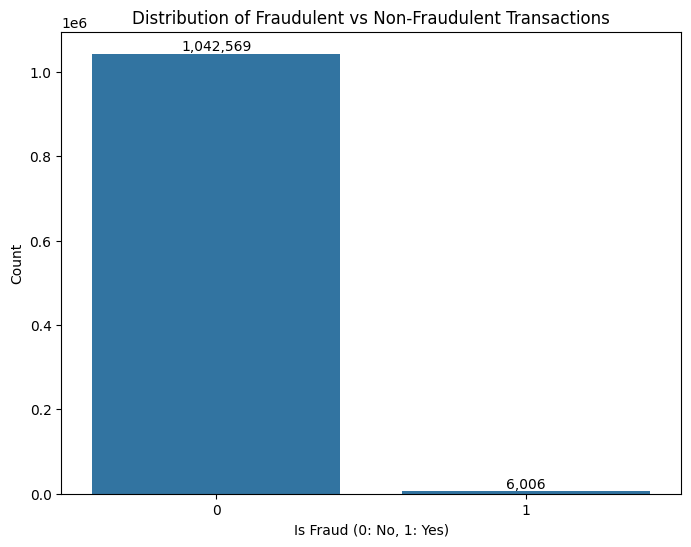

In [11]:
# Create a count plot for 'is_fraud'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='is_fraud')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Is Fraud (0: No, 1: Yes)')
plt.ylabel('Count')

# Annotate counts on the bars
counts = df['is_fraud'].value_counts()
for i, count in enumerate(counts):
    plt.text(i, count, f'{count:,}', ha='center', va='bottom')

plt.show()

In [12]:
# Calculate and print percentages
fraud_percentages = df['is_fraud'].value_counts(normalize=True) * 100
print("Percentage of transactions:")
print(f"Non-Fraud (0): {fraud_percentages[0]:.2f}%")
print(f"Fraud (1): {fraud_percentages[1]:.2f}%")

Percentage of transactions:
Non-Fraud (0): 99.43%
Fraud (1): 0.57%


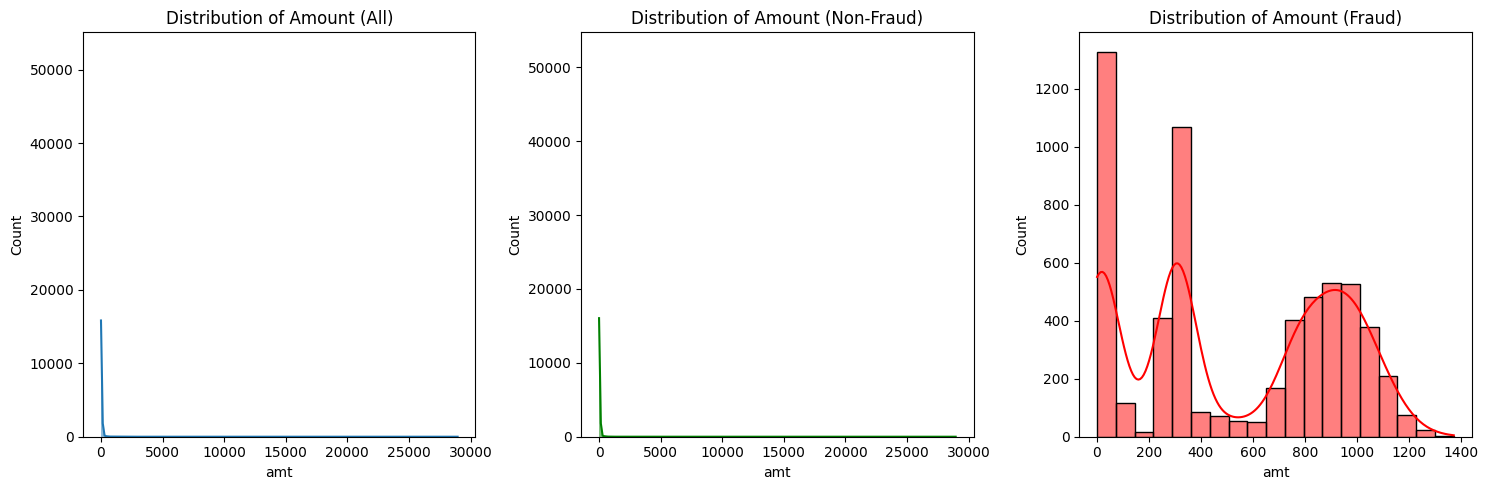

In [13]:
# Create subplots for amount distributions
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

# All transactions
sns.histplot(data=df, x='amt', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Amount (All)')

# Non-Fraudulent transactions
sns.histplot(data=df[df['is_fraud'] == 0], x='amt', kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of Amount (Non-Fraud)')

# Fraudulent transactions
sns.histplot(data=df[df['is_fraud'] == 1], x='amt', kde=True, ax=axes[2], color='red')
axes[2].set_title('Distribution of Amount (Fraud)')

plt.tight_layout()
plt.show()

In [14]:
from sklearn.preprocessing import RobustScaler

# Create a copy of the DataFrame for scaling
df_copy = df.copy()

# Initialize RobustScaler
scaler = RobustScaler()

# Scale the 'amt' column
df_copy['amt'] = scaler.fit_transform(df_copy[['amt']])

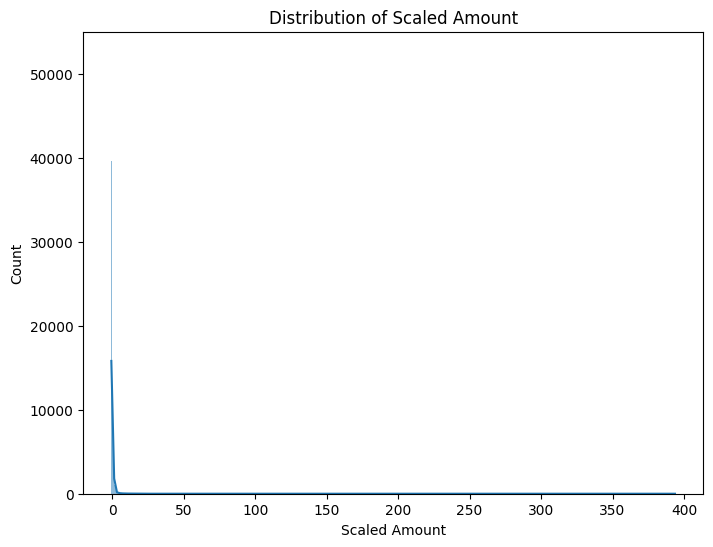

In [15]:
# Plot distribution of scaled 'amt'
plt.figure(figsize=(8, 6))
sns.histplot(data=df_copy, x='amt', kde=True)
plt.title('Distribution of Scaled Amount')
plt.xlabel('Scaled Amount')
plt.show()

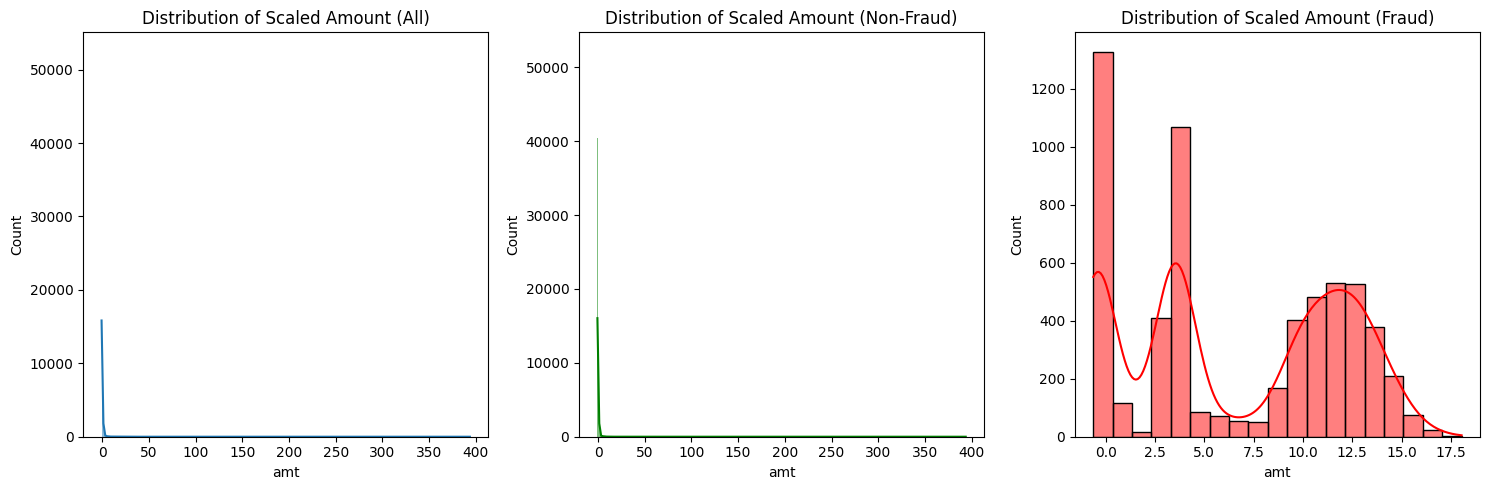

In [16]:
# Create subplots for scaled amount distributions
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

# All transactions
sns.histplot(data=df_copy, x='amt', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Scaled Amount (All)')

# Non-Fraudulent transactions
sns.histplot(data=df_copy[df_copy['is_fraud'] == 0], x='amt', kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of Scaled Amount (Non-Fraud)')

# Fraudulent transactions
sns.histplot(data=df_copy[df_copy['is_fraud'] == 1], x='amt', kde=True, ax=axes[2], color='red')
axes[2].set_title('Distribution of Scaled Amount (Fraud)')

plt.tight_layout()
plt.show()

/var/folders/z9/cvzm0bkn2gv0qywmh29rgvrr0000gn/T/ipykernel_57294/2366663246.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df, ax=axes[0, 0], palette='Blues')
/var/folders/z9/cvzm0bkn2gv0qywmh29rgvrr0000gn/T/ipykernel_57294/2366663246.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day_of_week', data=df, ax=axes[0, 1], palette='Greens')
/var/folders/z9/cvzm0bkn2gv0qywmh29rgvrr0000gn/T/ipykernel_57294/2366663246.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month', data=df, ax=axes[0, 2], palette='O

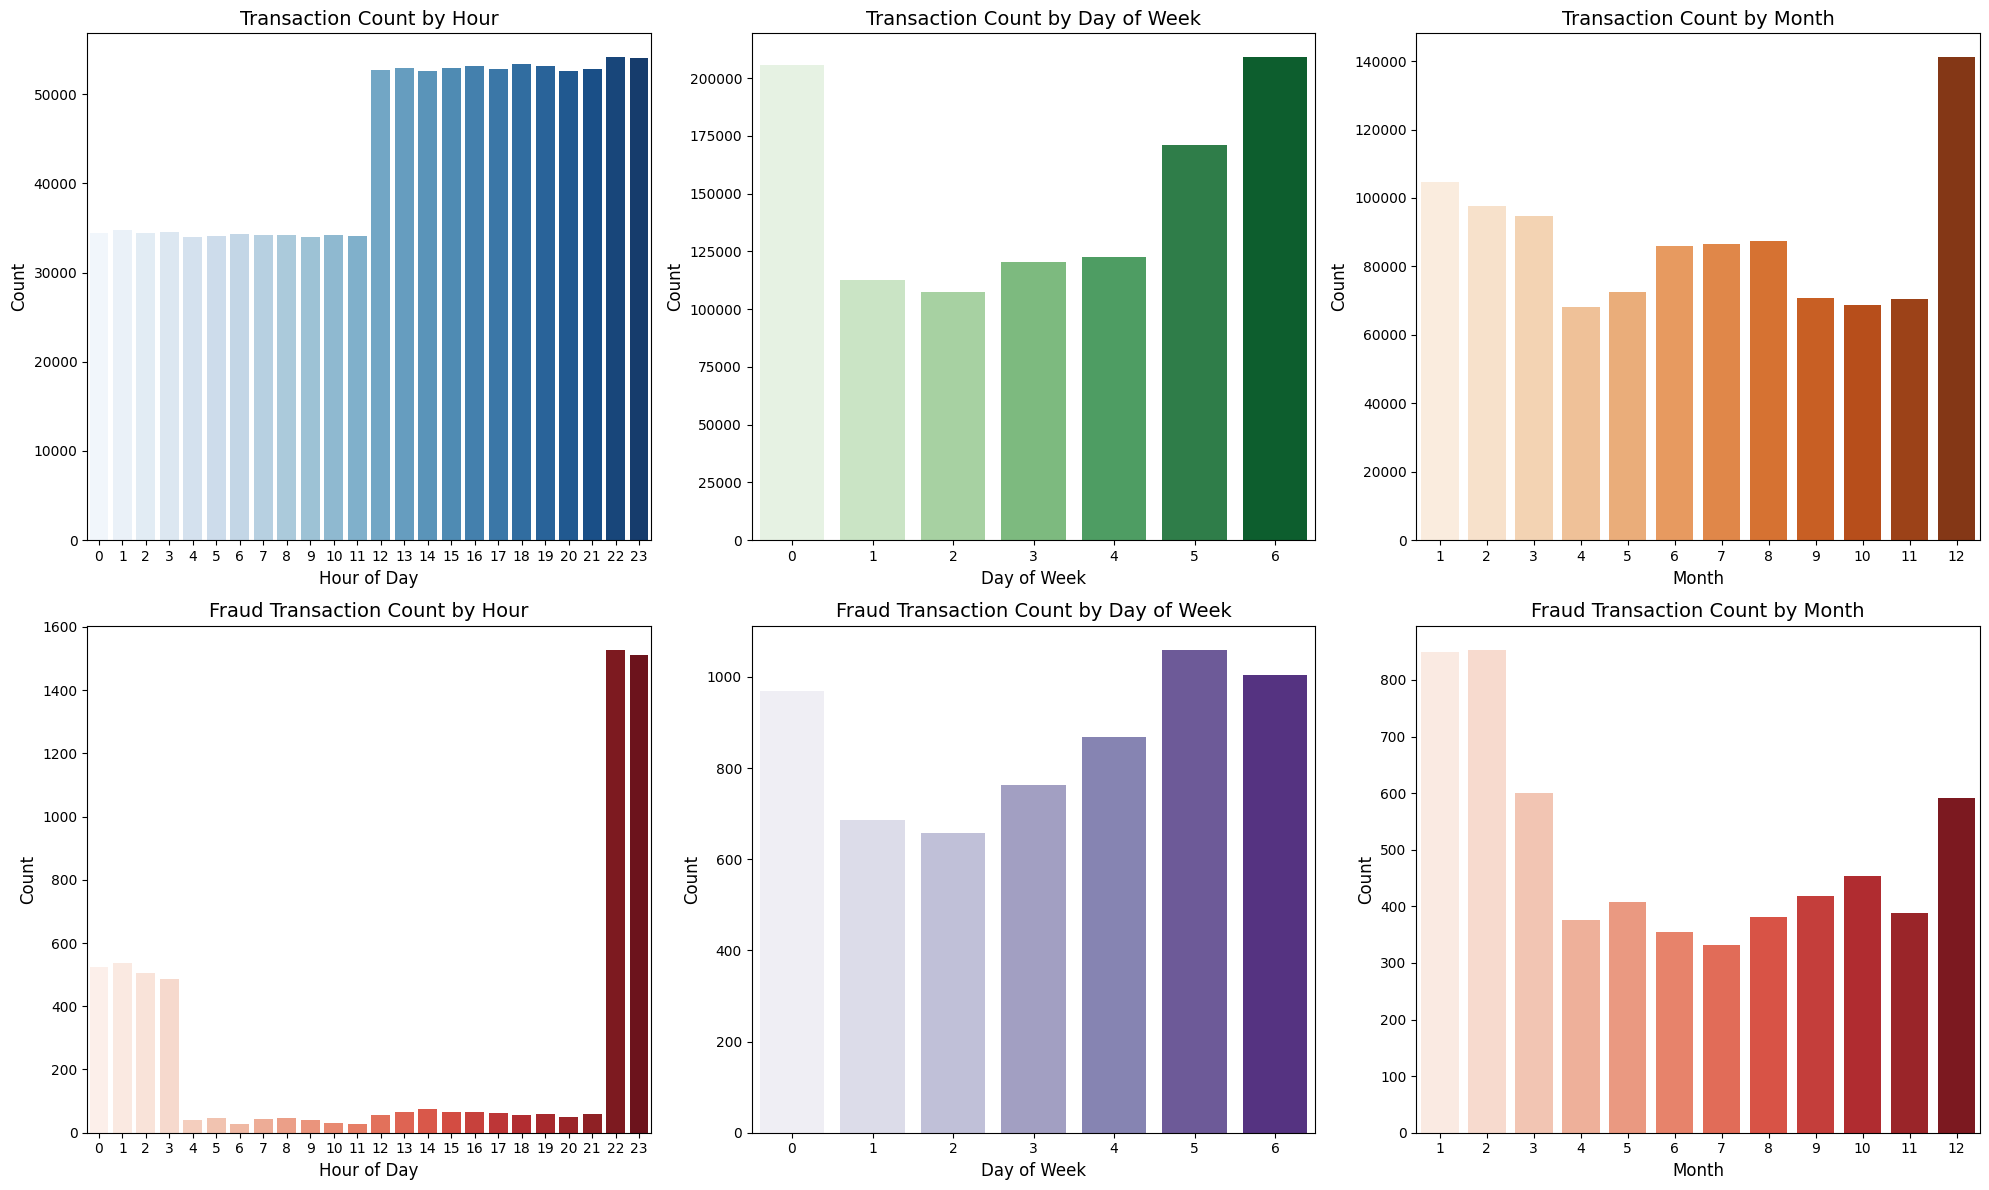

In [17]:
# Create a grid of subplots for EDA
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Transaction Count by Hour
sns.countplot(x='hour', data=df, ax=axes[0, 0], palette='Blues')
axes[0, 0].set_title('Transaction Count by Hour', fontsize=14)
axes[0, 0].set_xlabel('Hour of Day', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)

# Transaction Count by Day of Week
sns.countplot(x='day_of_week', data=df, ax=axes[0, 1], palette='Greens')
axes[0, 1].set_title('Transaction Count by Day of Week', fontsize=14)
axes[0, 1].set_xlabel('Day of Week', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)

# Transaction Count by Month
sns.countplot(x='month', data=df, ax=axes[0, 2], palette='Oranges')
axes[0, 2].set_title('Transaction Count by Month', fontsize=14)
axes[0, 2].set_xlabel('Month', fontsize=12)
axes[0, 2].set_ylabel('Count', fontsize=12)

# Filter for fraudulent transactions
fraud_df = df[df['is_fraud'] == 1]

# Fraud Transaction Count by Hour
sns.countplot(x='hour', data=fraud_df, ax=axes[1, 0], palette='Reds')
axes[1, 0].set_title('Fraud Transaction Count by Hour', fontsize=14)
axes[1, 0].set_xlabel('Hour of Day', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)

# Fraud Transaction Count by Day of Week
sns.countplot(x='day_of_week', data=fraud_df, ax=axes[1, 1], palette='Purples')
axes[1, 1].set_title('Fraud Transaction Count by Day of Week', fontsize=14)
axes[1, 1].set_xlabel('Day of Week', fontsize=12)
axes[1, 1].set_ylabel('Count', fontsize=12)

# Fraud Transaction Count by Month
sns.countplot(x='month', data=fraud_df, ax=axes[1, 2], palette='Reds')
axes[1, 2].set_title('Fraud Transaction Count by Month', fontsize=14)
axes[1, 2].set_xlabel('Month', fontsize=12)
axes[1, 2].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

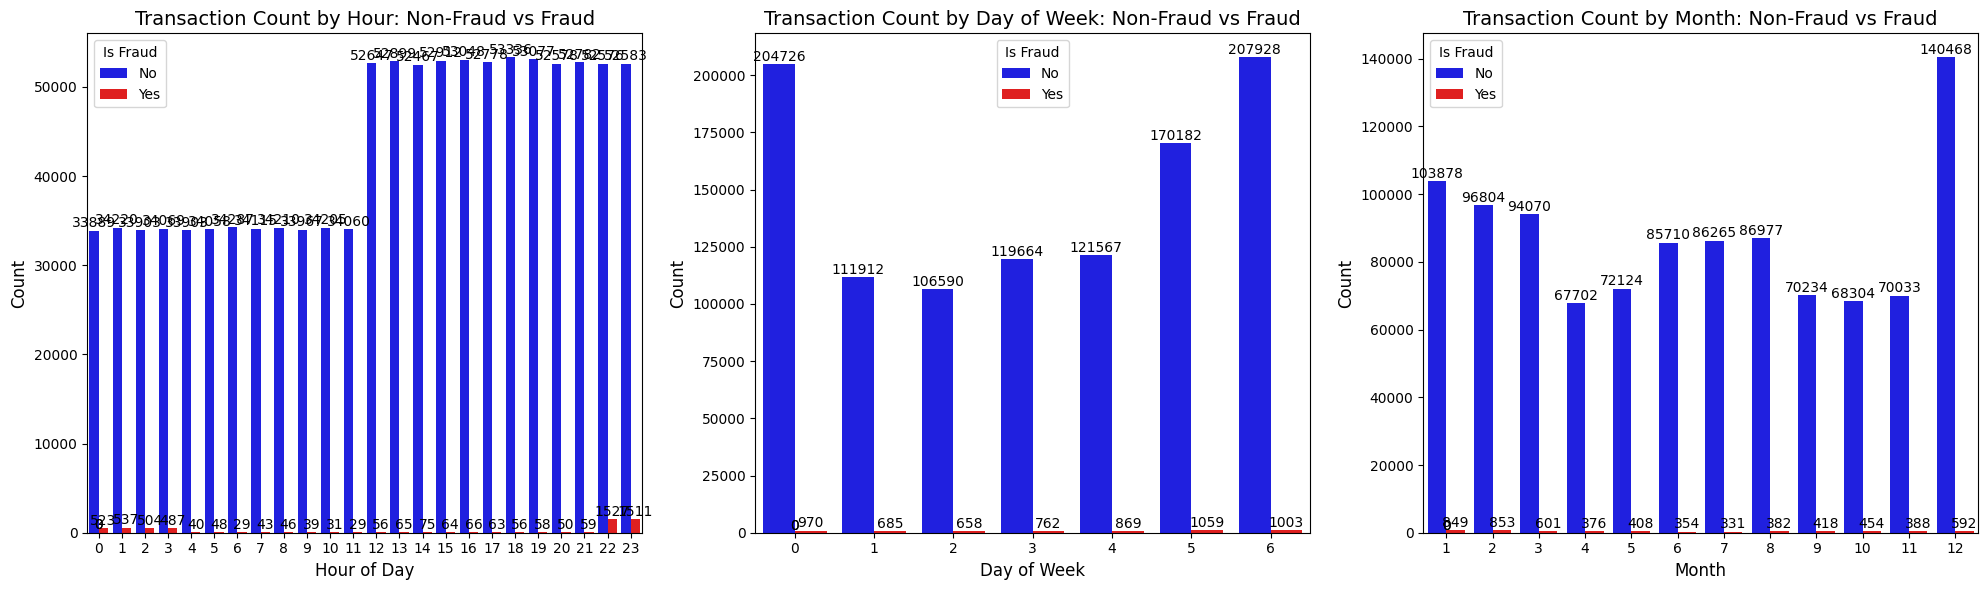

In [18]:
# Create subplots for comparison
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Transaction Count by Hour with Fraud Status
sns.countplot(x='hour', hue='is_fraud', data=df, ax=axes[0], palette={0: 'blue', 1: 'red'})
axes[0].set_title('Transaction Count by Hour: Non-Fraud vs Fraud', fontsize=14)
axes[0].set_xlabel('Hour of Day', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].legend(title='Is Fraud', labels=['No', 'Yes'])

# Transaction Count by Day of Week with Fraud Status
sns.countplot(x='day_of_week', hue='is_fraud', data=df, ax=axes[1], palette={0: 'blue', 1: 'red'})
axes[1].set_title('Transaction Count by Day of Week: Non-Fraud vs Fraud', fontsize=14)
axes[1].set_xlabel('Day of Week', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].legend(title='Is Fraud', labels=['No', 'Yes'])

# Transaction Count by Month with Fraud Status
sns.countplot(x='month', hue='is_fraud', data=df, ax=axes[2], palette={0: 'blue', 1: 'red'})
axes[2].set_title('Transaction Count by Month: Non-Fraud vs Fraud', fontsize=14)
axes[2].set_xlabel('Month', fontsize=12)
axes[2].set_ylabel('Count', fontsize=12)
axes[2].legend(title='Is Fraud', labels=['No', 'Yes'])

# Annotate counts on the bars
for ax in axes:
    for p in ax.patches:
        height = p.get_height()
        # Check if the bar color is red (Fraud)
        if p.get_facecolor()[0] == 1.0 and p.get_facecolor()[1] == 0.0 and p.get_facecolor()[2] == 0.0:
            ax.text(p.get_x() + p.get_width() / 2., height + 50,
                    f'{int(height)}', ha='center', va='bottom',
                    color='red', fontsize=10)
        else:
            ax.text(p.get_x() + p.get_width() / 2., height + 50,
                    f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [19]:
# -----------------------------------------------------------------
# FIXED: Separate transactions by Year & Month, instead of combining
# -----------------------------------------------------------------

# Group by 'year' and 'month', then by 'is_fraud'
transactions_per_year_month = (
    df.groupby(['year', 'month'])['is_fraud']
    .value_counts()
    .unstack()
    .fillna(0)
)

# Rename columns and calculate totals
transactions_per_year_month.rename(columns={0: 'Non Fraud', 1: 'Fraud'}, inplace=True)
transactions_per_year_month['Total'] = transactions_per_year_month['Non Fraud'] + transactions_per_year_month['Fraud']
transactions_per_year_month = transactions_per_year_month[['Total', 'Non Fraud', 'Fraud']]

print("Number of Transactions per Year & Month:")
print(transactions_per_year_month)

Number of Transactions per Year & Month:
is_fraud     Total  Non Fraud  Fraud
year month                          
2019 1       52525      52019    506
     2       49866      49349    517
     3       70939      70445    494
     4       68078      67702    376
     5       72532      72124    408
     6       86064      85710    354
     7       86596      86265    331
     8       87359      86977    382
     9       70652      70234    418
     10      68758      68304    454
     11      70421      70033    388
     12     141060     140468    592
2020 1       52202      51859    343
     2       47791      47455    336
     3       23732      23625    107


In [20]:
# Group by 'day_of_week' and 'is_fraud'
transactions_per_day = (
    df.groupby('day_of_week')['is_fraud']
    .value_counts()
    .unstack()
    .fillna(0)
)

# Rename columns and calculate totals
transactions_per_day.rename(columns={0: 'Non Fraud', 1: 'Fraud'}, inplace=True)
transactions_per_day['Total'] = transactions_per_day['Non Fraud'] + transactions_per_day['Fraud']
transactions_per_day = transactions_per_day[['Total', 'Non Fraud', 'Fraud']]

print("\nNumber of Transactions per Day of Week:")
print(transactions_per_day)


Number of Transactions per Day of Week:
is_fraud      Total  Non Fraud  Fraud
day_of_week                          
0            205696     204726    970
1            112597     111912    685
2            107248     106590    658
3            120426     119664    762
4            122436     121567    869
5            171241     170182   1059
6            208931     207928   1003


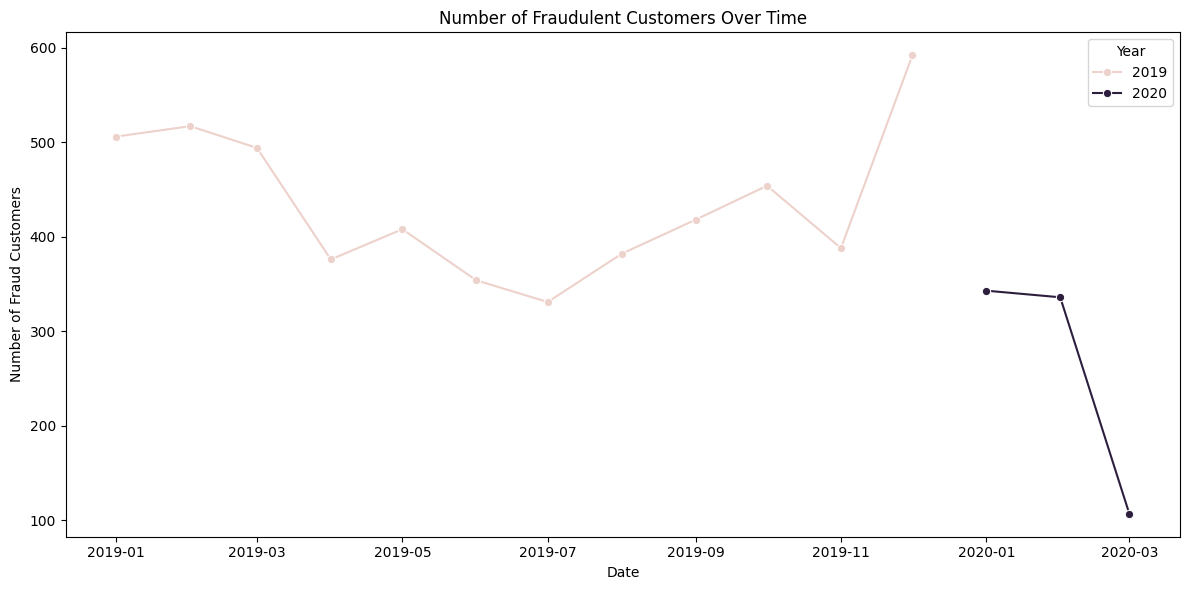

In [21]:
# Prepare data
fraud_data = transactions_per_year_month.reset_index()

# Create a datetime column for the first day of each month
fraud_data['date'] = pd.to_datetime(fraud_data[['year', 'month']].assign(DAY=1))

# Sort by date
fraud_data = fraud_data.sort_values('date')

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=fraud_data, x='date', y='Fraud', hue='year', marker='o')
plt.title('Number of Fraudulent Customers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Fraud Customers')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

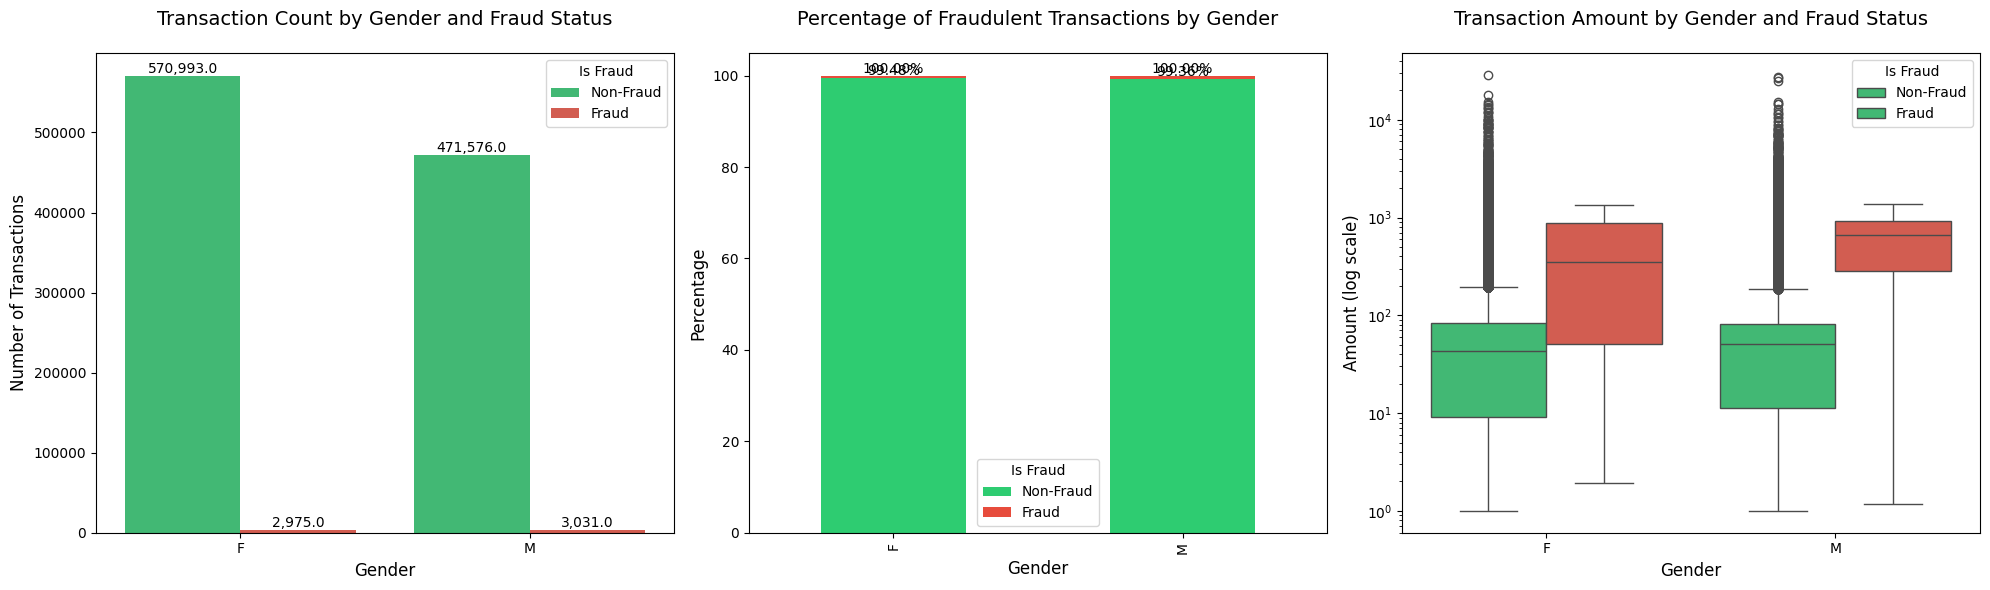

In [22]:
# Analysis of Fraud vs Non-Fraud Transactions by Gender
# Set consistent colors
fraud_color = '#e74c3c'     # Red for fraud
non_fraud_color = '#2ecc71'  # Green for non-fraud

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Count plot of transactions by gender and fraud status
sns.countplot(data=df, x='gender', hue='is_fraud', 
              palette={0: non_fraud_color, 1: fraud_color}, 
              ax=axes[0])
axes[0].set_title('Transaction Count by Gender and Fraud Status', fontsize=14, pad=20)
axes[0].set_xlabel('Gender', fontsize=12)
axes[0].set_ylabel('Number of Transactions', fontsize=12)
axes[0].legend(title='Is Fraud', labels=['Non-Fraud', 'Fraud'])

# Add count annotations
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='{:,}')

# 2. Percentage of fraud transactions by gender
fraud_gender = df.groupby('gender')['is_fraud'].value_counts(normalize=True).unstack() * 100
fraud_gender.plot(kind='bar', stacked=True, 
                 color=[non_fraud_color, fraud_color],
                 ax=axes[1])
axes[1].set_title('Percentage of Fraudulent Transactions by Gender', fontsize=14, pad=20)
axes[1].set_xlabel('Gender', fontsize=12)
axes[1].set_ylabel('Percentage', fontsize=12)
axes[1].legend(title='Is Fraud', labels=['Non-Fraud', 'Fraud'])

# Add percentage annotations
for c in axes[1].containers:
    axes[1].bar_label(c, fmt='%.2f%%')

# 3. Box plot of transaction amount by gender and fraud status
sns.boxplot(data=df, x='gender', y='amt', hue='is_fraud', 
            palette={0: non_fraud_color, 1: fraud_color},
            ax=axes[2])
axes[2].set_yscale('log')
axes[2].set_title('Transaction Amount by Gender and Fraud Status', fontsize=14, pad=20)
axes[2].set_xlabel('Gender', fontsize=12)
axes[2].set_ylabel('Amount (log scale)', fontsize=12)
axes[2].legend(title='Is Fraud', labels=['Non-Fraud', 'Fraud'])

plt.tight_layout()
plt.show()

/var/folders/z9/cvzm0bkn2gv0qywmh29rgvrr0000gn/T/ipykernel_57294/1637797985.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette=[non_fraud_color, fraud_color])


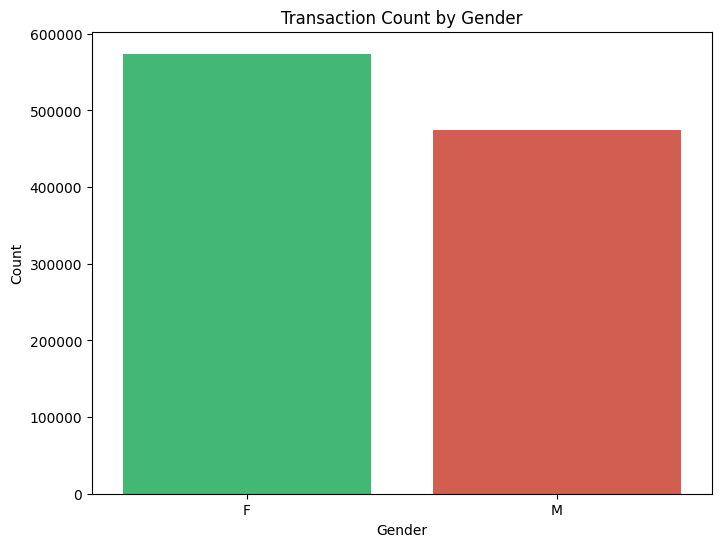

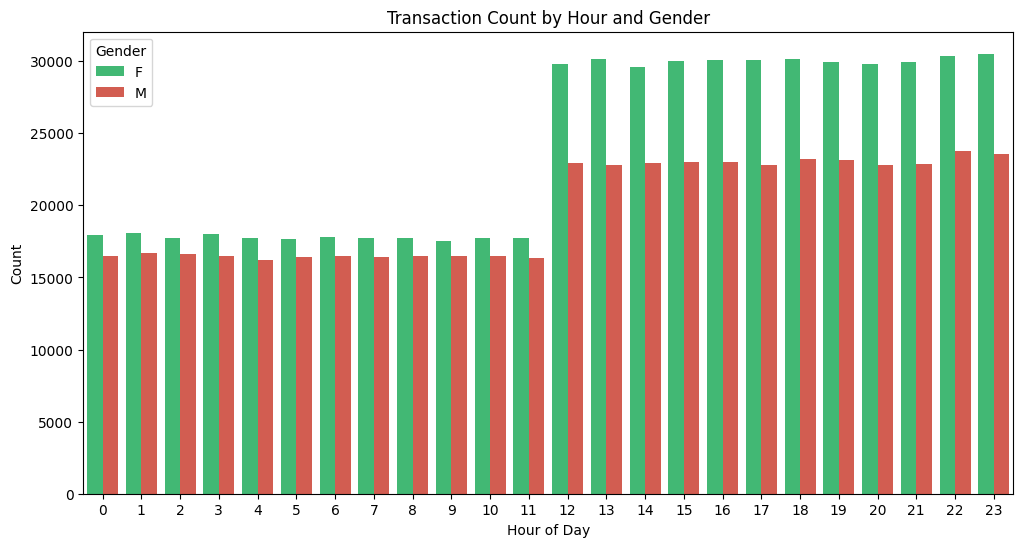

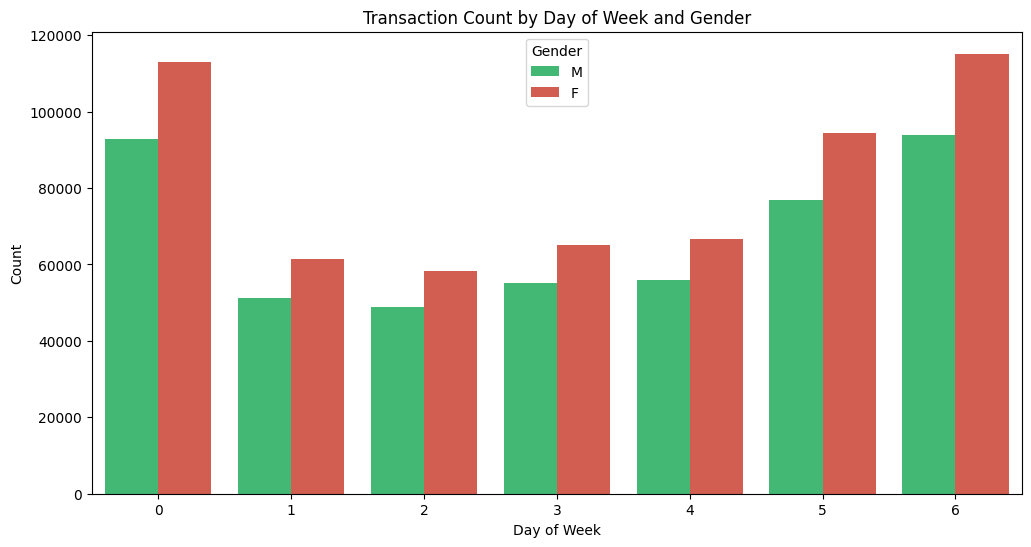

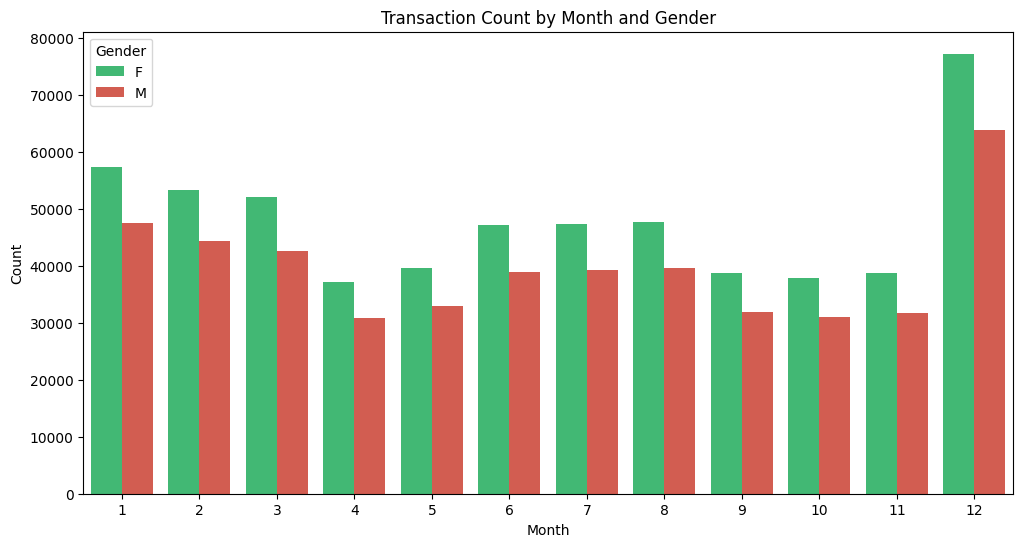

In [23]:
# Transaction Count by Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', palette=[non_fraud_color, fraud_color])
plt.title('Transaction Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Transaction Count by Gender and Hour
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='hour', hue='gender', palette=[non_fraud_color, fraud_color])
plt.title('Transaction Count by Hour and Gender')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# Transaction Count by Gender and Day of Week
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='day_of_week', hue='gender', palette=[non_fraud_color, fraud_color])
plt.title('Transaction Count by Day of Week and Gender')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# Transaction Count by Gender and Month
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='month', hue='gender', palette=[non_fraud_color, fraud_color])
plt.title('Transaction Count by Month and Gender')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()



In [24]:
# Create custom bins for 'age' with corresponding descriptive labels
bins = [0, 18, 25, 35, 45, 55, 65, float('inf')]
labels = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Display first few rows with 'age_group'
df.head()

cc_num                            merchant       category  \
0 2703190000000000.00000          fraud_Rippin, Kub and Mann       misc_net   
1     630423000000.00000     fraud_Heller, Gutmann and Zieme    grocery_pos   
2   38859500000000.00000                fraud_Lind-Buckridge  entertainment   
3 3534090000000000.00000  fraud_Kutch, Hermiston and Farrell  gas_transport   
4  375534000000000.00000                 fraud_Keeling-Crist       misc_pos   

        amt gender                        street            city state    zip  \
0   4.97000      F                561 Perry Cove  Moravian Falls    NC  28654   
1 107.23000      F  43039 Riley Greens Suite 393          Orient    WA  99160   
2 220.11000      M      594 White Dale Suite 530      Malad City    ID  83252   
3  45.00000      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632   
4  41.96000      M              408 Bradley Rest        Doe Hill    VA  24433   

       lat       long  city_pop                                job  \
0 36.07880  -81.17810      3495          Psychologist, counselling   
1 48.88780 -118.21050       149  Special educational needs teacher   
2 42.18080 -112.26200      4154        Nature conservation officer   
3 46.23060 -112.11380      1939                    Patent attorney   
4 38.42070  -79.46290        99     Dance movement psychotherapist   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018   36.01129   -82.04832   
1  1f76529f8574734946361c461b024d99  1325376044   49.15905  -118.18646   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051   43.15070  -112.15448   
3  6b849c168bdad6f867558c3793159a81  1325376076   47.03433  -112.56107   
4  a41d7549acf90789359a9aa5346dcb46  1325376186   38.67500   -78.63246   

   is_fraud  age  year  month  hour  day_of_week age_group  
0         0   30  2019      1     0            1     25-34  
1         0   40  2019      1     0            1     35-44  
2         0   56  2019      1     0            1     55-64  
3         0   51  2019      1     0            1     45-54  
4         0   32  2019      1     0            1     25-34

/var/folders/z9/cvzm0bkn2gv0qywmh29rgvrr0000gn/T/ipykernel_57294/817651740.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='age_group', palette='viridis')


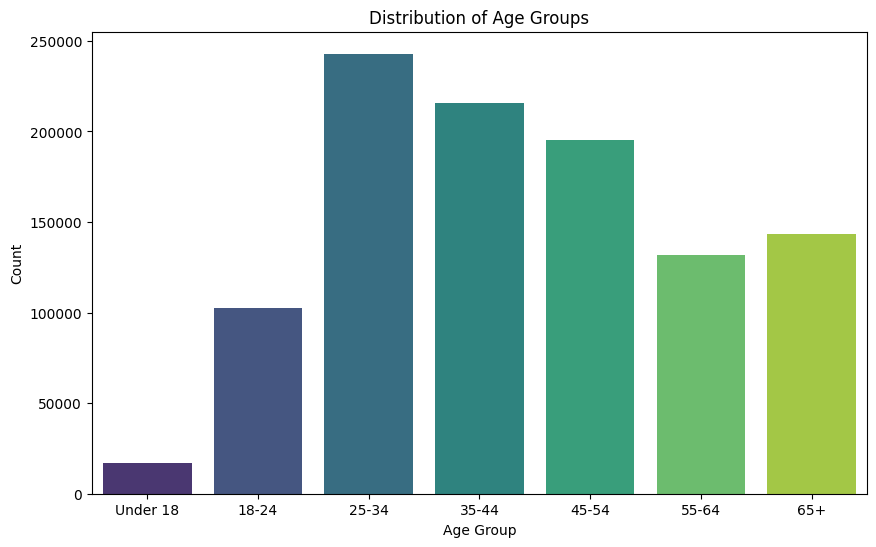

In [25]:
#show me the distribution of age_group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', palette='viridis')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

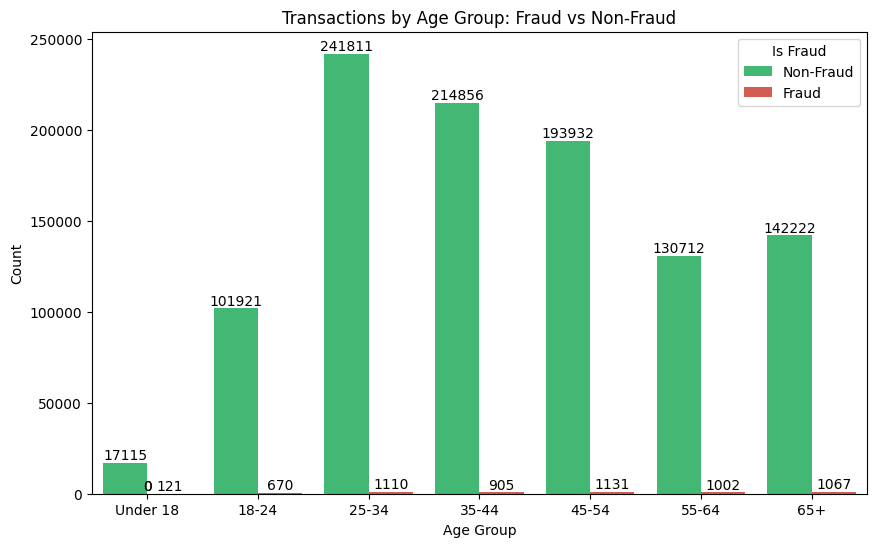

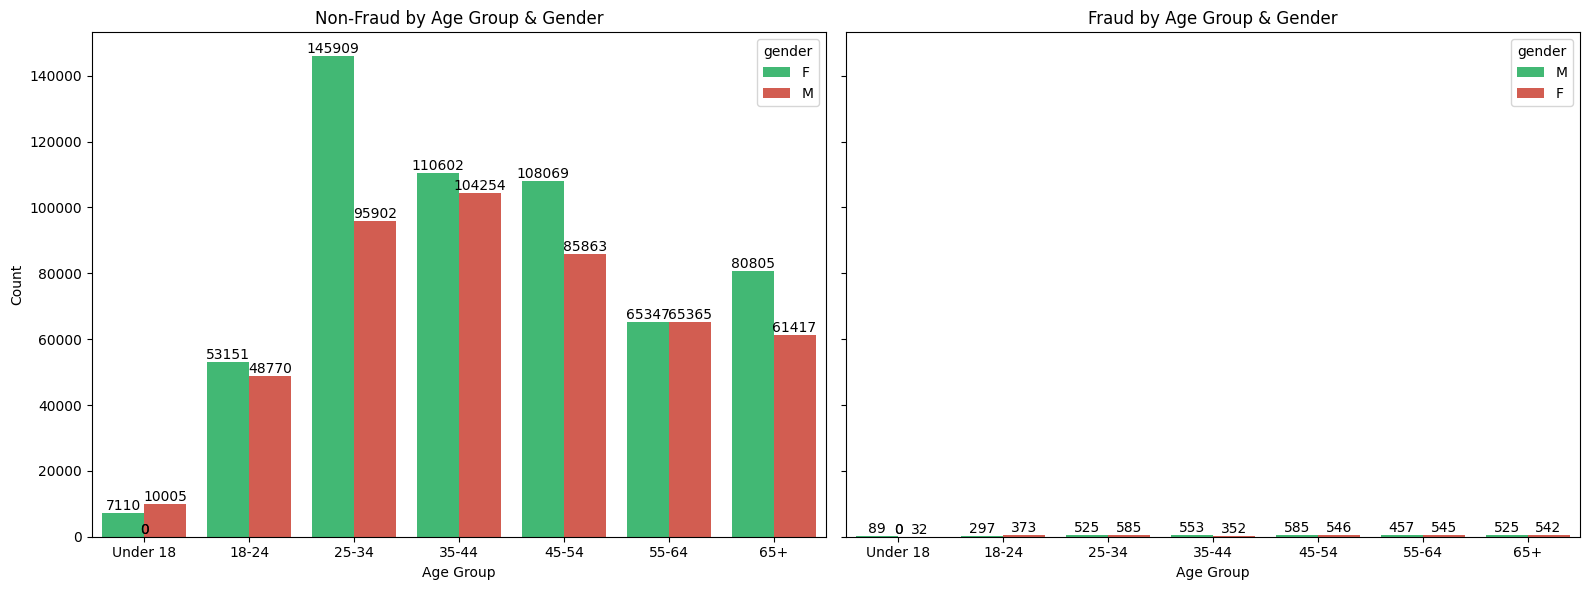

/var/folders/z9/cvzm0bkn2gv0qywmh29rgvrr0000gn/T/ipykernel_57294/357615660.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_age = df.groupby(['age_group', 'is_fraud']).size().unstack(fill_value=0)


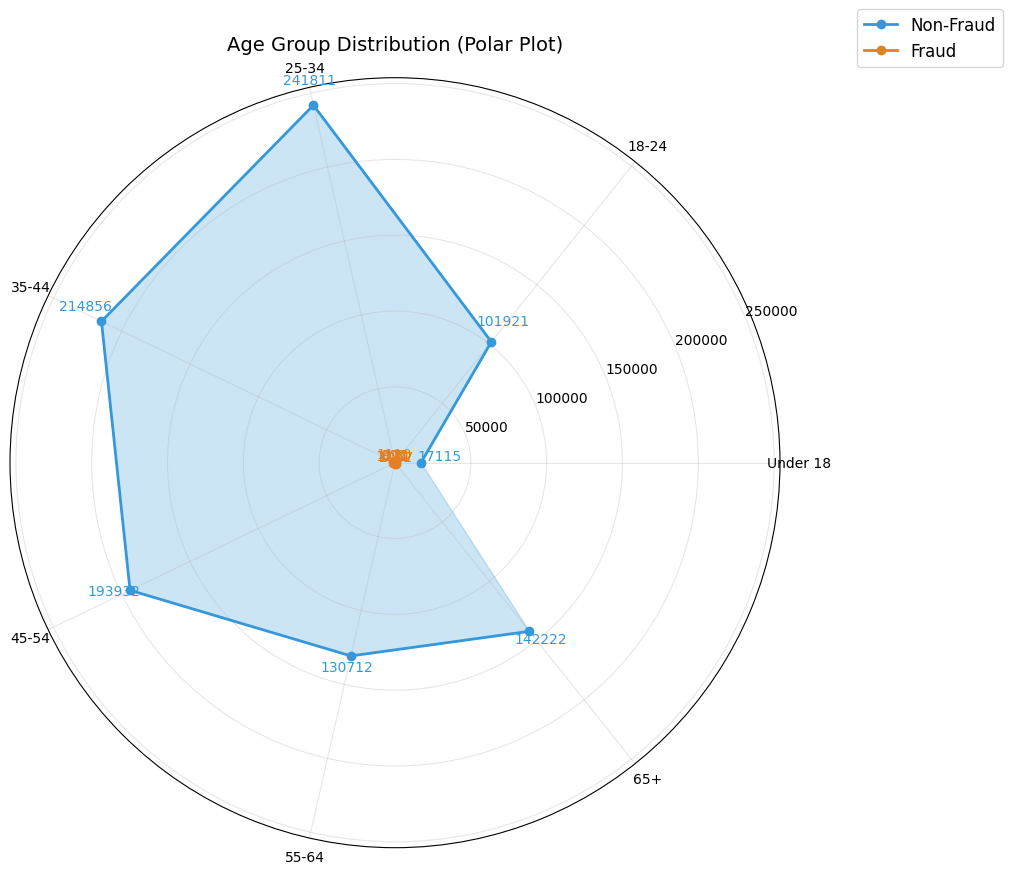

In [26]:
# Plot fraud vs non-fraud transactions by age group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', hue='is_fraud', palette={0: non_fraud_color, 1: fraud_color})
plt.title('Transactions by Age Group: Fraud vs Non-Fraud')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Is Fraud', labels=['Non-Fraud', 'Fraud'])

# Add counts on the bars
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')

plt.show()

# Plot fraud vs non-fraud transactions by age group and gender
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Non-Fraud by Age Group & Gender
sns.countplot(data=df[df['is_fraud'] == 0], x='age_group', hue='gender', ax=axes[0],
              palette=[non_fraud_color, fraud_color])
axes[0].set_title('Non-Fraud by Age Group & Gender')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')

# Add counts on the bars for Non-Fraud
for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f'{int(height)}', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='bottom')

# Fraud by Age Group & Gender
sns.countplot(data=df[df['is_fraud'] == 1], x='age_group', hue='gender', ax=axes[1],
              palette=[non_fraud_color, fraud_color])
axes[1].set_title('Fraud by Age Group & Gender')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Count')

# Add counts on the bars for Fraud
for p in axes[1].patches:
    height = p.get_height()
    axes[1].annotate(f'{int(height)}', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Create a polar plot for age distribution by fraud status
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, projection='polar')

# Prepare data for polar plot
fraud_by_age = df.groupby(['age_group', 'is_fraud']).size().unstack(fill_value=0)
angles = np.linspace(0, 2*np.pi, len(fraud_by_age), endpoint=False)

# Define a new color palette
non_fraud_color = '#3498db'  # Blue
fraud_color = '#e67e22'      # Orange

# Plot non-fraud
ax.plot(angles, fraud_by_age[0], 'o-', linewidth=2, label='Non-Fraud', color=non_fraud_color)
ax.fill(angles, fraud_by_age[0], alpha=0.25, color=non_fraud_color)

# Plot fraud
ax.plot(angles, fraud_by_age[1], 'o-', linewidth=2, label='Fraud', color=fraud_color)
ax.fill(angles, fraud_by_age[1], alpha=0.25, color=fraud_color)

# Set the labels
ax.set_xticks(angles)
ax.set_xticklabels(fraud_by_age.index)

# Add counts on the polar plot
for i, (angle, count_non_fraud, count_fraud) in enumerate(zip(angles, fraud_by_age[0], fraud_by_age[1])):
    ax.text(angle, count_non_fraud + max(fraud_by_age[0])*0.05, str(int(count_non_fraud)), 
            ha='center', va='bottom', color=non_fraud_color, fontsize=10)
    ax.text(angle, count_fraud + max(fraud_by_age[1])*0.05, str(int(count_fraud)), 
            ha='center', va='bottom', color=fraud_color, fontsize=10)

# Add title and legend with improved styling
plt.title('Age Group Distribution (Polar Plot)', pad=20, fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12)

# Add grid with custom style
ax.grid(True, alpha=0.3)

plt.show()

/var/folders/z9/cvzm0bkn2gv0qywmh29rgvrr0000gn/T/ipykernel_57294/3248357690.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_ratio = df.groupby(['age_group', 'gender'])['is_fraud'].mean().reset_index()


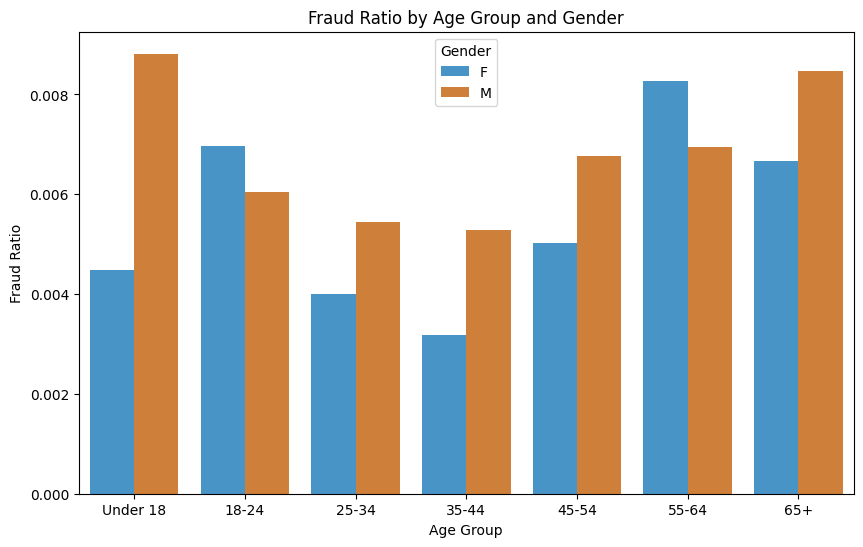

In [27]:
#give me a distribution of fraud ratio with regard to age and gender 
# Calculate fraud ratio per age group and gender
fraud_ratio = df.groupby(['age_group', 'gender'])['is_fraud'].mean().reset_index()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=fraud_ratio, x='age_group', y='is_fraud', hue='gender', palette={'F': non_fraud_color, 'M': fraud_color})
plt.title('Fraud Ratio by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Fraud Ratio')
plt.legend(title='Gender')
plt.show()


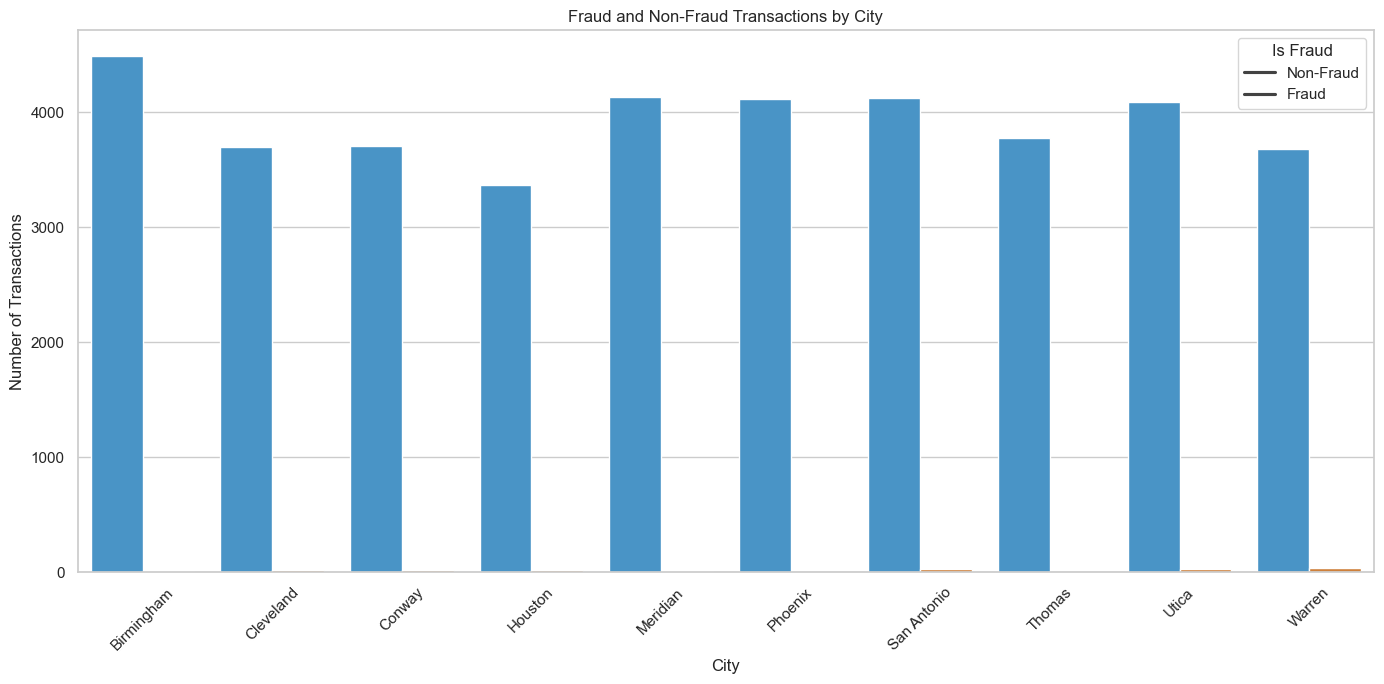

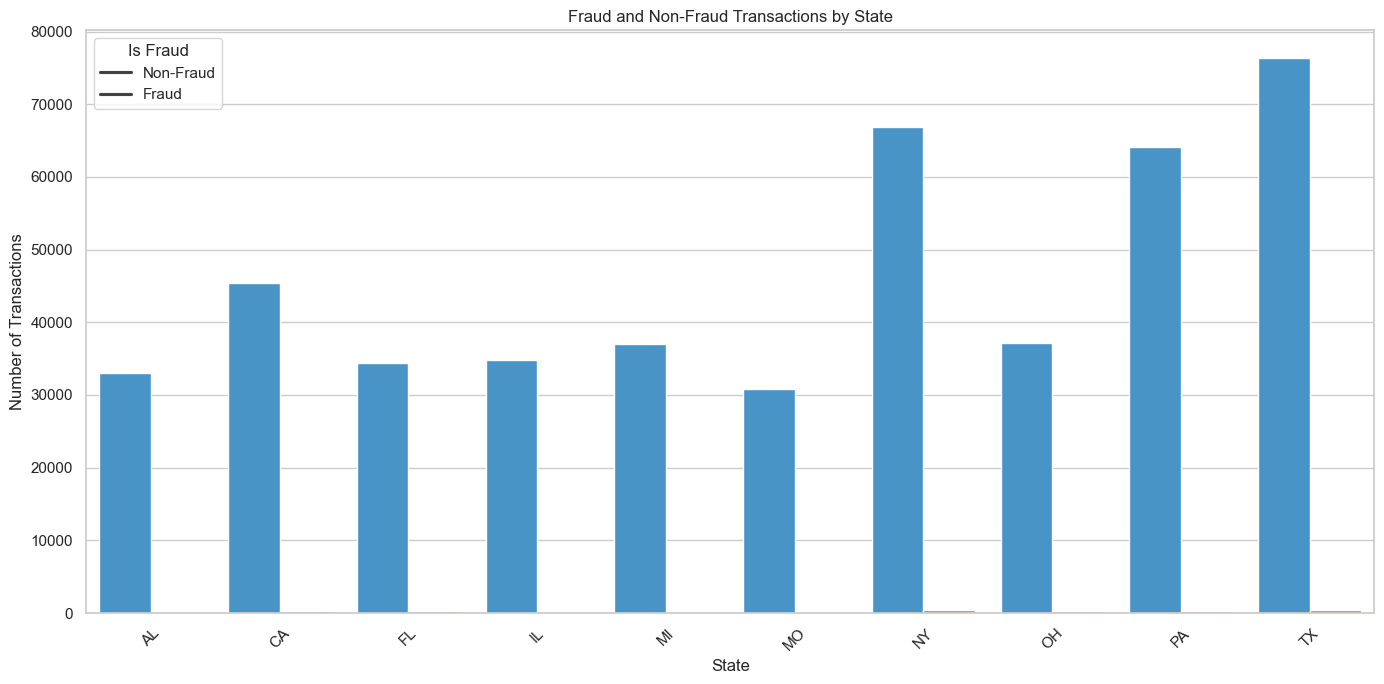

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Define the number of top cities to display
top_n = 10

# Top cities by total transactions
top_cities = df['city'].value_counts().nlargest(top_n).index
city_fraud = df[df['city'].isin(top_cities)].groupby(['city', 'is_fraud']).size().reset_index(name='count')

# Create plot for cities
plt.figure(figsize=(14, 7))
sns.barplot(data=city_fraud, x='city', y='count', hue='is_fraud', palette={0: non_fraud_color, 1: fraud_color})
plt.title('Fraud and Non-Fraud Transactions by City')
plt.xlabel('City')
plt.ylabel('Number of Transactions')
plt.legend(title='Is Fraud', labels=['Non-Fraud', 'Fraud'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top states by total transactions
top_states = df['state'].value_counts().nlargest(top_n).index
state_fraud = df[df['state'].isin(top_states)].groupby(['state', 'is_fraud']).size().reset_index(name='count')

# Create plot for states
plt.figure(figsize=(14, 7))
sns.barplot(data=state_fraud, x='state', y='count', hue='is_fraud', palette={0: non_fraud_color, 1: fraud_color})
plt.title('Fraud and Non-Fraud Transactions by State')
plt.xlabel('State')
plt.ylabel('Number of Transactions')
plt.legend(title='Is Fraud', labels=['Non-Fraud', 'Fraud'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

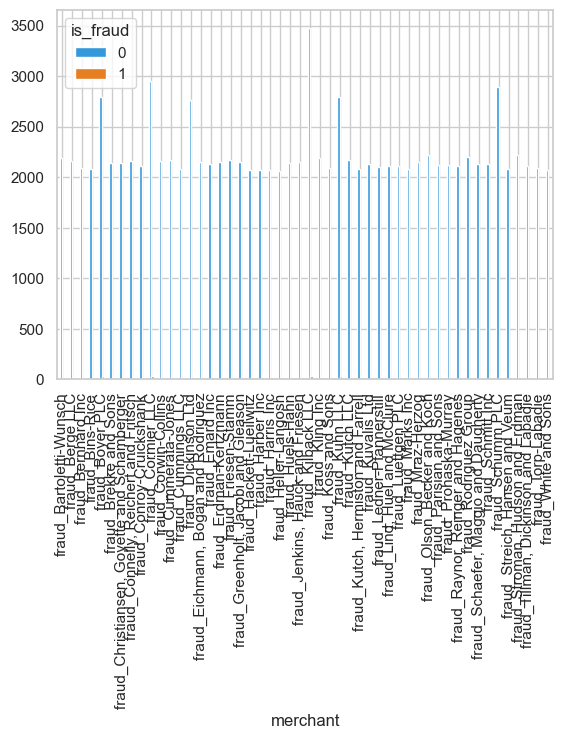

<Figure size 1200x800 with 0 Axes>

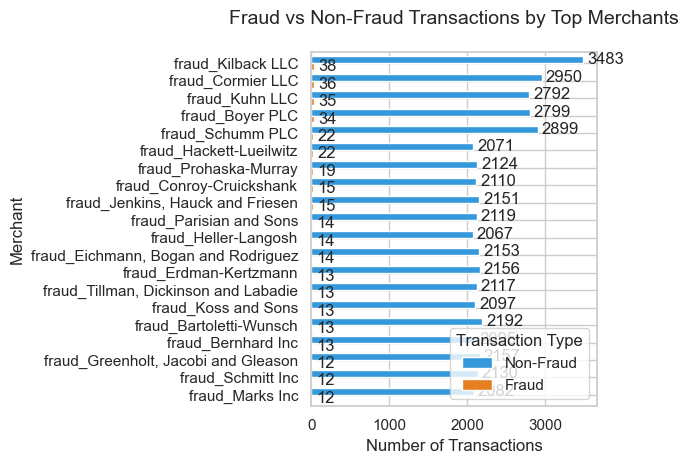

In [30]:
# Get top 10 merchants by total transaction count
top_merchants = df['merchant'].value_counts().nlargest(50).index

# Create figure
plt.figure(figsize=(15, 8))

# Create grouped bar plot
merchant_fraud = df[df['merchant'].isin(top_merchants)].groupby(['merchant', 'is_fraud']).size().unstack()
merchant_fraud.plot(kind='bar', color=[non_fraud_color, fraud_color])

# Select top 20 merchants based on fraud transactions
top_merchants = merchant_fraud.sort_values(by=1, ascending=False).head(20)

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))  # Increase figure size
top_merchants.plot(kind='barh', color=[non_fraud_color, fraud_color], width=0.8)

# Customize plot
plt.title('Fraud vs Non-Fraud Transactions by Top Merchants', fontsize=14, pad=20)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Merchant', fontsize=12)
plt.legend(title='Transaction Type', labels=['Non-Fraud', 'Fraud'], loc='lower right')
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Add value labels to bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', padding=3)

plt.tight_layout()
plt.show()


In [31]:
df.head()

cc_num                            merchant       category  \
0 2703190000000000.00000          fraud_Rippin, Kub and Mann       misc_net   
1     630423000000.00000     fraud_Heller, Gutmann and Zieme    grocery_pos   
2   38859500000000.00000                fraud_Lind-Buckridge  entertainment   
3 3534090000000000.00000  fraud_Kutch, Hermiston and Farrell  gas_transport   
4  375534000000000.00000                 fraud_Keeling-Crist       misc_pos   

        amt gender                        street            city state    zip  \
0   4.97000      F                561 Perry Cove  Moravian Falls    NC  28654   
1 107.23000      F  43039 Riley Greens Suite 393          Orient    WA  99160   
2 220.11000      M      594 White Dale Suite 530      Malad City    ID  83252   
3  45.00000      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632   
4  41.96000      M              408 Bradley Rest        Doe Hill    VA  24433   

       lat       long  city_pop                                job  \
0 36.07880  -81.17810      3495          Psychologist, counselling   
1 48.88780 -118.21050       149  Special educational needs teacher   
2 42.18080 -112.26200      4154        Nature conservation officer   
3 46.23060 -112.11380      1939                    Patent attorney   
4 38.42070  -79.46290        99     Dance movement psychotherapist   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018   36.01129   -82.04832   
1  1f76529f8574734946361c461b024d99  1325376044   49.15905  -118.18646   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051   43.15070  -112.15448   
3  6b849c168bdad6f867558c3793159a81  1325376076   47.03433  -112.56107   
4  a41d7549acf90789359a9aa5346dcb46  1325376186   38.67500   -78.63246   

   is_fraud  age  year  month  hour  day_of_week age_group  
0         0   30  2019      1     0            1     25-34  
1         0   40  2019      1     0            1     35-44  
2         0   56  2019      1     0            1     55-64  
3         0   51  2019      1     0            1     45-54  
4         0   32  2019      1     0            1     25-34

Number of unique values per column:


cc_num             943
merchant           693
category            14
amt              48602
gender               2
street             965
city               879
state               51
zip                952
lat                950
long               951
city_pop           865
job                493
trans_num      1048575
unix_time      1030650
merch_lat      1016437
merch_long     1034825
is_fraud             2
age                 83
year                 2
month               12
hour                24
day_of_week          7
age_group            7
dtype: int64


Descriptive statistics for numeric columns:


cc_num           amt           zip           lat  \
count             1048575.00000 1048575.00000 1048575.00000 1048575.00000   
mean   417156502027958336.00000      70.27910   48801.59060      38.53336   
std   1308811172818592768.00000     159.95184   26898.04035       5.07685   
min           60416207185.00000       1.00000    1257.00000      20.02710   
25%       180040000000000.00000       9.64000   26237.00000      34.62050   
50%      3520550000000000.00000      47.45000   48174.00000      39.35430   
75%      4642260000000000.00000      83.05000   72042.00000      41.94040   
max   4992350000000000000.00000   28948.90000   99783.00000      66.69330   

               long      city_pop        unix_time     merch_lat  \
count 1048575.00000 1048575.00000    1048575.00000 1048575.00000   
mean      -90.22626   89057.75906 1344905832.77866      38.53346   
std        13.75858  302435.05762   10196997.48378       5.11123   
min      -165.67230      23.00000 1325376018.00000      19.02779   
25%       -96.79800     743.00000 1336682353.00000      34.72954   
50%       -87.47690    2456.00000 1344901521.00000      39.36295   
75%       -80.15800   20328.00000 1354366012.00000      41.95602   
max       -67.95030 2906700.00000 1362931730.00000      67.51027   

         merch_long      is_fraud           age          year         month  \
count 1048575.00000 1048575.00000 1048575.00000 1048575.00000 1048575.00000   
mean      -90.22648       0.00573      45.38840    2019.11799       6.51480   
std        13.77093       0.07547      17.38094       0.32260       3.66834   
min      -166.67124       0.00000      13.00000    2019.00000       1.00000   
25%       -96.89864       0.00000      32.00000    2019.00000       3.00000   
50%       -87.43923       0.00000      43.00000    2019.00000       7.00000   
75%       -80.23228       0.00000      56.00000    2019.00000      10.00000   
max       -66.95090       1.00000      95.00000    2020.00000      12.00000   

               hour   day_of_week  
count 1048575.00000 1048575.00000  
mean       12.80077       3.13559  
std         6.81686       2.20050  
min         0.00000       0.00000  
25%         7.00000       1.00000  
50%        14.00000       3.00000  
75%        19.00000       5.00000  
max        23.00000       6.00000

/var/folders/z9/cvzm0bkn2gv0qywmh29rgvrr0000gn/T/ipykernel_57294/1654768967.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='category', order=category_order,


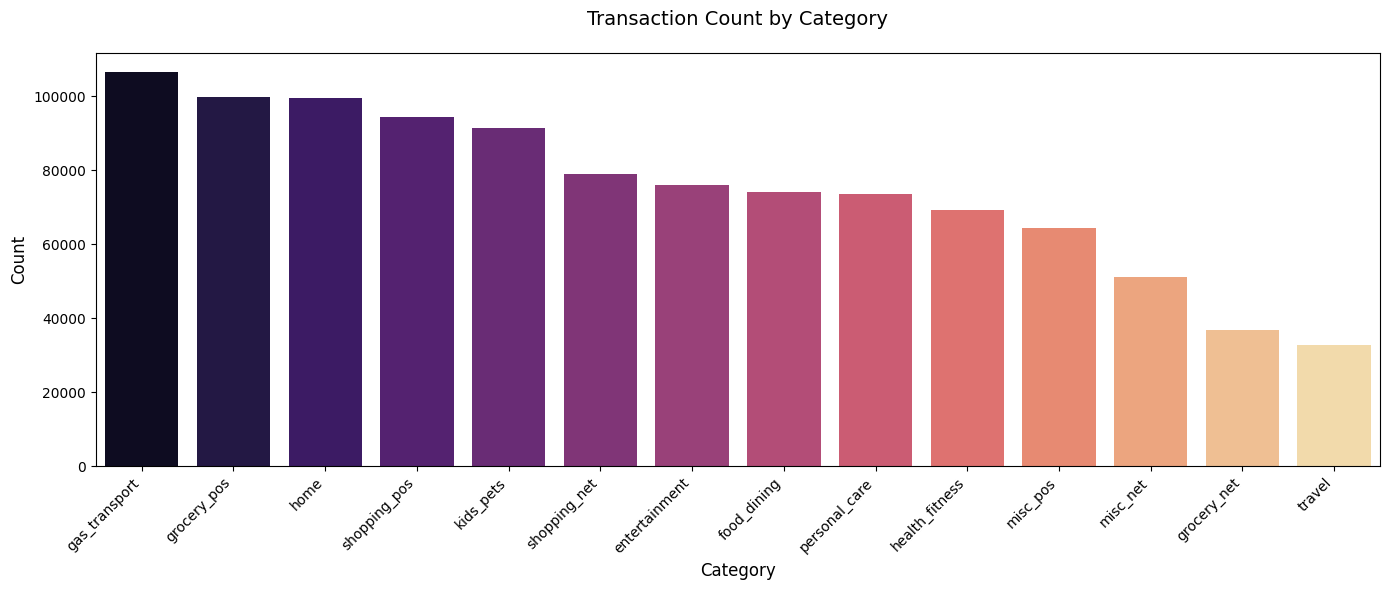

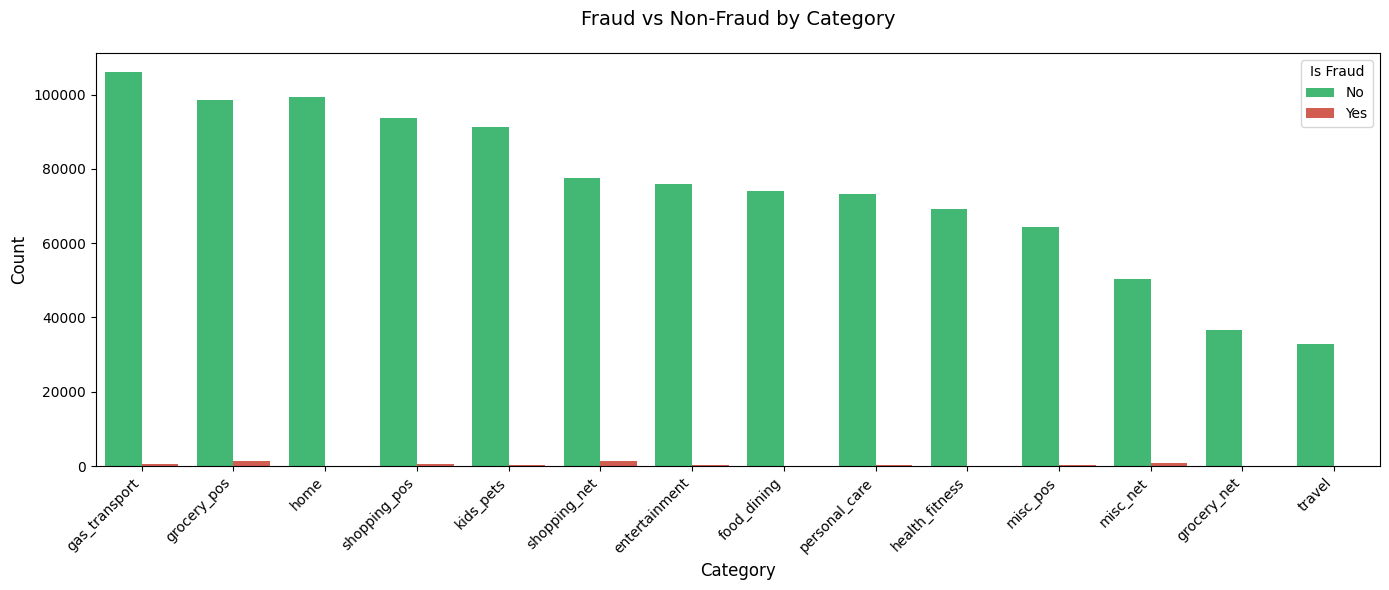

/var/folders/z9/cvzm0bkn2gv0qywmh29rgvrr0000gn/T/ipykernel_57294/1654768967.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_fraud_ratio, x='category', y='is_fraud',


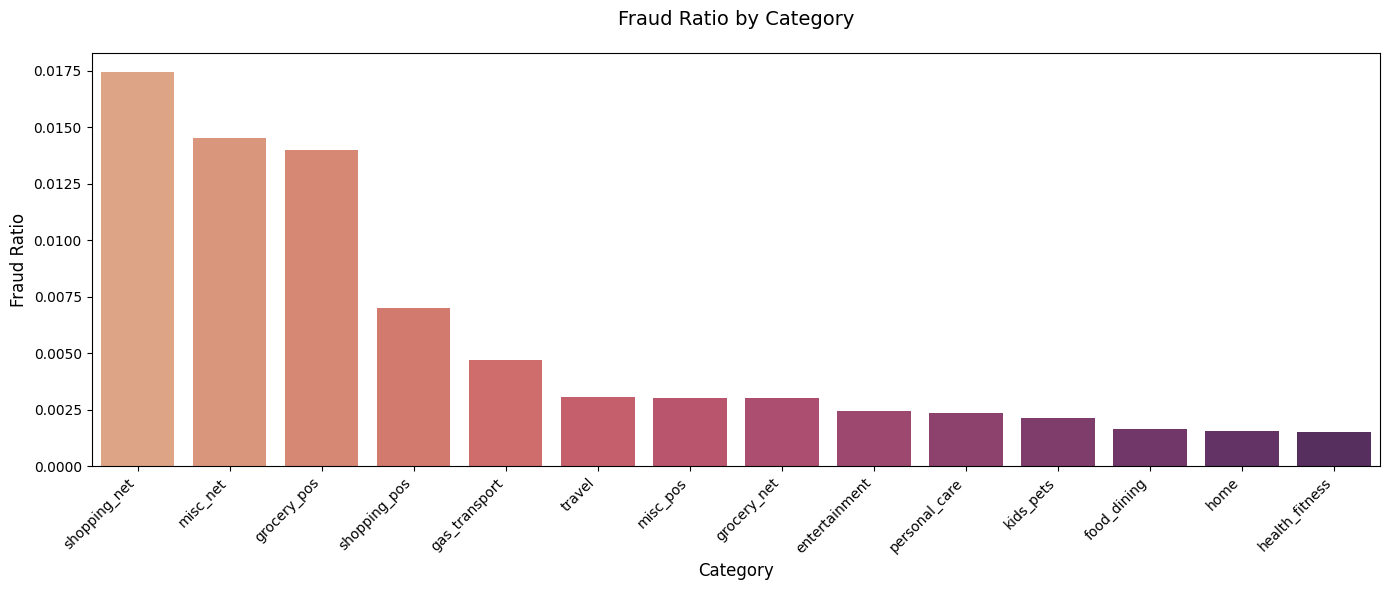

/var/folders/z9/cvzm0bkn2gv0qywmh29rgvrr0000gn/T/ipykernel_57294/1654768967.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['job'].isin(top_jobs)],


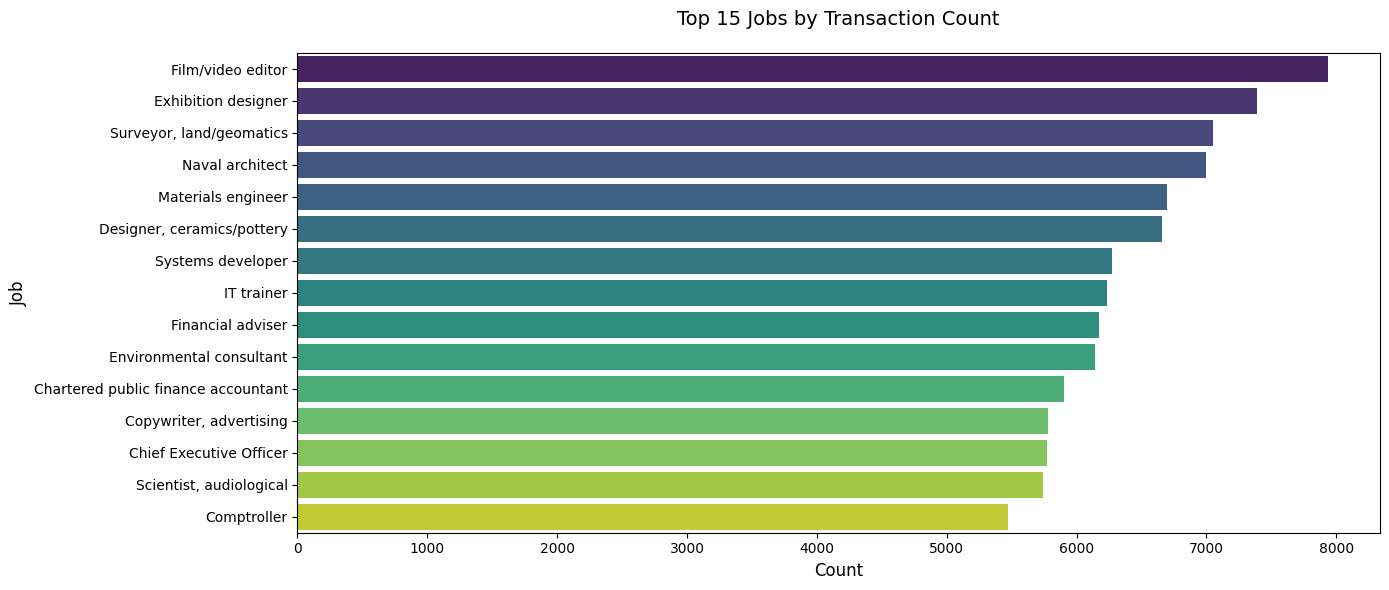

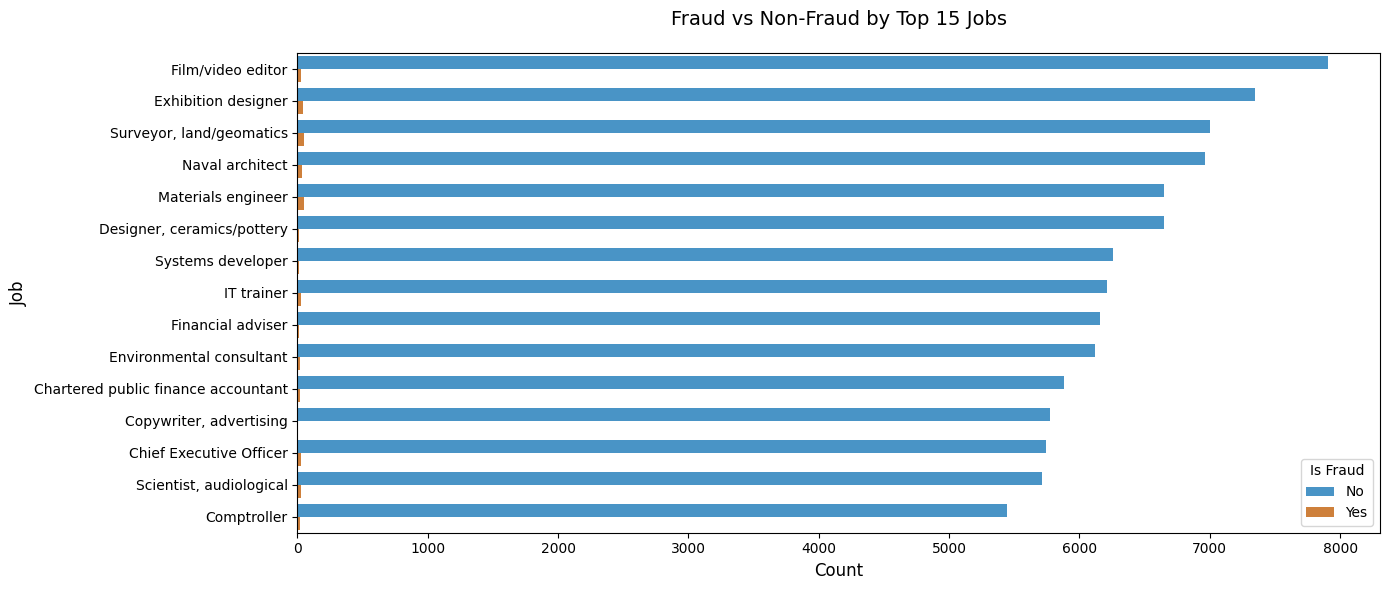

/var/folders/z9/cvzm0bkn2gv0qywmh29rgvrr0000gn/T/ipykernel_57294/1654768967.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=job_fraud_ratio, x='is_fraud', y='job',


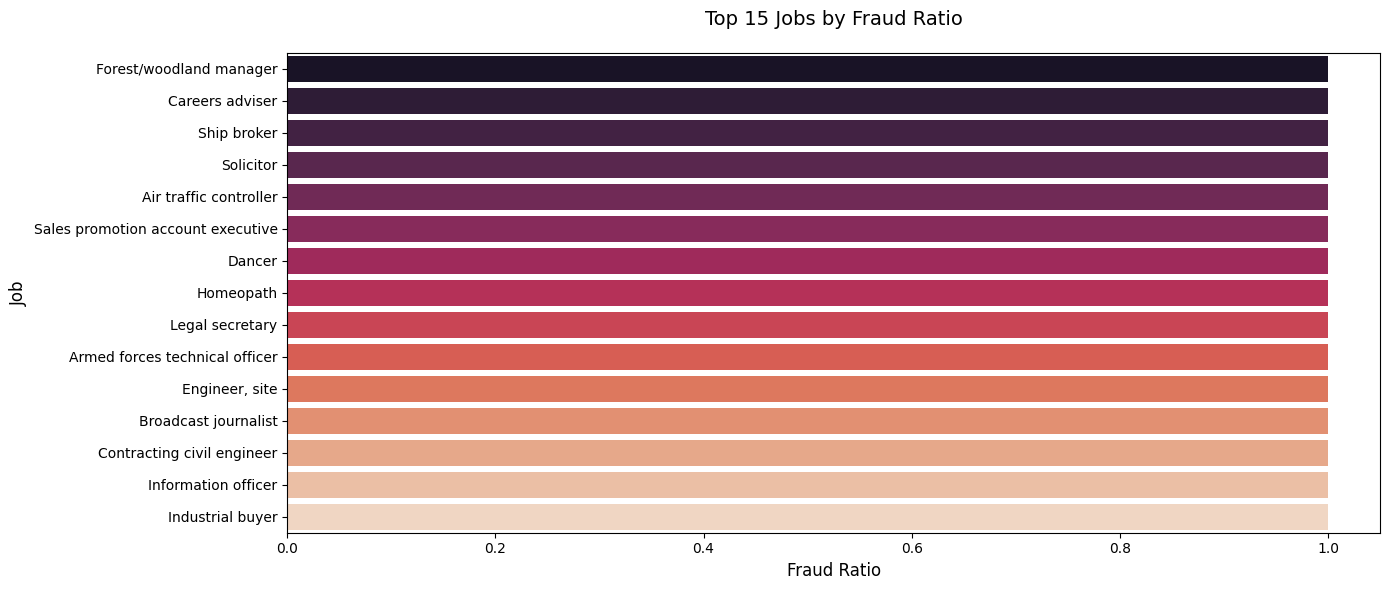

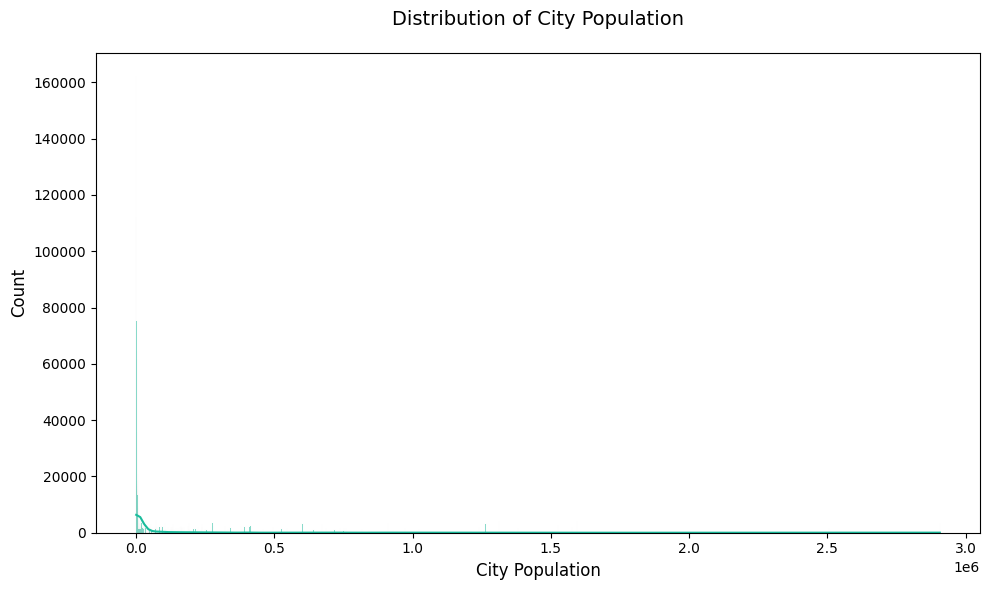

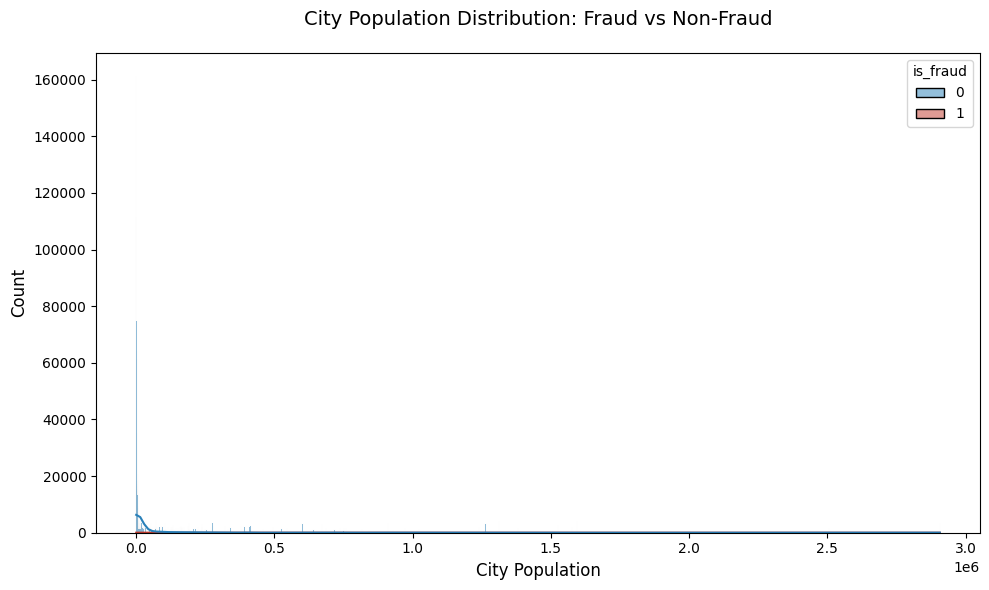


Distance feature created. First 5 rows:


lat       long  merch_lat  merch_long  distance_km
0 36.07880  -81.17810   36.01129   -82.04832     78.59757
1 48.88780 -118.21050   49.15905  -118.18646     30.21218
2 42.18080 -112.26200   43.15070  -112.15448    108.20608
3 46.23060 -112.11380   47.03433  -112.56107     95.67323
4 38.42070  -79.46290   38.67500   -78.63246     77.55674

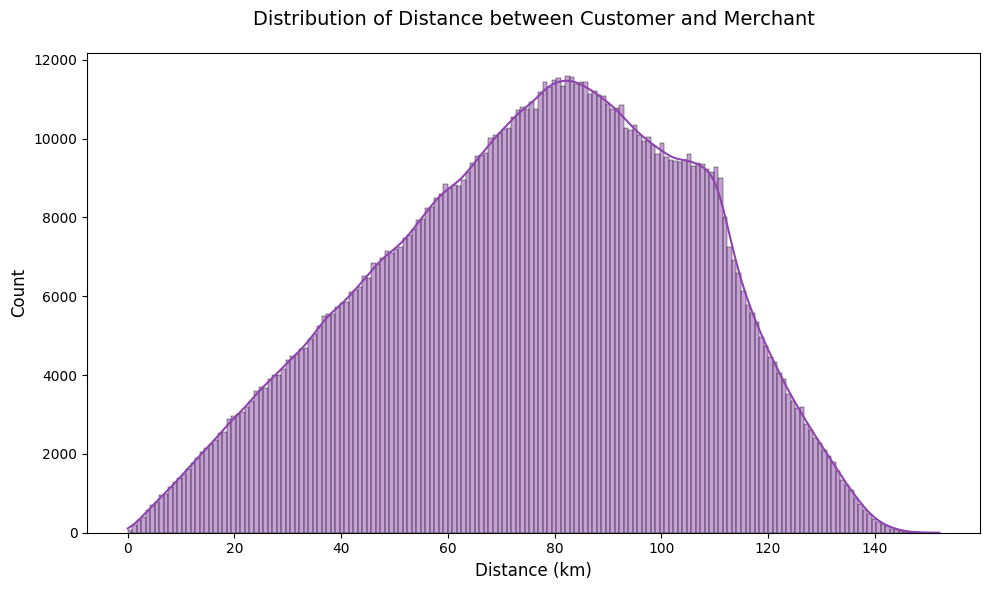

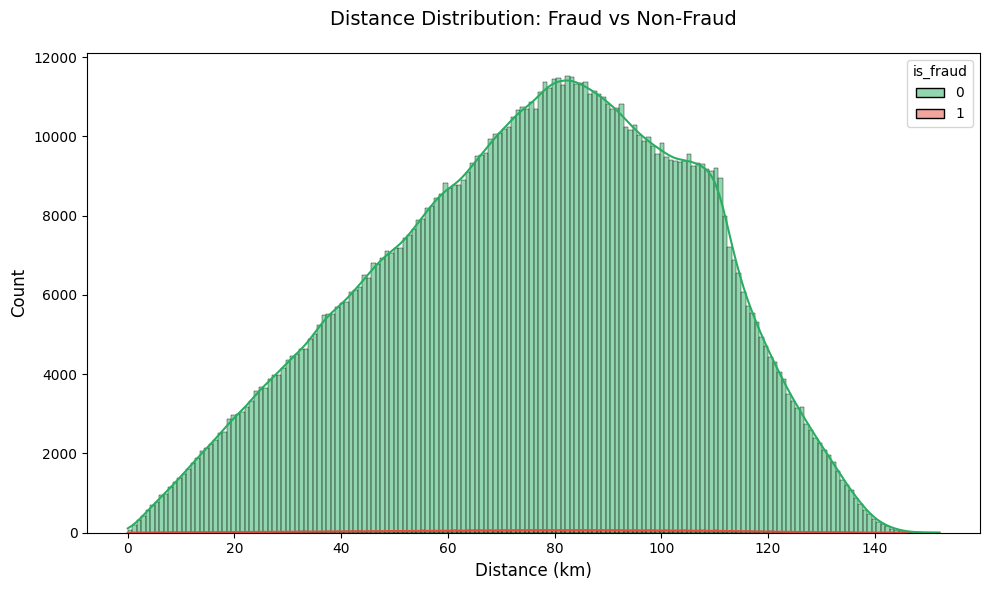

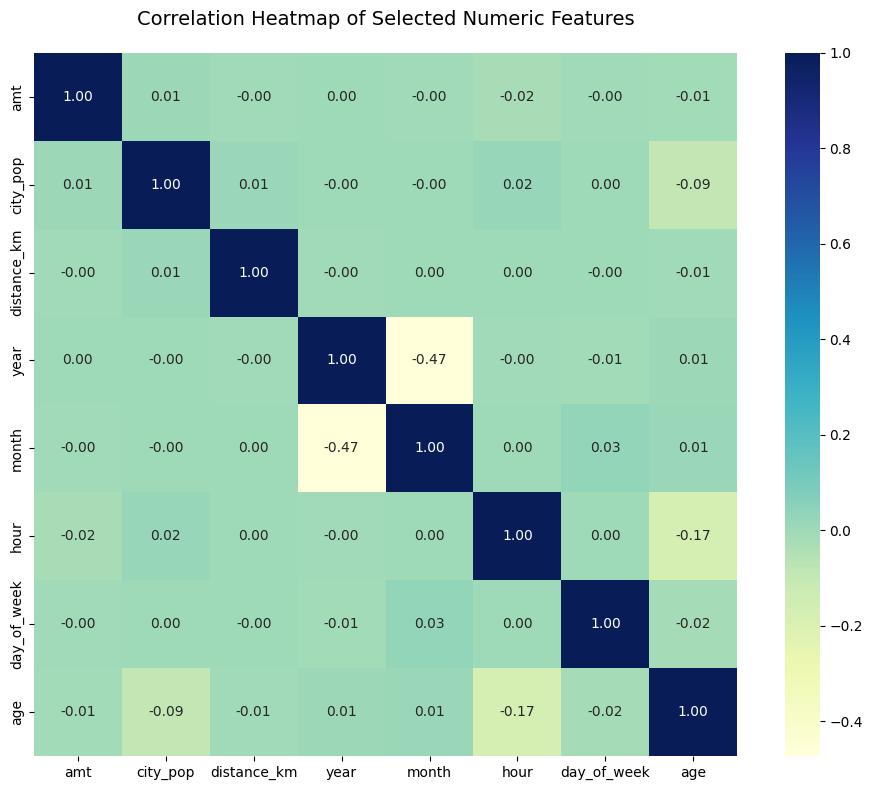

"\nEXPLANATION:\n\n1. Category Analysis:\n   - Shows which categories dominate transactions.\n   - Identifies where fraud is more likely (Fraud Ratio by Category).\n\n2. Job Analysis:\n   - Highlights top professions with the highest transaction count.\n   - Explores which jobs have a higher fraud rate.\n\n3. City Population:\n   - Examines the population distribution of the cities where transactions occur.\n   - Checks if there's a noticeable difference in city population for fraud vs non-fraud.\n\n4. Distance Calculation:\n   - Uses Haversine formula to measure the geographic distance between the transaction location (lat, long) and the merchant location (merch_lat, merch_long).\n   - Potentially, larger distances might be correlated with higher fraud activity (or vice versa).\n\n5. Correlation Heatmap:\n   - Displays how numeric features correlate with each other.\n   - If 'amt' or 'distance_km' has a notable correlation with other variables, it might be predictive of fraud.\n\n6. P

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, sin, cos, atan2, sqrt

# ------------------------------------------------------------------
# 1. Quick Exploration
# ------------------------------------------------------------------
print("Number of unique values per column:")
display(df.nunique())

print("\nDescriptive statistics for numeric columns:")
display(df.describe())

# ------------------------------------------------------------------
# 2. Analyze 'category'
# ------------------------------------------------------------------
plt.figure(figsize=(14, 6))
category_order = df['category'].value_counts().index
sns.countplot(data=df, x='category', order=category_order, 
              palette='magma')
plt.title('Transaction Count by Category', fontsize=14, pad=20)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Fraud vs Non-Fraud by Category
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='category', hue='is_fraud', 
              order=category_order, 
              palette={0: '#2ecc71', 1: '#e74c3c'})
plt.title('Fraud vs Non-Fraud by Category', fontsize=14, pad=20)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Is Fraud', labels=['No', 'Yes'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate fraud ratio by category
category_fraud_ratio = (df.groupby('category')['is_fraud']
                        .mean()
                        .sort_values(ascending=False)
                        .reset_index())
plt.figure(figsize=(14, 6))
sns.barplot(data=category_fraud_ratio, x='category', y='is_fraud', 
            order=category_fraud_ratio['category'], 
            palette='flare')
plt.title('Fraud Ratio by Category', fontsize=14, pad=20)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Fraud Ratio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# 3. Analyze 'job'
# ------------------------------------------------------------------
top_n = 15  # Feel free to adjust the number of jobs displayed
top_jobs = df['job'].value_counts().nlargest(top_n).index

plt.figure(figsize=(14, 6))
sns.countplot(data=df[df['job'].isin(top_jobs)], 
              y='job', 
              order=top_jobs, 
              palette='viridis')
plt.title(f'Top {top_n} Jobs by Transaction Count', fontsize=14, pad=20)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Job', fontsize=12)
plt.tight_layout()
plt.show()

# Fraud vs Non-Fraud by Top Jobs
plt.figure(figsize=(14, 6))
sns.countplot(data=df[df['job'].isin(top_jobs)], 
              y='job', hue='is_fraud', 
              order=top_jobs,
              palette={0: '#3498db', 1: '#e67e22'})
plt.title(f'Fraud vs Non-Fraud by Top {top_n} Jobs', fontsize=14, pad=20)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Job', fontsize=12)
plt.legend(title='Is Fraud', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# Fraud ratio by job
job_fraud_ratio = (df.groupby('job')['is_fraud'].mean()
                   .sort_values(ascending=False)
                   .head(top_n)
                   .reset_index())

plt.figure(figsize=(14, 6))
sns.barplot(data=job_fraud_ratio, x='is_fraud', y='job',
            palette='rocket')
plt.title(f'Top {top_n} Jobs by Fraud Ratio', fontsize=14, pad=20)
plt.xlabel('Fraud Ratio', fontsize=12)
plt.ylabel('Job', fontsize=12)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# 4. Analyze 'city_pop'
# ------------------------------------------------------------------
# Distribution of city populations
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='city_pop', kde=True, color='#1abc9c')
plt.title('Distribution of City Population', fontsize=14, pad=20)
plt.xlabel('City Population', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

# Relationship between city_pop and fraud
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='city_pop', kde=True, hue='is_fraud', 
             palette={0: '#2980b9', 1: '#c0392b'}, 
             alpha=0.5)
plt.title('City Population Distribution: Fraud vs Non-Fraud', fontsize=14, pad=20)
plt.xlabel('City Population', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# 5. Geographic Distance Feature
# ------------------------------------------------------------------
# Calculate the distance between transaction location and merchant location
# Using Haversine formula
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    # Radius of Earth in kilometers (use 3958.8 for miles)
    r = 6371
    return r * c

# Create a new column 'distance_km'
df['distance_km'] = df.apply(
    lambda x: haversine_distance(x['lat'], x['long'], x['merch_lat'], x['merch_long']), 
    axis=1
)

print("\nDistance feature created. First 5 rows:")
display(df[['lat','long','merch_lat','merch_long','distance_km']].head())

# Distribution of distance for all transactions
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='distance_km', kde=True, color='#8e44ad')
plt.title('Distribution of Distance between Customer and Merchant', fontsize=14, pad=20)
plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

# Distribution of distance for fraud vs non-fraud
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='distance_km', kde=True, hue='is_fraud',
             palette={0: '#27ae60', 1: '#e74c3c'}, alpha=0.5)
plt.title('Distance Distribution: Fraud vs Non-Fraud', fontsize=14, pad=20)
plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# 6. Correlation Heatmap (Selected Numeric Columns)
# ------------------------------------------------------------------
# You can pick whichever numeric columns make sense in your scenario
numeric_cols = ['amt', 'city_pop', 'distance_km', 
                'year', 'month', 'hour', 'day_of_week', 'age']

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Selected Numeric Features', fontsize=14, pad=20)
plt.tight_layout()
plt.show()



# ------------------------------------------------------------------
# 8. Explanation of Additional Insights
# ------------------------------------------------------------------
"""
EXPLANATION:

1. Category Analysis:
   - Shows which categories dominate transactions.
   - Identifies where fraud is more likely (Fraud Ratio by Category).

2. Job Analysis:
   - Highlights top professions with the highest transaction count.
   - Explores which jobs have a higher fraud rate.

3. City Population:
   - Examines the population distribution of the cities where transactions occur.
   - Checks if there's a noticeable difference in city population for fraud vs non-fraud.

4. Distance Calculation:
   - Uses Haversine formula to measure the geographic distance between the transaction location (lat, long) and the merchant location (merch_lat, merch_long).
   - Potentially, larger distances might be correlated with higher fraud activity (or vice versa).

5. Correlation Heatmap:
   - Displays how numeric features correlate with each other.
   - If 'amt' or 'distance_km' has a notable correlation with other variables, it might be predictive of fraud.

6. Pairplot:
   - Provides a quick overview of pairwise relationships among selected numeric variables and how they differ for fraud vs non-fraud.

By adding these visualizations and features (especially the distance feature and the category/job breakdown), you get a more holistic view of the dataset and potential fraud patterns.
"""


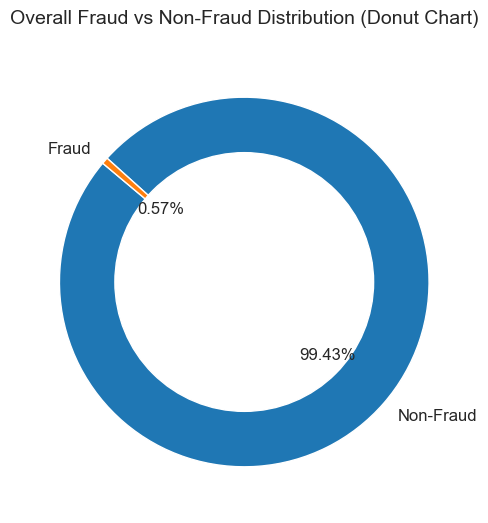

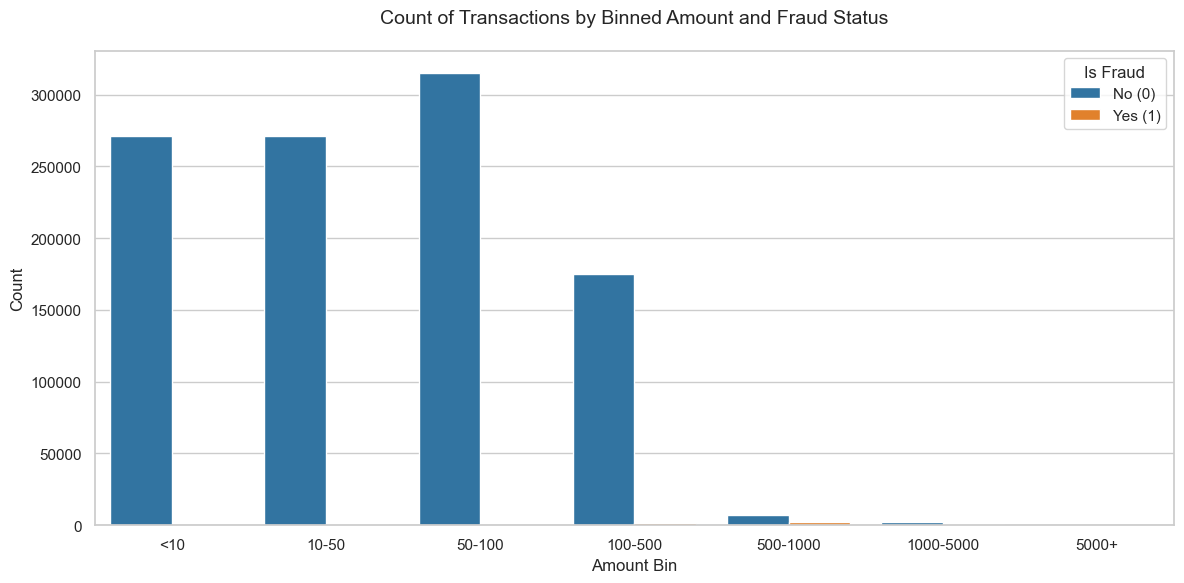

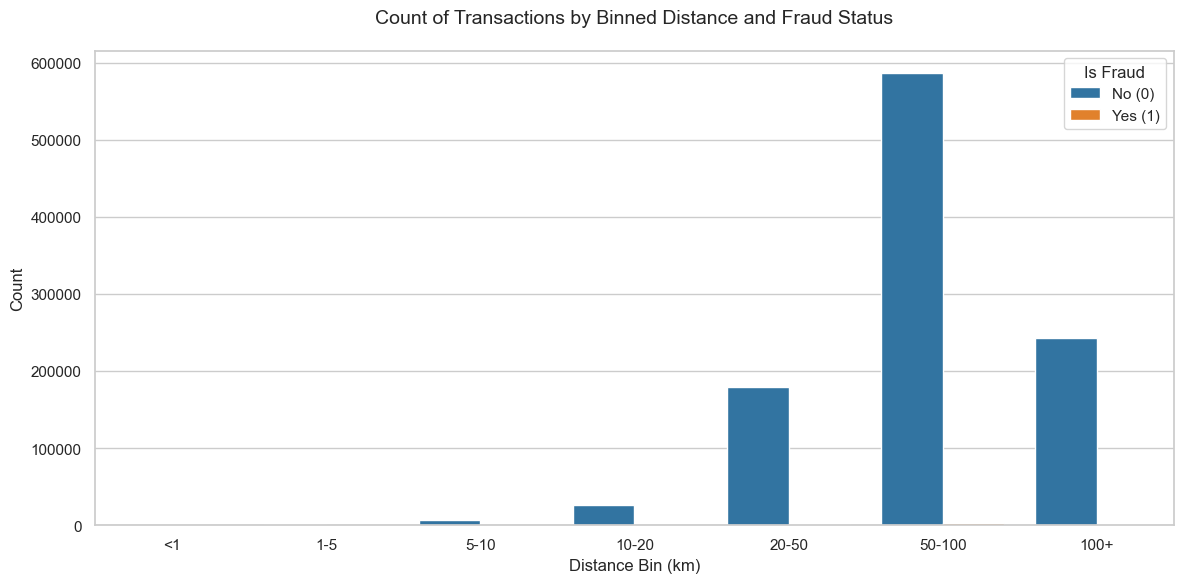

Pivot Table: Transaction Count by Category & Gender


gender              F      M
category                    
entertainment   38779  37202
food_dining     39208  34833
gas_transport   58696  47734
grocery_net     20471  16248
grocery_pos     52824  47082
health_fitness  36543  32819
home            52828  46750
kids_pets       50865  40539
misc_net        28788  22294
misc_pos        34367  30125
personal_care   44772  28726
shopping_net    44755  34144
shopping_pos    54774  39579
travel          16298  16532


Pivot Table: Fraud Ratio by Category & Gender


gender               F       M
category                      
entertainment  0.00294 0.00191
food_dining    0.00237 0.00080
gas_transport  0.00348 0.00616
grocery_net    0.00205 0.00419
grocery_pos    0.01134 0.01693
health_fitness 0.00235 0.00055
home           0.00261 0.00032
kids_pets      0.00297 0.00106
misc_net       0.01129 0.01870
misc_pos       0.00367 0.00226
personal_care  0.00288 0.00150
shopping_net   0.01227 0.02419
shopping_pos   0.00661 0.00758
travel         0.00350 0.00260

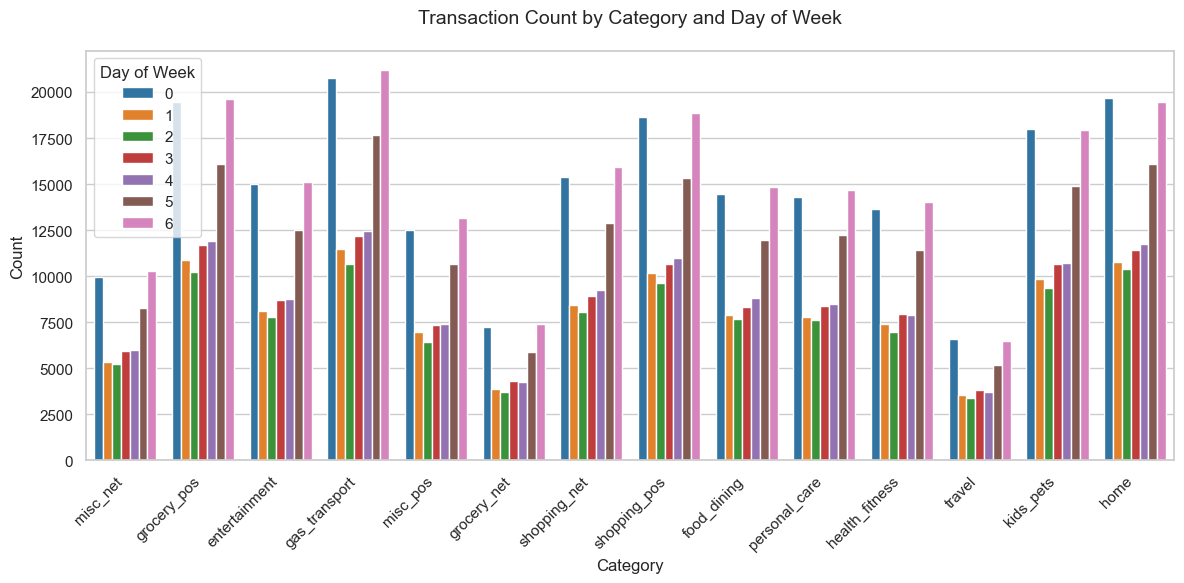

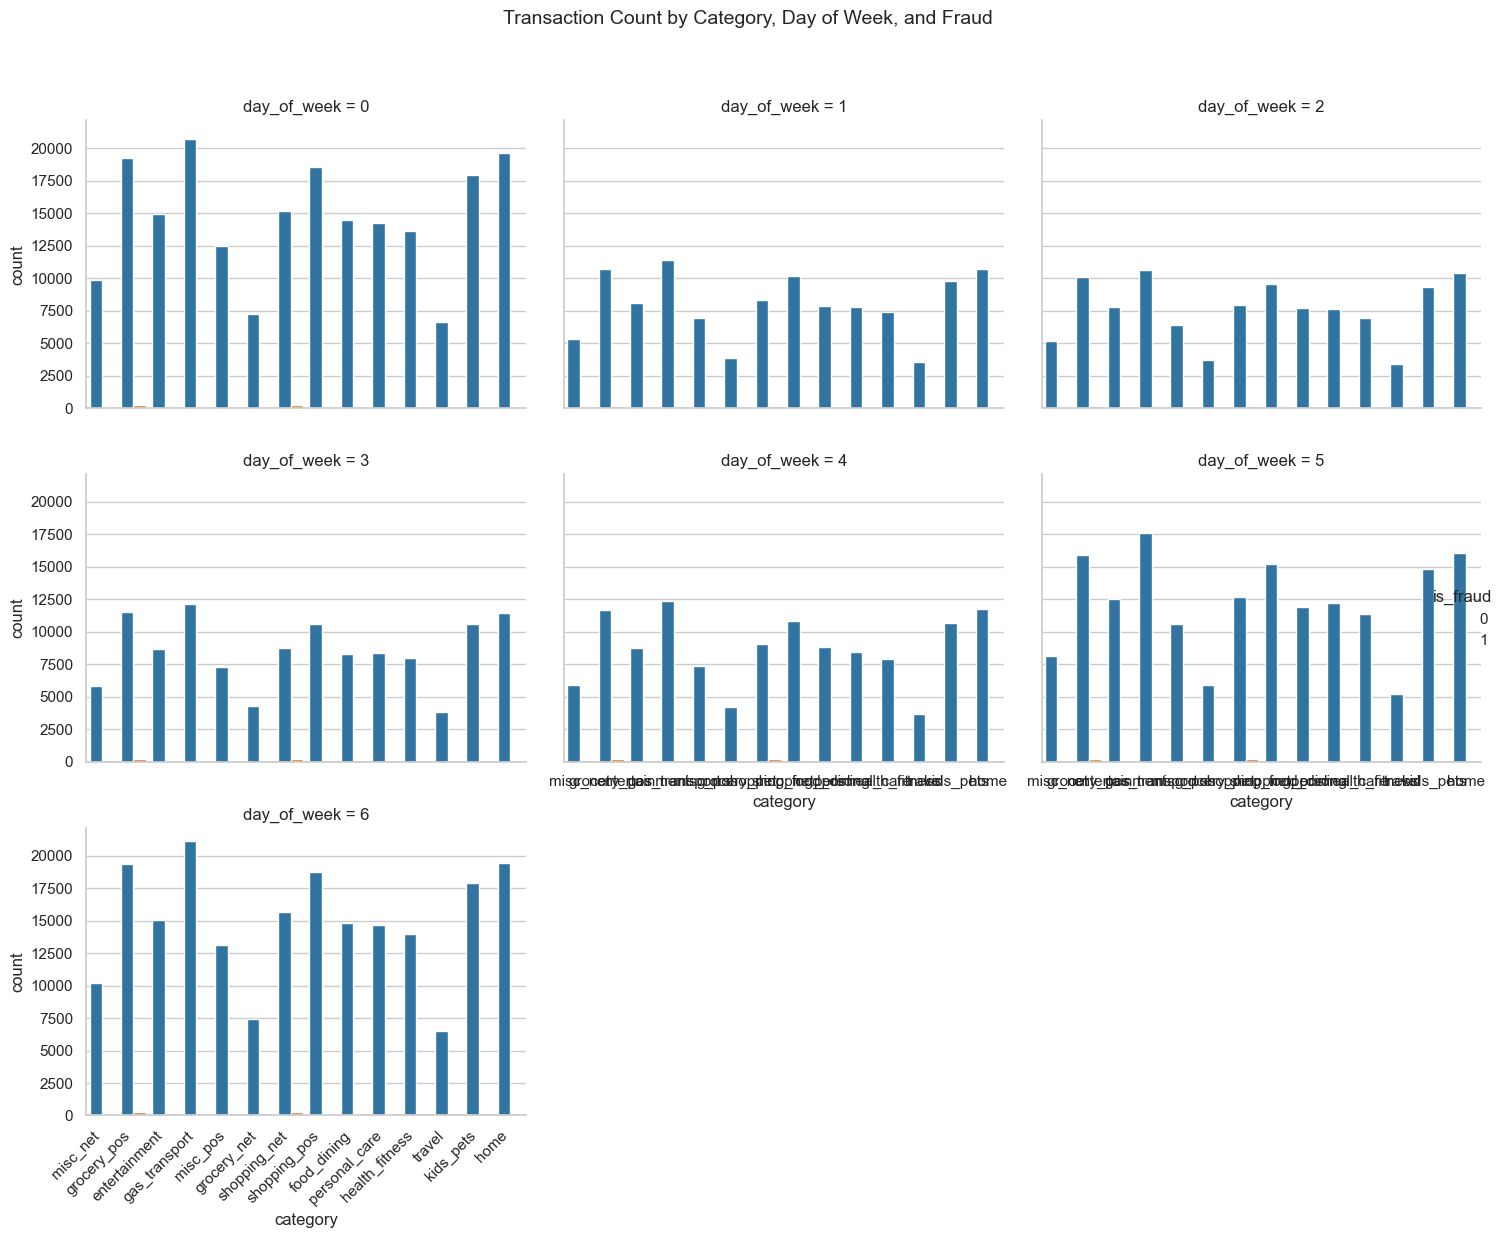

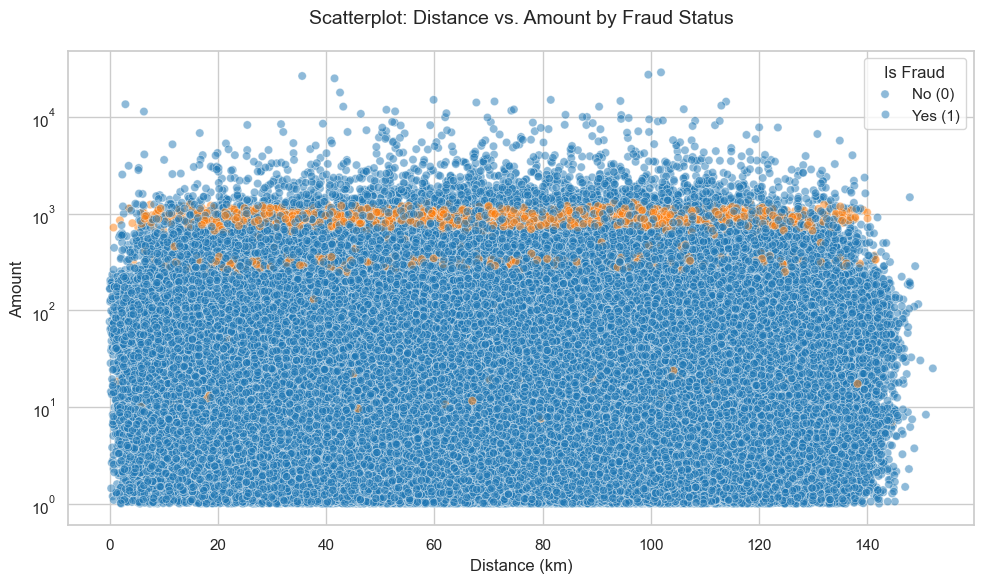

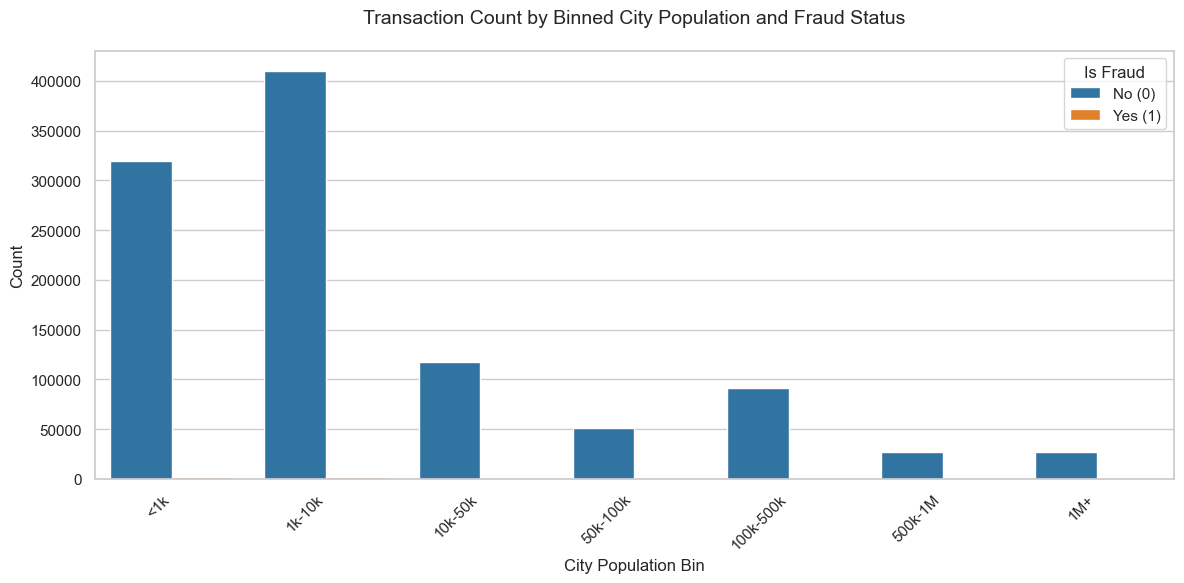

/var/folders/z9/cvzm0bkn2gv0qywmh29rgvrr0000gn/T/ipykernel_28002/423109890.py:204: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


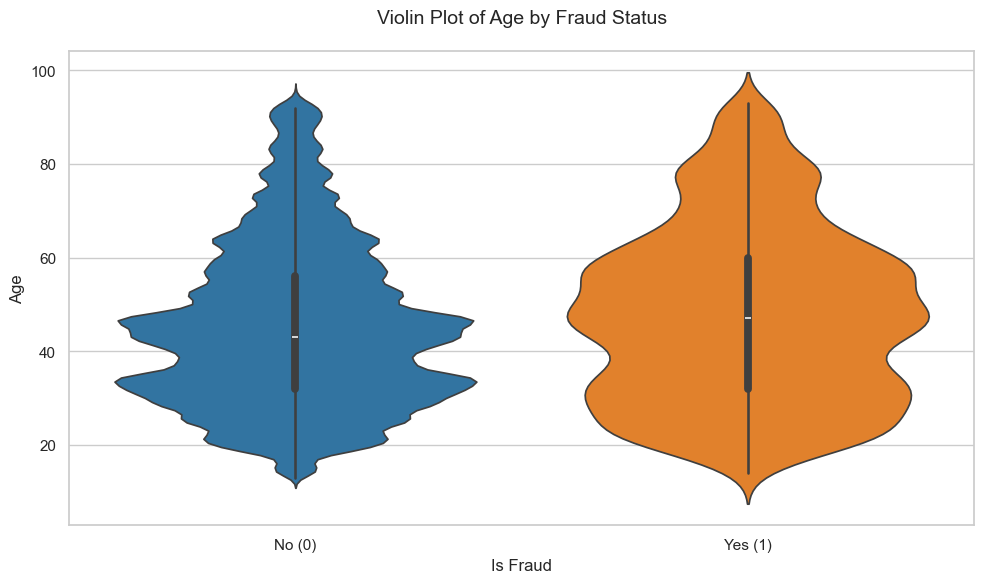

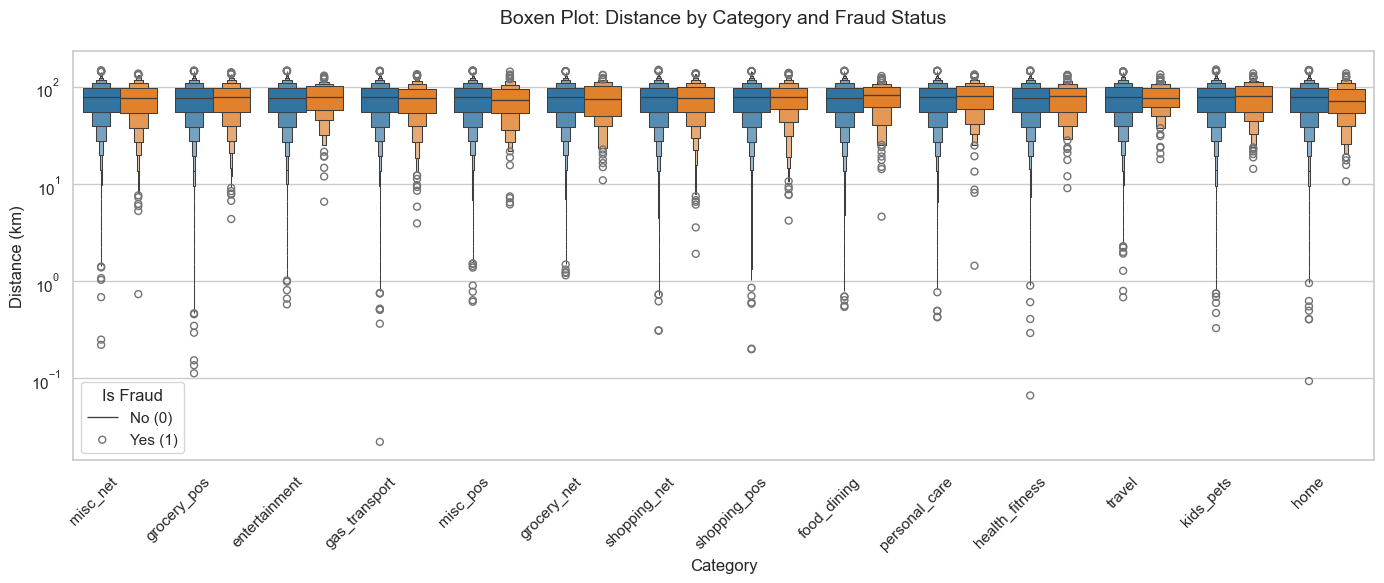

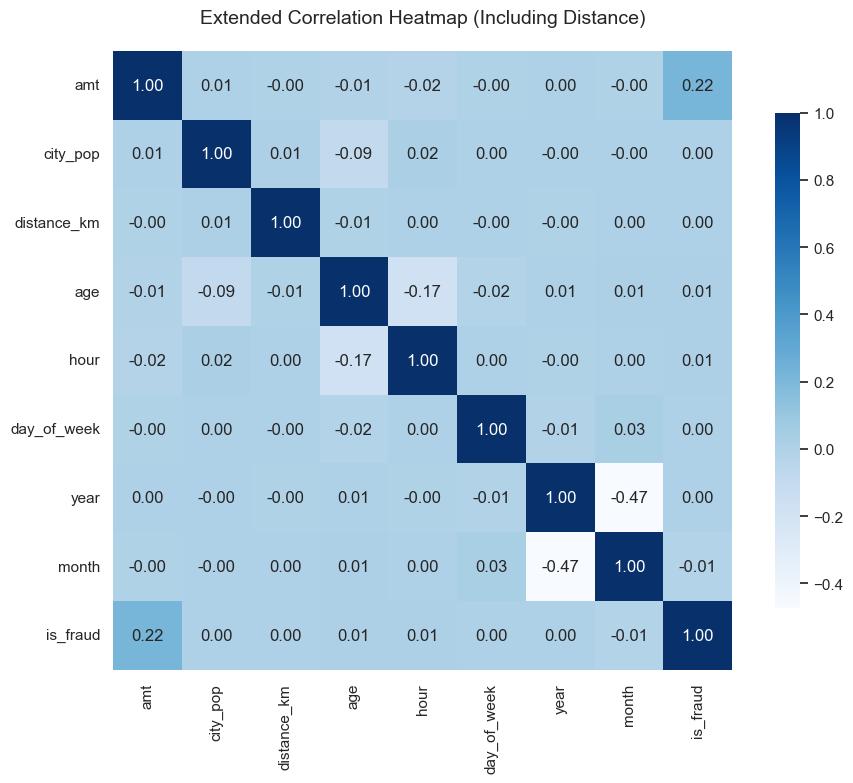

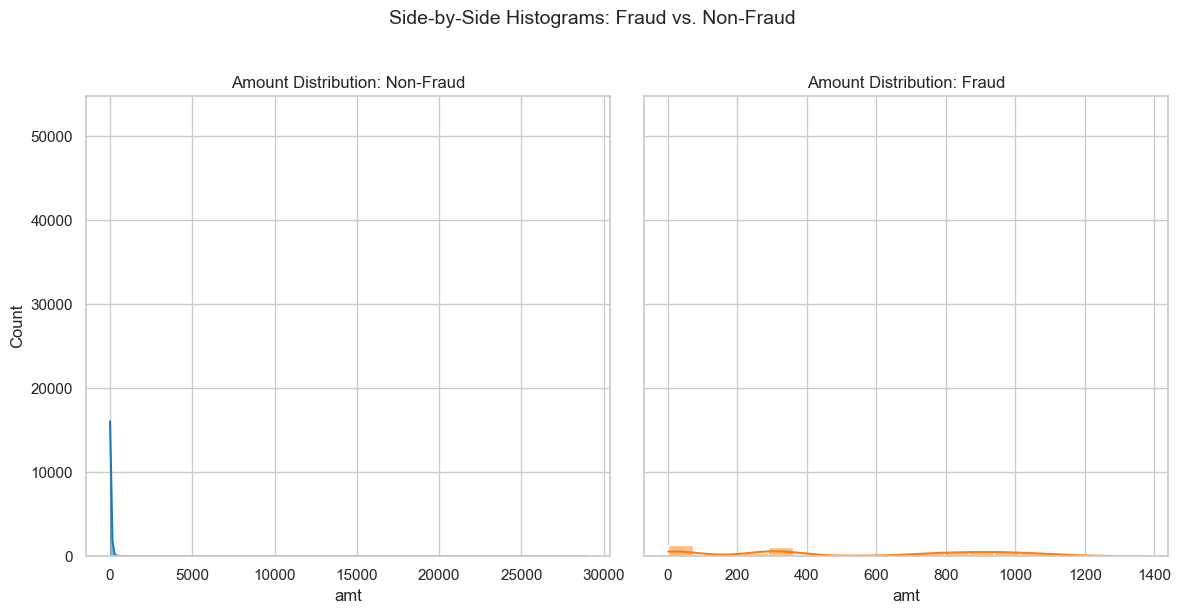

'\nCHANGELOG / IMPROVEMENTS:\n1. Avoided red-green color conflict; using Blue (#1F77B4) for Non-Fraud and Orange (#FF7F0E) for Fraud. \n2. Used a color list (palette=[...]) with hue_order=[0,1] to prevent Seaborn palette key errors.\n3. Added a Donut Chart for an immediate overview of the fraud ratio.\n4. Provided side-by-side distributions for FRAUD vs NON-FRAUD to highlight how amounts differ.\n5. Converted is_fraud to string (df[\'is_fraud_str\']) for certain plots (like violinplot) to ensure keys match.\n\nHOW TO USE:\n- Compare the shapes of distribution for Fraud vs. Non-Fraud in separate plots.\n- Use binned features (amt_bin, dist_bin, citypop_bin) to detect which ranges might be riskier.\n- Explore pivot tables for combined relationships (Category x Gender).\n- Check correlation with \'distance_km\' to see if geography helps identify fraud.\n\nThese insights will guide your Feature Engineering phase, e.g.:\n- Creating binary flags for "high distance" or "high amount".\n- Combi

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --------------------- SETUP ---------------------
# Let's ensure a consistent style.
sns.set_style("whitegrid")

# For color-blind friendliness, let's pick two distinct colors.
# - Non-Fraud: Blue (#1F77B4)
# - Fraud    : Orange (#FF7F0E)
color_non_fraud = "#1F77B4"
color_fraud = "#FF7F0E"
hue_colors = [color_non_fraud, color_fraud]

# If 'distance_km' doesn't exist yet, you can define it by the Haversine formula:
# (Comment out if you already have 'distance_km' in your df)
# from math import radians, sin, cos, atan2, sqrt
# def haversine_distance(lat1, lon1, lat2, lon2):
#     lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
#     dlon = lon2 - lon1
#     dlat = lat2 - lat1
#     a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
#     c = 2*atan2(sqrt(a), sqrt(1-a))
#     r = 6371  # Earth radius in km
#     return r * c
# df['distance_km'] = df.apply(lambda x: haversine_distance(x['lat'], x['long'], 
#                                                           x['merch_lat'], x['merch_long']), axis=1)

# Ensure is_fraud is numeric 0/1 (if it’s stored otherwise).
# df['is_fraud'] = df['is_fraud'].astype(int)

# --------------------- 1. FRAUD VS. NON-FRAUD DISTRIBUTION (DONUT CHART) ---------------------
fraud_counts = df['is_fraud'].value_counts(dropna=False)
labels = ['Non-Fraud', 'Fraud']
sizes = [fraud_counts[0], fraud_counts[1]]

fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    sizes, 
    labels=labels, 
    autopct='%.2f%%', 
    startangle=140, 
    colors=[color_non_fraud, color_fraud], 
    textprops={'fontsize': 12}
)
# Create a "donut" by drawing a circle at the center.
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Overall Fraud vs Non-Fraud Distribution (Donut Chart)', fontsize=14, pad=20)
plt.show()

# --------------------- 2. BINS FOR AMOUNT & DISTANCE ---------------------
# (a) Binning 'amt'
df['amt_bin'] = pd.cut(
    df['amt'], 
    bins=[0, 10, 50, 100, 500, 1000, 5000, float('inf')],
    labels=['<10', '10-50', '50-100', '100-500', '500-1000', '1000-5000', '5000+']
)

# (b) Binning 'distance_km'
distance_bins = [0, 1, 5, 10, 20, 50, 100, float('inf')]
distance_labels = ['<1','1-5','5-10','10-20','20-50','50-100','100+']
df['dist_bin'] = pd.cut(df['distance_km'], bins=distance_bins, labels=distance_labels)

# --------------------- 2.1 COUNT PLOT: Binned Amount ---------------------
plt.figure(figsize=(12,6))
sns.countplot(
    data=df, 
    x='amt_bin', 
    hue='is_fraud',
    palette=hue_colors,        # Use our custom color palette
    hue_order=[0, 1]
)
plt.title('Count of Transactions by Binned Amount and Fraud Status', fontsize=14, pad=20)
plt.xlabel('Amount Bin', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Is Fraud', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()

# --------------------- 2.2 COUNT PLOT: Binned Distance ---------------------
plt.figure(figsize=(12,6))
sns.countplot(
    data=df, 
    x='dist_bin', 
    hue='is_fraud',
    palette=hue_colors,
    hue_order=[0, 1]
)
plt.title('Count of Transactions by Binned Distance and Fraud Status', fontsize=14, pad=20)
plt.xlabel('Distance Bin (km)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Is Fraud', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()

# --------------------- 3. PIVOT TABLES (CATEGORY, GENDER) ---------------------
# 3.1 Transaction Counts
category_gender_pivot = pd.pivot_table(
    df, 
    values='trans_num',
    index='category',
    columns='gender',
    aggfunc='count',
    fill_value=0
)
print("Pivot Table: Transaction Count by Category & Gender")
display(category_gender_pivot)

# 3.2 Fraud Ratio
category_gender_fraud_ratio = pd.pivot_table(
    df, 
    values='is_fraud',
    index='category',
    columns='gender',
    aggfunc='mean',
    fill_value=0
)
print("\nPivot Table: Fraud Ratio by Category & Gender")
display(category_gender_fraud_ratio)

# --------------------- 4. MULTIVARIATE: CATEGORY vs. DAY_OF_WEEK & FRAUD ---------------------
plt.figure(figsize=(12,6))
sns.countplot(
    data=df, 
    x='category', 
    hue='day_of_week', 
    palette='tab10'
)
plt.title('Transaction Count by Category and Day of Week', fontsize=14, pad=20)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Day of Week')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Catplot splitted by day_of_week, color by is_fraud
sns.catplot(
    data=df, 
    x='category', 
    kind='count', 
    hue='is_fraud',
    col='day_of_week', 
    col_wrap=3, 
    palette=hue_colors,
    hue_order=[0, 1],
    height=4, 
    aspect=1.2
)
plt.subplots_adjust(top=0.85)
plt.suptitle('Transaction Count by Category, Day of Week, and Fraud', y=1.03, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --------------------- 5. SCATTERPLOT: DISTANCE vs. AMT ---------------------
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df, 
    x='distance_km', 
    y='amt', 
    hue='is_fraud',
    palette=hue_colors,
    hue_order=[0,1],
    alpha=0.5
)
plt.title('Scatterplot: Distance vs. Amount by Fraud Status', fontsize=14, pad=20)
plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.yscale('log')  # Optional log scale if amt is skewed
plt.legend(title='Is Fraud', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()

# --------------------- 6. AGE & CITY POP INTERACTIONS ---------------------
# (a) Binning city_pop
citypop_bins = [0, 1000, 10000, 50000, 100000, 500000, 1000000, float('inf')]
citypop_labels = ['<1k','1k-10k','10k-50k','50k-100k','100k-500k','500k-1M','1M+']
df['citypop_bin'] = pd.cut(df['city_pop'], bins=citypop_bins, labels=citypop_labels)

plt.figure(figsize=(12,6))
sns.countplot(
    data=df, 
    x='citypop_bin', 
    hue='is_fraud', 
    palette=hue_colors,
    hue_order=[0,1]
)
plt.title('Transaction Count by Binned City Population and Fraud Status', fontsize=14, pad=20)
plt.xlabel('City Population Bin', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Is Fraud', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# (b) Violin plot of Age vs. is_fraud
# If you want to handle the palette properly, let's keep it as a list rather than dict
df['is_fraud_str'] = df['is_fraud'].astype(str)  # convert to string to avoid palette key error
plt.figure(figsize=(10,6))
sns.violinplot(
    data=df, 
    x='is_fraud_str', 
    y='age', 
    order=['0','1'], 
    palette=hue_colors
)
plt.title('Violin Plot of Age by Fraud Status', fontsize=14, pad=20)
plt.xlabel('Is Fraud', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks([0,1], ['No (0)', 'Yes (1)'])  
plt.tight_layout()
plt.show()

# --------------------- 7. BOXEN PLOT: CATEGORY vs. DISTANCE vs. FRAUD ---------------------
plt.figure(figsize=(14,6))
sns.boxenplot(
    data=df, 
    x='category', 
    y='distance_km', 
    hue='is_fraud',
    palette=hue_colors,
    hue_order=[0,1]
)
plt.title('Boxen Plot: Distance by Category and Fraud Status', fontsize=14, pad=20)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Distance (km)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  # optional for skewed distance
plt.legend(title='Is Fraud', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()

# --------------------- 8. EXTENDED CORRELATION HEATMAP ---------------------
numeric_cols_extended = [
    'amt', 'city_pop', 'distance_km', 'age', 
    'hour', 'day_of_week', 'year', 'month', 'is_fraud'
]
corr_matrix_extended = df[numeric_cols_extended].corr()

plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix_extended, 
    annot=True, 
    cmap='Blues', 
    fmt=".2f", 
    square=True,
    cbar_kws={"shrink": .8}
)
plt.title('Extended Correlation Heatmap (Including Distance)', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# --------------------- 9. FOCUSED VIEWS: FRAUD-ONLY vs. NON-FRAUD-ONLY ---------------------
df_fraud = df[df['is_fraud'] == 1]
df_non_fraud = df[df['is_fraud'] == 0]

# Example: distribution of amt for FRAUD vs NON-FRAUD, side by side
fig, axes = plt.subplots(1,2, figsize=(12,6), sharey=True)
sns.histplot(df_non_fraud['amt'], kde=True, color=color_non_fraud, ax=axes[0])
axes[0].set_title('Amount Distribution: Non-Fraud', fontsize=12)
axes[0].set_xlabel('amt')
axes[0].set_ylabel('Count')

sns.histplot(df_fraud['amt'], kde=True, color=color_fraud, ax=axes[1])
axes[1].set_title('Amount Distribution: Fraud', fontsize=12)
axes[1].set_xlabel('amt')
axes[1].set_ylabel('Count')

fig.suptitle('Side-by-Side Histograms: Fraud vs. Non-Fraud', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# --------------------- EXPLANATIONS / INSIGHTS ---------------------
"""
CHANGELOG / IMPROVEMENTS:
1. Avoided red-green color conflict; using Blue (#1F77B4) for Non-Fraud and Orange (#FF7F0E) for Fraud. 
2. Used a color list (palette=[...]) with hue_order=[0,1] to prevent Seaborn palette key errors.
3. Added a Donut Chart for an immediate overview of the fraud ratio.
4. Provided side-by-side distributions for FRAUD vs NON-FRAUD to highlight how amounts differ.
5. Converted is_fraud to string (df['is_fraud_str']) for certain plots (like violinplot) to ensure keys match.

HOW TO USE:
- Compare the shapes of distribution for Fraud vs. Non-Fraud in separate plots.
- Use binned features (amt_bin, dist_bin, citypop_bin) to detect which ranges might be riskier.
- Explore pivot tables for combined relationships (Category x Gender).
- Check correlation with 'distance_km' to see if geography helps identify fraud.

These insights will guide your Feature Engineering phase, e.g.:
- Creating binary flags for "high distance" or "high amount".
- Combining 'category' with day-of-week signals if certain categories are riskier at certain times.
- Considering transformations or interactions between numeric features.
"""


In [41]:
df.head()

cc_num                            merchant       category  \
0 2703190000000000.00000          fraud_Rippin, Kub and Mann       misc_net   
1     630423000000.00000     fraud_Heller, Gutmann and Zieme    grocery_pos   
2   38859500000000.00000                fraud_Lind-Buckridge  entertainment   
3 3534090000000000.00000  fraud_Kutch, Hermiston and Farrell  gas_transport   
4  375534000000000.00000                 fraud_Keeling-Crist       misc_pos   

        amt gender                        street            city state    zip  \
0   4.97000      F                561 Perry Cove  Moravian Falls    NC  28654   
1 107.23000      F  43039 Riley Greens Suite 393          Orient    WA  99160   
2 220.11000      M      594 White Dale Suite 530      Malad City    ID  83252   
3  45.00000      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632   
4  41.96000      M              408 Bradley Rest        Doe Hill    VA  24433   

       lat       long  city_pop                                job  \
0 36.07880  -81.17810      3495          Psychologist, counselling   
1 48.88780 -118.21050       149  Special educational needs teacher   
2 42.18080 -112.26200      4154        Nature conservation officer   
3 46.23060 -112.11380      1939                    Patent attorney   
4 38.42070  -79.46290        99     Dance movement psychotherapist   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018   36.01129   -82.04832   
1  1f76529f8574734946361c461b024d99  1325376044   49.15905  -118.18646   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051   43.15070  -112.15448   
3  6b849c168bdad6f867558c3793159a81  1325376076   47.03433  -112.56107   
4  a41d7549acf90789359a9aa5346dcb46  1325376186   38.67500   -78.63246   

   is_fraud  age  year  month  hour  day_of_week age_group  distance_km  \
0         0   30  2019      1     0            1     25-34     78.59757   
1         0   40  2019      1     0            1     35-44     30.21218   
2         0   56  2019      1     0            1     55-64    108.20608   
3         0   51  2019      1     0            1     45-54     95.67323   
4         0   32  2019      1     0            1     25-34     77.55674   

   amt_bin dist_bin citypop_bin is_fraud_str  
0      <10   50-100      1k-10k            0  
1  100-500    20-50         <1k            0  
2  100-500     100+      1k-10k            0  
3    10-50   50-100      1k-10k            0  
4    10-50   50-100         <1k            0

Fraud-Only Subset Shape: (6006, 29)
Columns in Fraud-Only Subset: ['cc_num', 'merchant', 'category', 'amt', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'age', 'year', 'month', 'hour', 'day_of_week', 'age_group', 'distance_km', 'amt_bin', 'dist_bin', 'citypop_bin', 'is_fraud_str'] 

Fraud-Only: Numeric Descriptive Statistics:


amt  distance_km      city_pop        age       year      month  \
count 6006.00000   6006.00000    6006.00000 6006.00000 6006.00000 6006.00000   
mean   530.57349     76.23752   96323.95171   47.84649 2019.13087    5.83966   
std    391.33307     28.69894  304573.06044   18.70379    0.33729    3.78297   
min      1.18000      0.73877      37.00000   14.00000 2019.00000    1.00000   
25%    241.57750     55.62301     754.00000   32.00000 2019.00000    2.00000   
50%    391.16500     77.86950    2623.00000   47.00000 2019.00000    5.00000   
75%    901.95000     98.37239   25459.00000   60.00000 2019.00000    9.00000   
max   1371.81000    144.52241 2906700.00000   93.00000 2020.00000   12.00000   

            hour  day_of_week  
count 6006.00000   6006.00000  
mean    13.91592      3.17616  
std      9.72820      2.08374  
min      0.00000      0.00000  
25%      2.00000      1.00000  
50%     22.00000      3.00000  
75%     23.00000      5.00000  
max     23.00000      6.00000

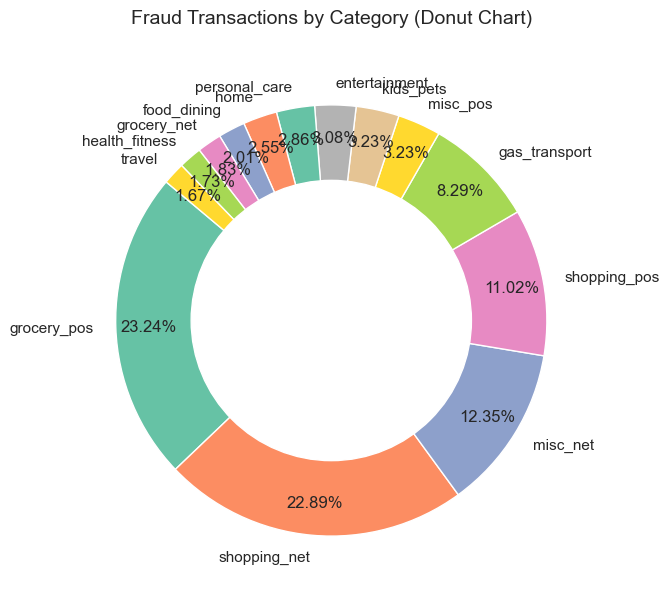

/var/folders/z9/cvzm0bkn2gv0qywmh29rgvrr0000gn/T/ipykernel_28002/1773743643.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


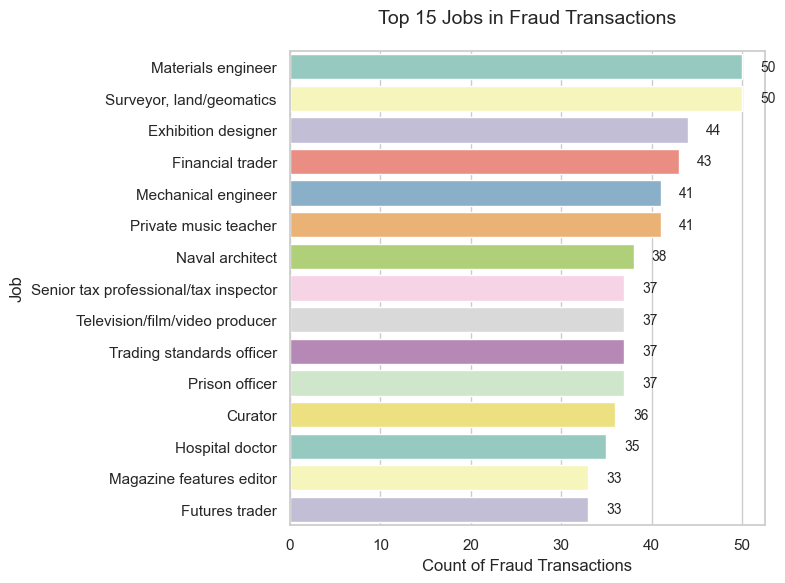

/var/folders/z9/cvzm0bkn2gv0qywmh29rgvrr0000gn/T/ipykernel_28002/1773743643.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


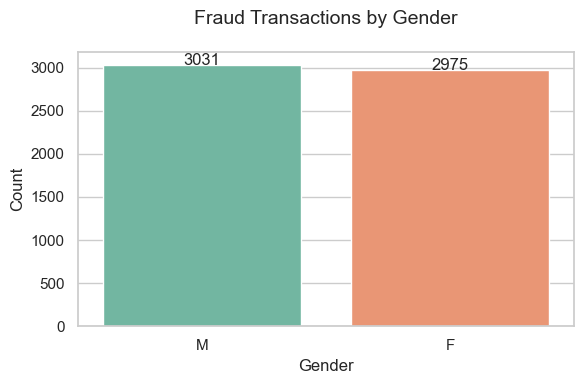

/var/folders/z9/cvzm0bkn2gv0qywmh29rgvrr0000gn/T/ipykernel_28002/1773743643.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_df, x='amt_bin', order=amt_order, palette='Paired')


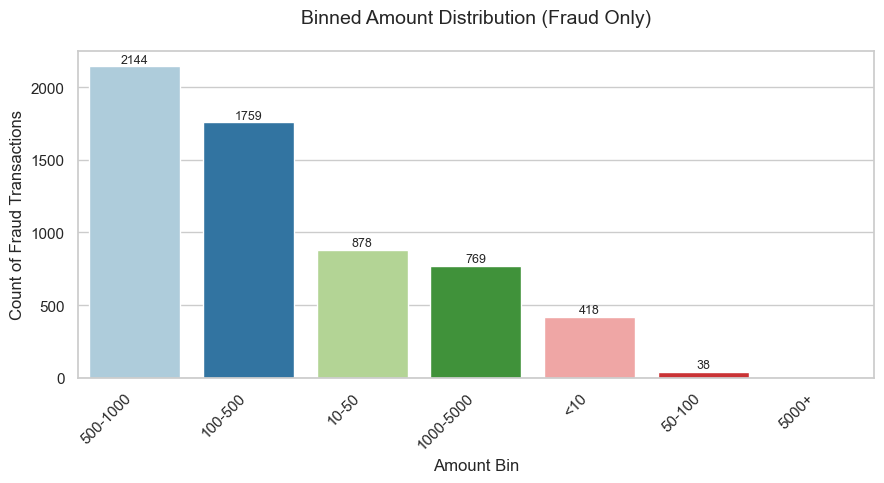

/var/folders/z9/cvzm0bkn2gv0qywmh29rgvrr0000gn/T/ipykernel_28002/1773743643.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_df, x='dist_bin', order=dist_order, palette='Paired')


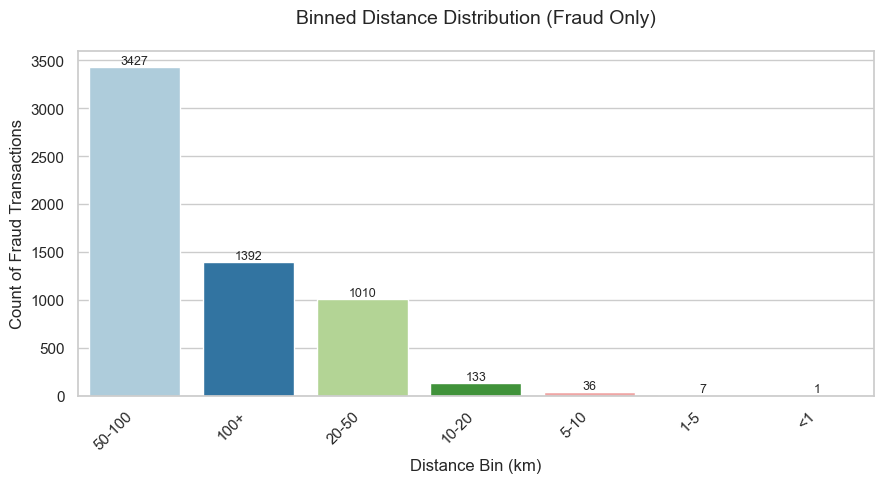

/var/folders/z9/cvzm0bkn2gv0qywmh29rgvrr0000gn/T/ipykernel_28002/1773743643.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_df, x='citypop_bin', order=citypop_order, palette='Paired')


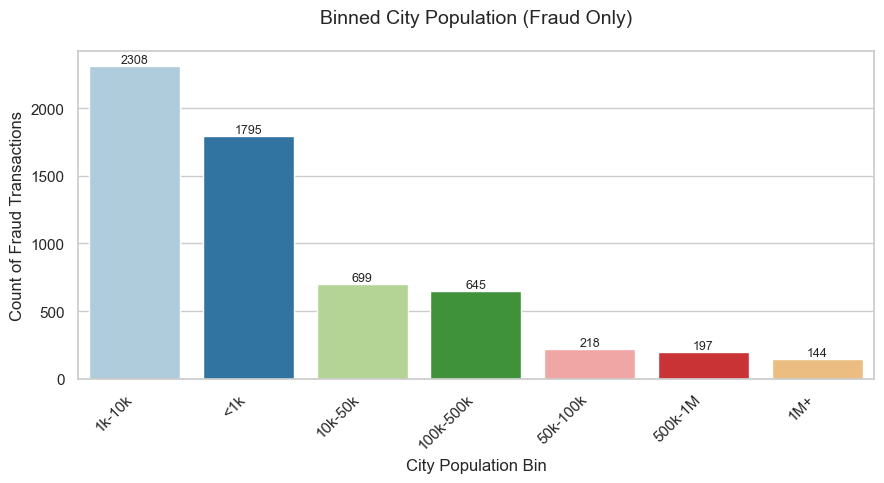

/var/folders/z9/cvzm0bkn2gv0qywmh29rgvrr0000gn/T/ipykernel_28002/1773743643.py:142: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='Paired')


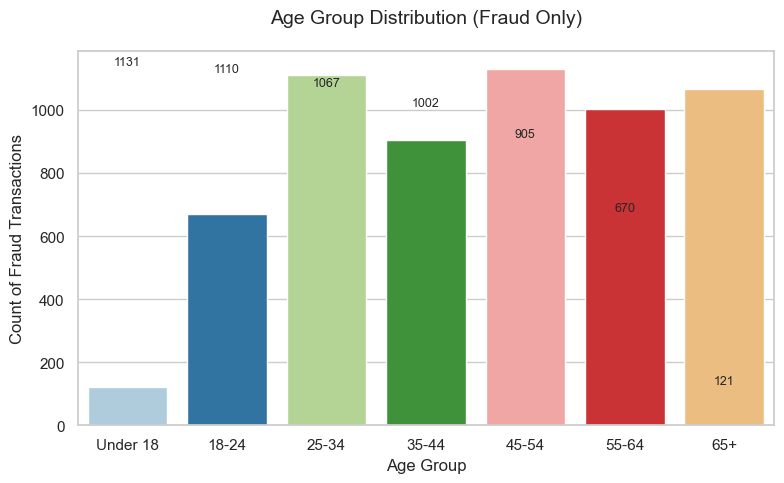

/var/folders/z9/cvzm0bkn2gv0qywmh29rgvrr0000gn/T/ipykernel_28002/1773743643.py:159: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_df, x='day_of_week', palette='coolwarm')


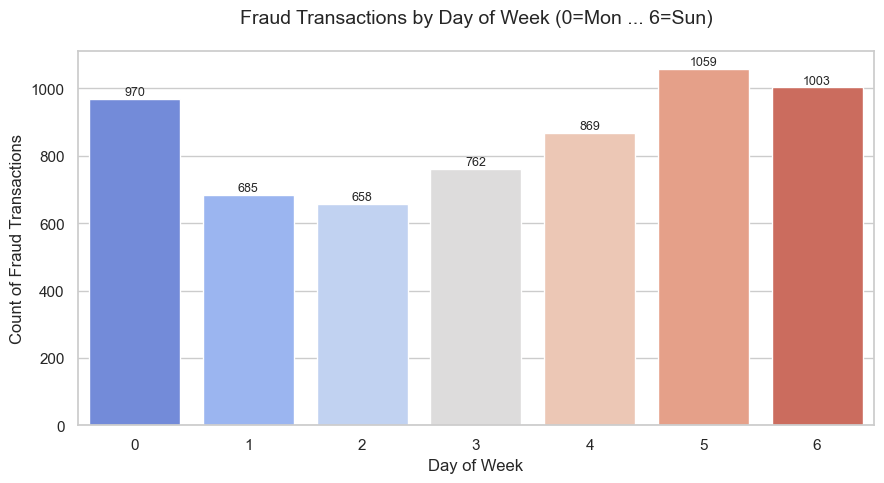

/var/folders/z9/cvzm0bkn2gv0qywmh29rgvrr0000gn/T/ipykernel_28002/1773743643.py:175: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_df, x='hour', palette='coolwarm')


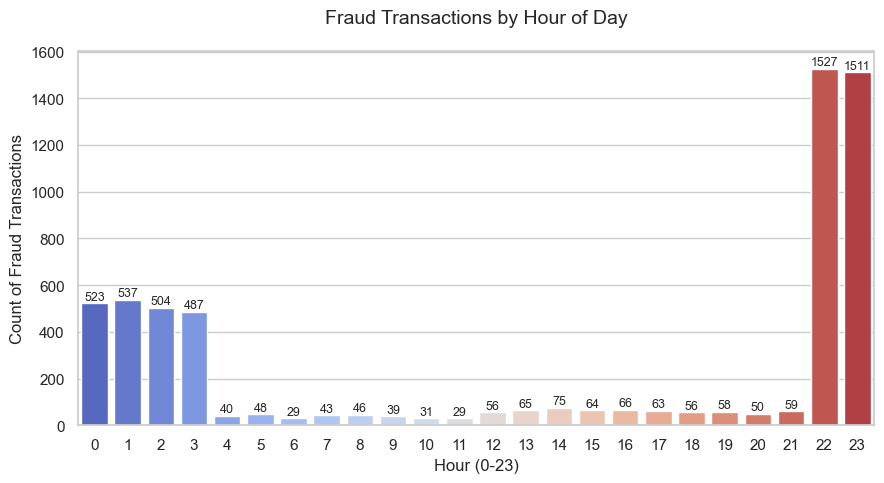

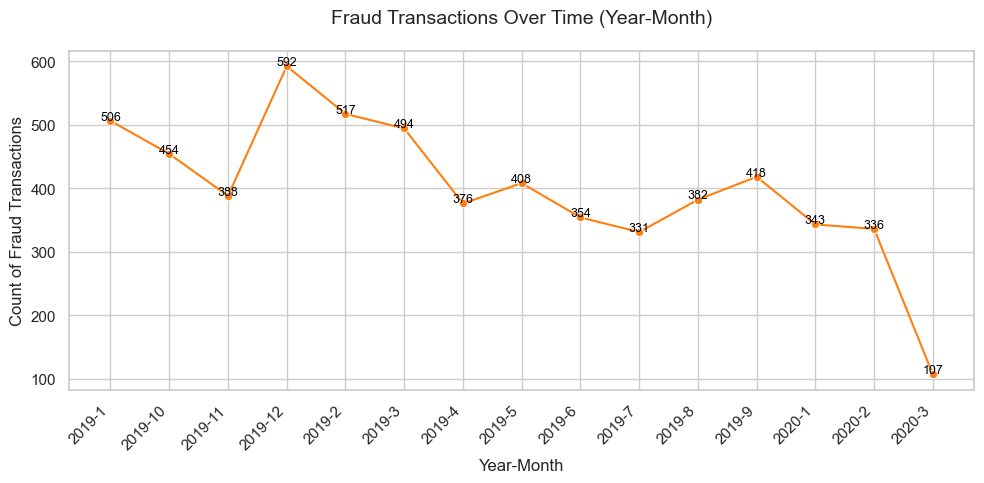

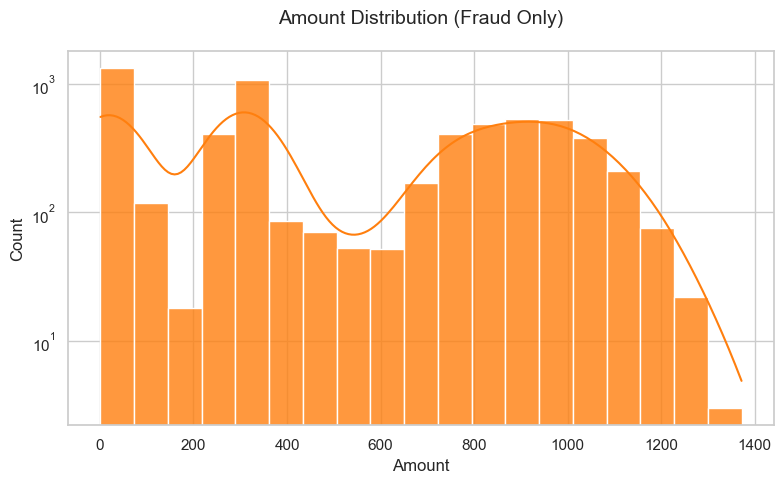

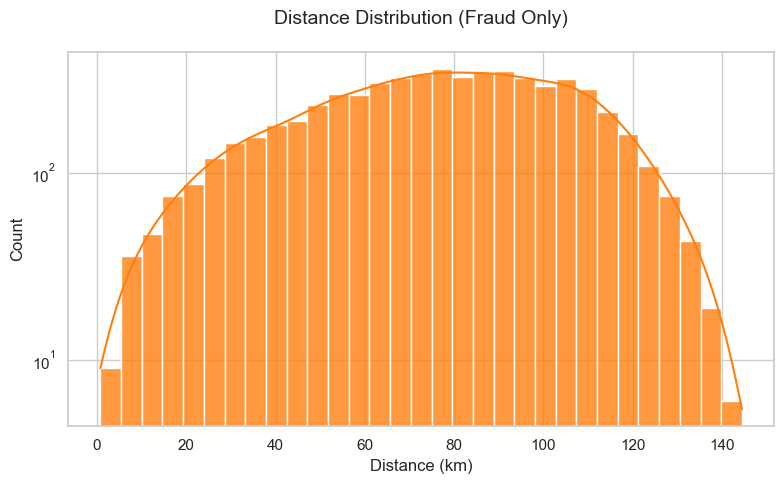

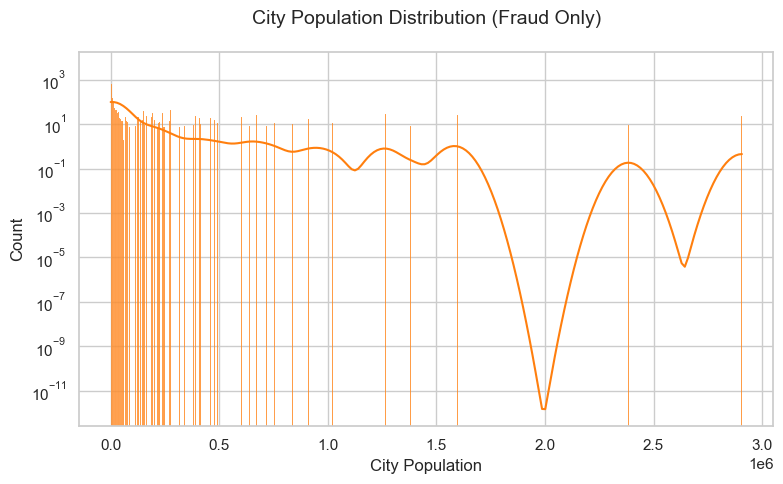

Fraud by Category (Counts & Percentage):


Fraud Category Count  Fraud Category %
category                                              
grocery_pos                     1396          23.24000
shopping_net                    1375          22.89000
misc_net                         742          12.35000
shopping_pos                     662          11.02000
gas_transport                    498           8.29000
misc_pos                         194           3.23000
kids_pets                        194           3.23000
entertainment                    185           3.08000
personal_care                    172           2.86000
home                             153           2.55000
food_dining                      121           2.01000
grocery_net                      110           1.83000
health_fitness                   104           1.73000
travel                           100           1.67000


Top 10 States for Fraud (Counts & % within Fraud Subset):


Fraud State Count (Top10)  Fraud % of Subset
state                                              
NY                           483            8.04000
TX                           391            6.51000
PA                           345            5.74000
OH                           267            4.45000
FL                           263            4.38000
CA                           263            4.38000
MI                           209            3.48000
IL                           204            3.40000
AL                           183            3.05000
MO                           180            3.00000

/var/folders/z9/cvzm0bkn2gv0qywmh29rgvrr0000gn/T/ipykernel_28002/1773743643.py:262: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


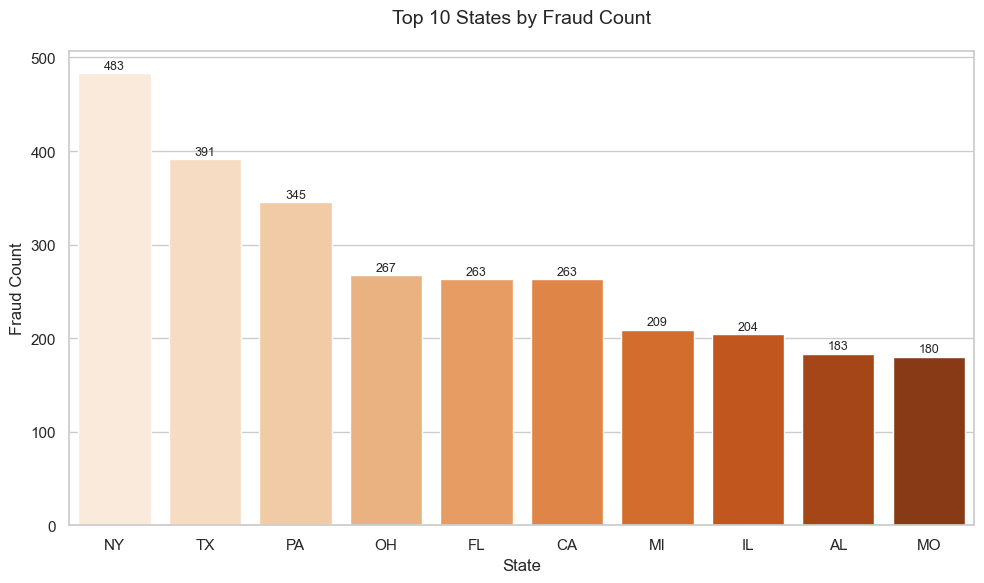

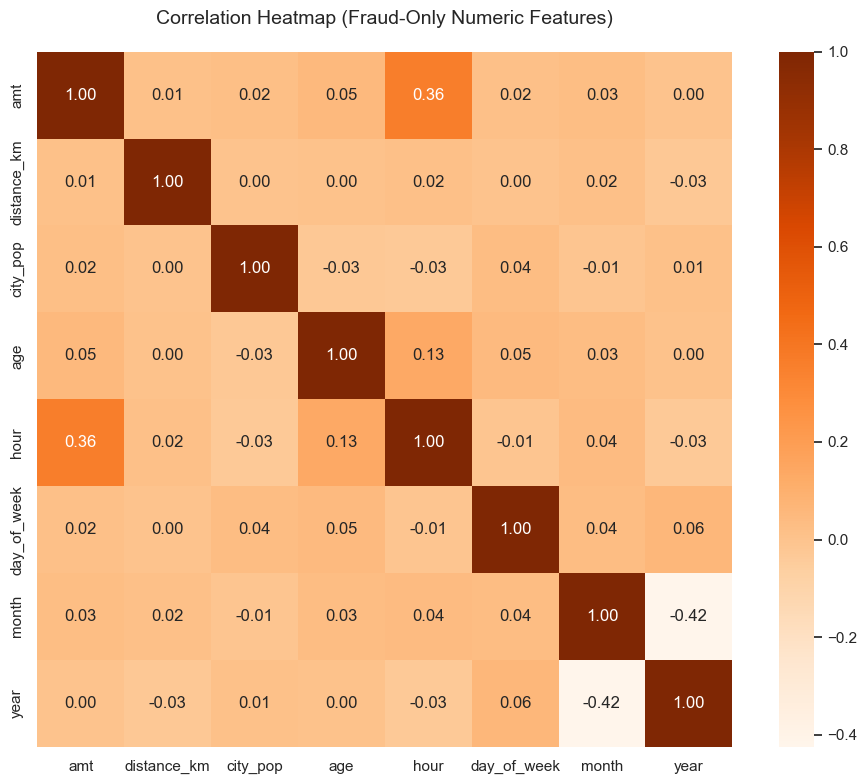

"\nFIXES & IMPROVEMENTS:\n1. Replaced invalid palette name 'chocolate' with valid palettes such as 'Oranges', 'Set2', 'Paired', etc.\n2. Added explicit bar-label annotations for each countplot or barplot, making the charts more readable.\n3. Ensured labeling (titles, axes) is correct and consistent with the actual data.\n4. Introduced two separate correlation heatmaps:\n   - Fraud-only numeric correlation.\n   - All-feature correlation (via one-hot encoding) for a broader look at relationships.\n5. Provided intuitive color choices (e.g., 'coolwarm', 'Oranges') for better clarity.\n\nUSAGE:\n- This script thoroughly explores ONLY FRAUD transactions across categories, bins, time-based features, states, etc.\n- Percentage breakdowns highlight the share of each category or state within the fraud subset.\n- The one-hot-encoded correlation heatmap helps see relationships among all variables (including encoded categorical features).\nAdjust as necessary for your data’s specifics.\n"

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------------------------------------------------
# 0. SETUP & DATA PREPARATION
# -------------------------------------------------------------------------
# Let's enforce a consistent style
sns.set_style("whitegrid")

# Create a fraud-only DataFrame
fraud_df = df[df['is_fraud'] == 1].copy()

print(f"Fraud-Only Subset Shape: {fraud_df.shape}")
print("Columns in Fraud-Only Subset:", list(fraud_df.columns), "\n")

# Numeric descriptive stats (Fraud-only)
fraud_numeric_cols = ['amt', 'distance_km', 'city_pop', 'age', 'year', 'month', 'hour', 'day_of_week']
print("Fraud-Only: Numeric Descriptive Statistics:")
display(fraud_df[fraud_numeric_cols].describe())

# Optional: Combine Year & Month into a single label for time-based plots
fraud_df['year_month'] = fraud_df['year'].astype(str) + "-" + fraud_df['month'].astype(str)

# -------------------------------------------------------------------------
# 1. FRAUD-ONLY DISTRIBUTIONS (COUNTS, PIE/DONUT, ETC.)
# -------------------------------------------------------------------------

# 1.1: Donut Chart of 'category' among FRAUD
fraud_cat_counts = fraud_df['category'].value_counts()
fig, ax = plt.subplots(figsize=(7,7))
wedges, texts, autotexts = ax.pie(
    fraud_cat_counts.values,
    labels=fraud_cat_counts.index,
    autopct='%.2f%%',
    startangle=140,
    pctdistance=0.85,  # Pulls labels inward to allow for a donut hole
    colors=sns.color_palette('Set2')
)
# Create a donut hole
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig.gca().add_artist(centre_circle)
plt.title("Fraud Transactions by Category (Donut Chart)", fontsize=14, pad=20)
plt.show()

# 1.2: Horizontal Bar Plot of 'job' among FRAUD (Top 15)
top_n_jobs = 15
fraud_job_counts = fraud_df['job'].value_counts().nlargest(top_n_jobs)
plt.figure(figsize=(8,6))
sns.barplot(
    x=fraud_job_counts.values, 
    y=fraud_job_counts.index,
    palette='Set3'
)
plt.title(f"Top {top_n_jobs} Jobs in Fraud Transactions", fontsize=14, pad=20)
plt.xlabel("Count of Fraud Transactions")
plt.ylabel("Job")
# Annotate bars
for i, val in enumerate(fraud_job_counts.values):
    plt.text(val + 2, i, f"{val}", va='center', fontsize=10)
plt.tight_layout()
plt.show()

# 1.3: Distribution of 'gender' in FRAUD
plt.figure(figsize=(6,4))
gender_counts = fraud_df['gender'].value_counts()
sns.barplot(
    x=gender_counts.index, 
    y=gender_counts.values,
    palette='Set2'
)
plt.title("Fraud Transactions by Gender", fontsize=14, pad=20)
plt.xlabel("Gender")
plt.ylabel("Count")
for i, val in enumerate(gender_counts.values):
    plt.text(i, val + 0.5, f"{val}", ha='center', fontsize=12)
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------------
# 2. FRAUD-ONLY BINS (amt_bin, dist_bin, citypop_bin, etc.)
# -------------------------------------------------------------------------

# 2.1 Binned 'amt_bin'
plt.figure(figsize=(9,5))
amt_order = fraud_df['amt_bin'].value_counts().index
sns.countplot(data=fraud_df, x='amt_bin', order=amt_order, palette='Paired')
plt.title("Binned Amount Distribution (Fraud Only)", fontsize=14, pad=20)
plt.xlabel("Amount Bin")
plt.ylabel("Count of Fraud Transactions")
# Annotate bars
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height + 5),
                    ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2.2 Binned 'dist_bin'
plt.figure(figsize=(9,5))
dist_order = fraud_df['dist_bin'].value_counts().index
sns.countplot(data=fraud_df, x='dist_bin', order=dist_order, palette='Paired')
plt.title("Binned Distance Distribution (Fraud Only)", fontsize=14, pad=20)
plt.xlabel("Distance Bin (km)")
plt.ylabel("Count of Fraud Transactions")
# Annotate bars
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height + 2),
                    ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2.3 Binned 'citypop_bin'
plt.figure(figsize=(9,5))
citypop_order = fraud_df['citypop_bin'].value_counts().index
sns.countplot(data=fraud_df, x='citypop_bin', order=citypop_order, palette='Paired')
plt.title("Binned City Population (Fraud Only)", fontsize=14, pad=20)
plt.xlabel("City Population Bin")
plt.ylabel("Count of Fraud Transactions")
# Annotate bars
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height + 2),
                    ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2.4 Age Group distribution within FRAUD
plt.figure(figsize=(8,5))
age_group_counts = fraud_df['age_group'].value_counts()
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='Paired')
plt.title("Age Group Distribution (Fraud Only)", fontsize=14, pad=20)
plt.xlabel("Age Group")
plt.ylabel("Count of Fraud Transactions")
# Annotate bars
ax = plt.gca()
for i, val in enumerate(age_group_counts.values):
    ax.text(i, val + 10, f"{val}", ha='center', fontsize=9)
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------------
# 3. TIME-BASED VIEWS (FRAUD ONLY)
# -------------------------------------------------------------------------

# 3.1 Day of Week
plt.figure(figsize=(9,5))
sns.countplot(data=fraud_df, x='day_of_week', palette='coolwarm')
plt.title("Fraud Transactions by Day of Week (0=Mon ... 6=Sun)", fontsize=14, pad=20)
plt.xlabel("Day of Week")
plt.ylabel("Count of Fraud Transactions")
# Annotate bars
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height + 2),
                    ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

# 3.2 Hour of the Day
plt.figure(figsize=(9,5))
sns.countplot(data=fraud_df, x='hour', palette='coolwarm')
plt.title("Fraud Transactions by Hour of Day", fontsize=14, pad=20)
plt.xlabel("Hour (0-23)")
plt.ylabel("Count of Fraud Transactions")
# Annotate bars
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height + 2),
                    ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

# 3.3 Year-Month Trend (Fraud Only)
year_month_counts = fraud_df['year_month'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=year_month_counts.index, y=year_month_counts.values, marker='o', color='#FF7F0E')
plt.title("Fraud Transactions Over Time (Year-Month)", fontsize=14, pad=20)
plt.xlabel("Year-Month")
plt.ylabel("Count of Fraud Transactions")
plt.xticks(rotation=45, ha='right')
for i, val in enumerate(year_month_counts.values):
    plt.text(i, val + 2, f"{val}", ha='center', color='black', fontsize=9)
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------------
# 4. FRAUD-ONLY NUMERIC DISTRIBUTIONS
# -------------------------------------------------------------------------

# 4.1 Amount Distribution
plt.figure(figsize=(8,5))
sns.histplot(data=fraud_df, x='amt', kde=True, color='#FF7F0E', alpha=0.8)
plt.title("Amount Distribution (Fraud Only)", fontsize=14, pad=20)
plt.xlabel("Amount")
plt.ylabel("Count")
plt.yscale('log')  # log scale if heavily skewed
plt.tight_layout()
plt.show()

# 4.2 Distance Distribution
plt.figure(figsize=(8,5))
sns.histplot(data=fraud_df, x='distance_km', kde=True, color='#FF7F0E', alpha=0.8)
plt.title("Distance Distribution (Fraud Only)", fontsize=14, pad=20)
plt.xlabel("Distance (km)")
plt.ylabel("Count")
plt.yscale('log')
plt.tight_layout()
plt.show()

# 4.3 City Population Distribution
plt.figure(figsize=(8,5))
sns.histplot(data=fraud_df, x='city_pop', kde=True, color='#FF7F0E', alpha=0.8)
plt.title("City Population Distribution (Fraud Only)", fontsize=14, pad=20)
plt.xlabel("City Population")
plt.ylabel("Count")
plt.yscale('log')
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------------
# 5. FRAUD-ONLY PERCENTAGE BREAKDOWNS
# -------------------------------------------------------------------------

# 5.1 Fraud by Category (Counts & Percent)
fraud_cat_counts = fraud_df['category'].value_counts()
fraud_cat_percent = (fraud_cat_counts / fraud_cat_counts.sum()) * 100
cat_table = pd.DataFrame({
    "Fraud Category Count": fraud_cat_counts,
    "Fraud Category %": fraud_cat_percent.round(2)
})
print("Fraud by Category (Counts & Percentage):")
display(cat_table)

# 5.2 Fraud by State (Top 10)
fraud_state_counts = fraud_df['state'].value_counts().nlargest(10)
fraud_state_percent = (fraud_state_counts / fraud_df.shape[0]) * 100
state_table = pd.DataFrame({
    "Fraud State Count (Top10)": fraud_state_counts,
    "Fraud % of Subset": fraud_state_percent.round(2)
})
print("\nTop 10 States for Fraud (Counts & % within Fraud Subset):")
display(state_table)

# Bar Plot for State
plt.figure(figsize=(10,6))
sns.barplot(
    x=fraud_state_counts.index,
    y=fraud_state_counts.values,
    palette='Oranges'
)
plt.title("Top 10 States by Fraud Count", fontsize=14, pad=20)
plt.xlabel("State")
plt.ylabel("Fraud Count")
# Annotate bars
ax = plt.gca()
for i, val in enumerate(fraud_state_counts.values):
    ax.text(i, val + 5, f"{val}", ha='center', fontsize=9)
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------------
# 6. FRAUD-ONLY CORRELATION (NUMERIC COLUMNS)
# -------------------------------------------------------------------------
fraud_corr_cols = ['amt','distance_km','city_pop','age','hour','day_of_week','month','year']
fraud_corr = fraud_df[fraud_corr_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(
    fraud_corr,
    annot=True,
    cmap='Oranges',
    fmt='.2f',
    square=True
)
plt.title("Correlation Heatmap (Fraud-Only Numeric Features)", fontsize=14, pad=20)
plt.tight_layout()
plt.show()



# -------------------------------------------------------------------------
# EXPLANATION
# -------------------------------------------------------------------------
"""
FIXES & IMPROVEMENTS:
1. Replaced invalid palette name 'chocolate' with valid palettes such as 'Oranges', 'Set2', 'Paired', etc.
2. Added explicit bar-label annotations for each countplot or barplot, making the charts more readable.
3. Ensured labeling (titles, axes) is correct and consistent with the actual data.
4. Introduced two separate correlation heatmaps:
   - Fraud-only numeric correlation.
   - All-feature correlation (via one-hot encoding) for a broader look at relationships.
5. Provided intuitive color choices (e.g., 'coolwarm', 'Oranges') for better clarity.

USAGE:
- This script thoroughly explores ONLY FRAUD transactions across categories, bins, time-based features, states, etc.
- Percentage breakdowns highlight the share of each category or state within the fraud subset.
- The one-hot-encoded correlation heatmap helps see relationships among all variables (including encoded categorical features).
Adjust as necessary for your data’s specifics.
"""


In [43]:
df.head()

cc_num                            merchant       category  \
0 2703190000000000.00000          fraud_Rippin, Kub and Mann       misc_net   
1     630423000000.00000     fraud_Heller, Gutmann and Zieme    grocery_pos   
2   38859500000000.00000                fraud_Lind-Buckridge  entertainment   
3 3534090000000000.00000  fraud_Kutch, Hermiston and Farrell  gas_transport   
4  375534000000000.00000                 fraud_Keeling-Crist       misc_pos   

        amt gender                        street            city state    zip  \
0   4.97000      F                561 Perry Cove  Moravian Falls    NC  28654   
1 107.23000      F  43039 Riley Greens Suite 393          Orient    WA  99160   
2 220.11000      M      594 White Dale Suite 530      Malad City    ID  83252   
3  45.00000      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632   
4  41.96000      M              408 Bradley Rest        Doe Hill    VA  24433   

       lat       long  city_pop                                job  \
0 36.07880  -81.17810      3495          Psychologist, counselling   
1 48.88780 -118.21050       149  Special educational needs teacher   
2 42.18080 -112.26200      4154        Nature conservation officer   
3 46.23060 -112.11380      1939                    Patent attorney   
4 38.42070  -79.46290        99     Dance movement psychotherapist   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018   36.01129   -82.04832   
1  1f76529f8574734946361c461b024d99  1325376044   49.15905  -118.18646   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051   43.15070  -112.15448   
3  6b849c168bdad6f867558c3793159a81  1325376076   47.03433  -112.56107   
4  a41d7549acf90789359a9aa5346dcb46  1325376186   38.67500   -78.63246   

   is_fraud  age  year  month  hour  day_of_week age_group  distance_km  \
0         0   30  2019      1     0            1     25-34     78.59757   
1         0   40  2019      1     0            1     35-44     30.21218   
2         0   56  2019      1     0            1     55-64    108.20608   
3         0   51  2019      1     0            1     45-54     95.67323   
4         0   32  2019      1     0            1     25-34     77.55674   

   amt_bin dist_bin citypop_bin is_fraud_str  
0      <10   50-100      1k-10k            0  
1  100-500    20-50         <1k            0  
2  100-500     100+      1k-10k            0  
3    10-50   50-100      1k-10k            0  
4    10-50   50-100         <1k            0

In [44]:
print(df['job'].nunique())

493


In [45]:
# Get number of unique jobs
print(f"Number of unique jobs: {df['job'].nunique()}")

# Display unique jobs
print("\nUnique jobs:")
for job in sorted(df['job'].unique()):
    print(job)

Number of unique jobs: 493

Unique jobs:
Academic librarian
Accountant, chartered
Accountant, chartered certified
Accountant, chartered public finance
Accounting technician
Acupuncturist
Administrator
Administrator, arts
Administrator, charities/voluntary organisations
Administrator, education
Administrator, local government
Advertising account executive
Advertising account planner
Advertising copywriter
Advice worker
Aeronautical engineer
Agricultural consultant
Aid worker
Air broker
Air cabin crew
Air traffic controller
Airline pilot
Ambulance person
Amenity horticulturist
Analytical chemist
Animal nutritionist
Animal technologist
Animator
Applications developer
Arboriculturist
Archaeologist
Architect
Architectural technologist
Archivist
Armed forces logistics/support/administrative officer
Armed forces technical officer
Armed forces training and education officer
Art gallery manager
Art therapist
Artist
Arts development officer
Associate Professor
Audiological scientist
Barista
Barr

In [38]:
!pip install category_encoders

In [ ]:
# # ---------------------------
# # 1) SETUP
# # ---------------------------
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# # ML imports
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import RFE
# from sklearn.metrics import classification_report, confusion_matrix

# # Advanced Encoding for high-cardinality features
# # => pip install category_encoders
# %pip install category_encoders
# from category_encoders import TargetEncoder

# # For synthetic sampling
# from imblearn.over_sampling import SMOTE
# from imblearn.pipeline import Pipeline as ImbPipeline

# # For progress bar
# from tqdm import tqdm

# # ---------------------------
# # 2) PREPARE DATA & SPLIT
# # ---------------------------
# numeric_features = ['amt', 'distance_km', 'age', 'city_pop', 'year', 'month', 'hour', 'day_of_week']
# high_card_col = ['job']
# basic_cat_features = ['category', 'gender', 'state']

# df_model = df.dropna(subset=numeric_features + high_card_col + basic_cat_features + ['is_fraud'])
# X = df_model[numeric_features + high_card_col + basic_cat_features]
# y = df_model['is_fraud'].astype(int)

# print("Initial shape of X:", X.shape)
# print("Initial shape of y:", y.shape)
# print("Class distribution:\n", y.value_counts(normalize=True)*100, "%")

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y,
#     test_size=0.25,
#     random_state=42,
#     stratify=y
# )

# print("\nTraining set shape:", X_train.shape, y_train.shape)
# print("Test set shape:", X_test.shape, y_test.shape)
# print("Train set class distribution:\n", y_train.value_counts(normalize=True)*100, "%")
# print("Test set class distribution:\n", y_test.value_counts(normalize=True)*100, "%")

# # ---------------------------
# # 3) BUILD PREPROCESSOR
# # ---------------------------
# numeric_transformer = Pipeline(steps=[
#     ("scaler", StandardScaler())
# ])
# ohe_transformer = Pipeline(steps=[
#     ("ohe", OneHotEncoder(drop='first', handle_unknown='ignore'))
# ])
# target_encoder = Pipeline(steps=[
#     ("target_enc", TargetEncoder(smoothing=0.3))
# ])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ("num", numeric_transformer, numeric_features),
#         ("ohe", ohe_transformer, basic_cat_features),
#         ("te", target_encoder, high_card_col),
#     ],
#     remainder='drop'
# )

# # ---------------------------
# # 4) CREATE IMB PIPELINE
# # ---------------------------
# # Add verbose=1 to model and RFE for debugging logs
# model = RandomForestClassifier(n_estimators=100, random_state=42, verbose=1)
# rfe = RFE(estimator=model, n_features_to_select=10, step=1, verbose=1)

# pipeline = ImbPipeline([
#     ("preprocessor", preprocessor),
#     ("smote", SMOTE(random_state=42)),
#     ("rfe", rfe),
#     ("rf", model)
# ])

# # ---------------------------
# # 5) FIT & EVALUATE
# # ---------------------------
# print("\n[DEBUG] Starting fit for pipeline (this might take a while)...")

# # Simple progress bar to show that something is happening
# for _ in tqdm(range(1), desc="Pipeline Fit Progress"):
#     pipeline.fit(X_train, y_train)

# y_pred = pipeline.predict(X_test)
# print("\n=== MODEL PERFORMANCE WITH SMOTE + RFE ===")
# print("Classification Report:\n", classification_report(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# # ---------------------------
# # 6) CHECK SELECTED FEATURES
# # ---------------------------
# numeric_names = numeric_features
# ohe_obj = pipeline.named_steps['preprocessor'].named_transformers_['ohe']
# ohe_feature_names = ohe_obj.named_steps['ohe'].get_feature_names_out(basic_cat_features)
# job_name_encoded = ["job_target"]
# all_transformed_features = list(numeric_names) + list(ohe_feature_names) + job_name_encoded

# rfe_obj = pipeline.named_steps['rfe']
# support_mask = rfe_obj.support_
# ranking = rfe_obj.ranking_

# print("\n[DEBUG] Feature Importance and RFE Results:")
# for i, name in enumerate(all_transformed_features):
#     print(f"{i}: {name} | Support={support_mask[i]}, Rank={ranking[i]}")

# selected_features = [f for f, s in zip(all_transformed_features, support_mask) if s]
# print("\n=== SELECTED FEATURES by RFE ===")
# for feat in selected_features:
#     print("   -", feat)


Note: you may need to restart the kernel to use updated packages.
Initial shape of X: (1048575, 12)
Initial shape of y: (1048575,)
Class distribution:
 is_fraud
0   99.42722
1    0.57278
Name: proportion, dtype: float64 %

Training set shape: (786431, 12) (786431,)
Test set shape: (262144, 12) (262144,)
Train set class distribution:
 is_fraud
0   99.42729
1    0.57271
Name: proportion, dtype: float64 %
Test set class distribution:
 is_fraud
0   99.42703
1    0.57297
Name: proportion, dtype: float64 %

[DEBUG] Starting fit for pipeline (this might take a while)...


Pipeline Fit Progress:   0%|          | 0/1 [00:00<?, ?it/s]

Fitting estimator with 73 features.


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  7.2min


Fitting estimator with 72 features.


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  7.4min
Pipeline Fit Progress:   0%|          | 0/1 [28:32<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
# # ---------------------------
# # 1) SETUP
# # ---------------------------
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# # ML imports
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.feature_selection import RFE
# from sklearn.metrics import classification_report, confusion_matrix

# # XGBoost (CPU)
# import xgboost as xgb

# # Advanced Encoding for high-cardinality features
# # => pip install category_encoders
# from category_encoders import TargetEncoder

# # For synthetic sampling
# from imblearn.over_sampling import SMOTE
# from imblearn.pipeline import Pipeline as ImbPipeline

# # (Optional) for a progress bar
# from tqdm import tqdm

# # ---------------------------
# # 2) PREPARE DATA & SPLIT
# # ---------------------------
# # Suppose you have a DataFrame named 'df' with a target 'is_fraud' (0 or 1).
# # Identified columns from your EDA/feature engineering:
# numeric_features = ['amt', 'distance_km', 'age', 'city_pop', 'year', 'month', 'hour', 'day_of_week']
# high_card_col = ['job']
# basic_cat_features = ['category', 'gender', 'state']

# # Drop rows with missing critical columns
# df_model = df.dropna(subset=numeric_features + high_card_col + basic_cat_features + ['is_fraud'])

# # Features (X) and target (y)
# X = df_model[numeric_features + high_card_col + basic_cat_features]
# y = df_model['is_fraud'].astype(int)

# print("Initial shape of X:", X.shape)
# print("Initial shape of y:", y.shape)
# print("Class distribution:\n", y.value_counts(normalize=True)*100, "%")

# # Train-Test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y,
#     test_size=0.25,
#     random_state=42,
#     stratify=y
# )

# print("\nTraining set shape:", X_train.shape, y_train.shape)
# print("Test set shape:", X_test.shape, y_test.shape)
# print("Train set class distribution:\n", y_train.value_counts(normalize=True)*100, "%")
# print("Test set class distribution:\n", y_test.value_counts(normalize=True)*100, "%")

# # ---------------------------
# # 3) BUILD PREPROCESSOR
# # ---------------------------
# # Numeric pipeline
# numeric_transformer = Pipeline(steps=[
#     ("scaler", StandardScaler())
# ])

# # One-Hot for small/medium-cat features
# ohe_transformer = Pipeline(steps=[
#     ("ohe", OneHotEncoder(drop='first', handle_unknown='ignore'))
# ])

# # TargetEncoder for high-cardinality 'job'
# target_encoder = Pipeline(steps=[
#     ("target_enc", TargetEncoder(smoothing=0.3))
# ])

# # Combine with ColumnTransformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ("num", numeric_transformer, numeric_features),
#         ("ohe", ohe_transformer, basic_cat_features),
#         ("te", target_encoder, high_card_col),
#     ],
#     remainder='drop'
# )

# # ---------------------------
# # 4) CREATE IMB PIPELINE
# # ---------------------------
# # Use XGBoost on CPU with "hist" method
# # (Remove GPU references to avoid XGBoostError)
# xgb_clf = xgb.XGBClassifier(
#     n_estimators=100,
#     random_state=42,
#     verbosity=1,
#     tree_method='hist'        # CPU-based histogram algorithm
#     # predictor='cpu_predictor' # (implied by tree_method=hist)
# )

# # RFE for wrapper feature selection
# rfe = RFE(
#     estimator=xgb_clf,
#     n_features_to_select=10,
#     step=1,
#     verbose=1
# )

# # Build pipeline
# pipeline = ImbPipeline([
#     ("preprocessor", preprocessor),   # encode & scale
#     ("smote", SMOTE(random_state=42)),
#     ("rfe", rfe),                     # wrapper feature selection
#     ("xgb", xgb_clf)                  # final classifier
# ])

# # ---------------------------
# # 5) FIT & EVALUATE
# # ---------------------------
# print("\n[DEBUG] Starting fit for pipeline (CPU only, no GPU)...")

# # Optional progress bar
# for _ in tqdm(range(1), desc="Pipeline Fit Progress"):
#     pipeline.fit(X_train, y_train)

# # Predict on test set
# y_pred = pipeline.predict(X_test)

# print("\n=== MODEL PERFORMANCE WITH SMOTE + RFE (XGBoost, CPU) ===")
# print("Classification Report:\n", classification_report(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# # ---------------------------
# # 6) CHECK SELECTED FEATURES
# # ---------------------------
# # Step 6.1: gather names of transformed features in the same order the pipeline uses them
# numeric_names = numeric_features

# # For OHE columns
# ohe_obj = pipeline.named_steps['preprocessor'].named_transformers_['ohe']
# ohe_feature_names = ohe_obj.named_steps['ohe'].get_feature_names_out(basic_cat_features)

# # For 'job' with TargetEncoder, it yields exactly 1 column
# job_encoded_col = ["job_target_enc"] 

# all_transformed_features = list(numeric_names) + list(ohe_feature_names) + job_encoded_col

# # Step 6.2: get RFE object
# rfe_obj = pipeline.named_steps['rfe']
# support_mask = rfe_obj.support_
# ranking = rfe_obj.ranking_

# print("\n[DEBUG] Feature Importance and RFE Results:")
# for i, name in enumerate(all_transformed_features):
#     print(f"{i}: {name} | Support={support_mask[i]}, Rank={ranking[i]}")

# selected_features = [f for f, s in zip(all_transformed_features, support_mask) if s]
# print("\n=== SELECTED FEATURES by RFE ===")
# for feat in selected_features:
#     print("   -", feat)

# print("\n[INFO] Pipeline + XGBoost (CPU) completed successfully.")


Initial shape of X: (1048575, 12)
Initial shape of y: (1048575,)
Class distribution:
 is_fraud
0   99.42722
1    0.57278
Name: proportion, dtype: float64 %

Training set shape: (786431, 12) (786431,)
Test set shape: (262144, 12) (262144,)
Train set class distribution:
 is_fraud
0   99.42729
1    0.57271
Name: proportion, dtype: float64 %
Test set class distribution:
 is_fraud
0   99.42703
1    0.57297
Name: proportion, dtype: float64 %

[DEBUG] Starting fit for pipeline (CPU only, no GPU)...


Pipeline Fit Progress:   0%|          | 0/1 [00:00<?, ?it/s]

Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.


Pipeline Fit Progress:   0%|          | 0/1 [00:51<?, ?it/s]


KeyboardInterrupt: 

In [47]:
# -----------------------------------------------------------
# 1) IMPORTS & SETUP
# -----------------------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn / ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix

# XGBoost (CPU-based)
import xgboost as xgb

# Advanced encoding for high-cardinality or single-col cat
# (pip install category_encoders)
from category_encoders import TargetEncoder

# For synthetic sampling (SMOTE)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Optional progress bar (pip install tqdm)
from tqdm import tqdm


# -----------------------------------------------------------
# 2) LOAD & SPLIT DATA
# -----------------------------------------------------------
# Suppose your original DataFrame is named 'df' with target 'is_fraud' (0 or 1).
# We'll define columns based on your EDA/feature engineering:

numeric_features = ['amt', 'distance_km', 'age', 'city_pop', 'year', 'month', 'hour', 'day_of_week']
# We'll treat BOTH 'category' and 'job' via Target Encoding
cat_high_card = ['category', 'job']  

# Drop rows with missing critical columns
df_model = df.dropna(subset=numeric_features + cat_high_card + ['is_fraud'])

# Separate features (X) and target (y)
X = df_model[numeric_features + cat_high_card]
y = df_model['is_fraud'].astype(int)

print("Initial shape of X:", X.shape)
print("Initial shape of y:", y.shape)
print("Class distribution:\n", y.value_counts(normalize=True)*100, "%")

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("\nTraining set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)
print("Train set class distribution:\n", y_train.value_counts(normalize=True)*100, "%")
print("Test set class distribution:\n", y_test.value_counts(normalize=True)*100, "%")


# -----------------------------------------------------------
# 3) PREPROCESSING
# -----------------------------------------------------------
# 3.1 Numeric: scale with StandardScaler
numeric_transformer = Pipeline([
    ("scaler", StandardScaler())
])

# 3.2 TargetEncoder for BOTH 'category' and 'job'
#    so each becomes exactly ONE numeric column, not multiple
cat_target_encode = Pipeline([
    ("target_enc", TargetEncoder(smoothing=0.3))
])

# 3.3 Combine with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("te", cat_target_encode, cat_high_card),
    ],
    remainder='drop'
)


# -----------------------------------------------------------
# 4) BUILD PIPELINE (SMOTE + RFE + XGBoost)
# -----------------------------------------------------------
# XGBoost on CPU with tree_method='hist'
xgb_clf = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    verbosity=1,
    tree_method='hist'   # ensures CPU-based (no GPU needed)
)

# RFE with XGBoost
rfe = RFE(
    estimator=xgb_clf,
    n_features_to_select=5,  # You can tweak this
    step=1,
    verbose=1
)

# ImbPipeline that includes SMOTE
pipeline = ImbPipeline([
    ("preprocessor", preprocessor),  # scale & target-encode
    ("smote", SMOTE(random_state=42)),
    ("rfe", rfe),                    # wrapper feature selection
    ("xgb", xgb_clf)                 # final classifier
])


# -----------------------------------------------------------
# 5) FIT & EVALUATE
# -----------------------------------------------------------
print("\n[DEBUG] Starting fit for pipeline (CPU only, no GPU)...")

for _ in tqdm(range(1), desc="Pipeline Fit Progress"):
    pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("\n=== MODEL PERFORMANCE WITH SMOTE + RFE (XGBoost, CPU) ===")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


# -----------------------------------------------------------
# 6) CHECK SELECTED FEATURES
# -----------------------------------------------------------
# (a) We had numeric features + (category, job) target-encoded
# => numeric_features (8 columns) + 2 cat columns = 10 columns total BEFORE RFE
#    but the numeric pipeline could still produce 8 columns, the cat pipeline 2 columns => total 10 features.

all_transformed_features = numeric_features + cat_high_card  # matches order in ColumnTransformer

# (b) RFE object
rfe_obj = pipeline.named_steps['rfe']
support_mask = rfe_obj.support_
ranking = rfe_obj.ranking_

print("\n[DEBUG] Feature Importance and RFE Results:")
for i, feat_name in enumerate(all_transformed_features):
    print(f"{i}: {feat_name} | Support={support_mask[i]}, Rank={ranking[i]}")

selected_features = [f for f, s in zip(all_transformed_features, support_mask) if s]
print("\n=== SELECTED FEATURES by RFE ===")
for feat in selected_features:
    print("   -", feat)

print("\n[INFO] Pipeline + XGBoost (CPU) with single-col Target Enc for 'category' & 'job' completed successfully!")


Initial shape of X: (1048575, 10)
Initial shape of y: (1048575,)
Class distribution:
 is_fraud
0   99.42722
1    0.57278
Name: proportion, dtype: float64 %

Training set shape: (786431, 10) (786431,)
Test set shape: (262144, 10) (262144,)
Train set class distribution:
 is_fraud
0   99.42729
1    0.57271
Name: proportion, dtype: float64 %
Test set class distribution:
 is_fraud
0   99.42703
1    0.57297
Name: proportion, dtype: float64 %

[DEBUG] Starting fit for pipeline (CPU only, no GPU)...


Pipeline Fit Progress:   0%|          | 0/1 [00:00<?, ?it/s]

Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


Pipeline Fit Progress: 100%|██████████| 1/1 [00:33<00:00, 33.32s/it]



=== MODEL PERFORMANCE WITH SMOTE + RFE (XGBoost, CPU) ===
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    260642
           1       0.58      0.86      0.70      1502

    accuracy                           1.00    262144
   macro avg       0.79      0.93      0.85    262144
weighted avg       1.00      1.00      1.00    262144

Confusion Matrix:
 [[259717    925]
 [   208   1294]]

[DEBUG] Feature Importance and RFE Results:
0: amt | Support=True, Rank=1
1: distance_km | Support=False, Rank=6
2: age | Support=False, Rank=3
3: city_pop | Support=False, Rank=4
4: year | Support=False, Rank=5
5: month | Support=False, Rank=2
6: hour | Support=True, Rank=1
7: day_of_week | Support=True, Rank=1
8: category | Support=True, Rank=1
9: job | Support=True, Rank=1

=== SELECTED FEATURES by RFE ===
   - amt
   - hour
   - day_of_week
   - category
   - job

[INFO] Pipeline + XGBoost (CPU) with single-col Target Enc for

In [41]:
# -----------------------------------------------------------
# 1) IMPORTS & SETUP
# -----------------------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn / ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix

# XGBoost (CPU-based)
import xgboost as xgb

# Advanced encoding for high-cardinality or single-col cat
from category_encoders import TargetEncoder

# For synthetic sampling (SMOTE)
from imblearn.over_sampling import SMOTE

# Optional progress bar
from tqdm import tqdm

# -----------------------------------------------------------
# 2) DROP USELESS COLUMNS & DEFINE FEATURES
# -----------------------------------------------------------
"""
Your original columns are:

cc_num, merchant, category, amt, gender, street, city, state, zip, lat, long,
city_pop, job, trans_num, unix_time, merch_lat, merch_long, is_fraud, age,
year, month, hour, day_of_week, age_group, distance_km, amt_bin, dist_bin,
citypop_bin, is_fraud_str

We remove columns that are duplicates, IDs, or binned/duplicated versions:
- cc_num, merchant, street, zip, lat, long, merch_lat, merch_long, trans_num, 
  unix_time, age_group, amt_bin, dist_bin, citypop_bin, is_fraud_str
Because you already have features like `amt`, `distance_km`, `age`, etc.
"""

# Suppose df is your full DataFrame:
# df = pd.read_csv("fraudTrain.csv") # or however you load it

# Keep these final columns:
#   category, amt, gender, city, state, city_pop, job, is_fraud,
#   age, year, month, hour, day_of_week, distance_km

useful_cols = [
    "category", "amt", "gender", "city", "state", "city_pop", "job",
    "is_fraud", "age", "year", "month", "hour", "day_of_week", "distance_km","merchant"
]

# Filter df to keep only those columns
df_clean = df[useful_cols].copy()

# Drop rows with any critical missing values
df_clean.dropna(inplace=True)

# -----------------------------------------------------------
# 3) SPLIT INTO TRAIN/TEST
# -----------------------------------------------------------
X = df_clean.drop(columns=["is_fraud"])
y = df_clean["is_fraud"].astype(int)

print("Initial shape of X:", X.shape)
print("Initial shape of y:", y.shape)
print("Class distribution:\n", y.value_counts(normalize=True) * 100, "%")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("\nTraining set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)
print("Train set class distribution:\n", y_train.value_counts(normalize=True)*100, "%")
print("Test set class distribution:\n", y_test.value_counts(normalize=True)*100, "%")

# -----------------------------------------------------------
# 4) DEFINE COLUMN GROUPS FOR ENCODING
# -----------------------------------------------------------
# Numeric columns
numeric_features = ["amt", "distance_km", "age", "city_pop", 
                    "year", "month", "hour", "day_of_week",]

# A small categorical (gender) => One-Hot
cat_small = ["gender"]

# High-cardinality (or more complex) cat => TargetEncode
cat_high = ["city", "state", "job", "category","merchant"]  
# (You might want to do OHE for 'state' if it has few categories, but let's keep it consistent.)

# -----------------------------------------------------------
# 5) BUILD COLUMNTRANSFORMER
# -----------------------------------------------------------
from sklearn.pipeline import make_pipeline  # for clarity

# 5.1 Numeric Pipeline
numeric_transformer = Pipeline([
    ("scaler", StandardScaler())
])

# 5.2 One-Hot Pipeline for small cat
ohe_transformer = Pipeline([
    ("ohe", OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# 5.3 TargetEncoder Pipeline for big cat
target_encoder = Pipeline([
    ("target_enc", TargetEncoder(smoothing=0.3))
])

# 5.4 Combine in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("ohe", ohe_transformer, cat_small),
        ("te", target_encoder, cat_high),
    ],
    remainder="drop"
)

# -----------------------------------------------------------
# 6) MANUAL APPROACH TO SEE SMOTE EFFECT
# -----------------------------------------------------------
# 6.1 Fit/transform X_train => numeric + cat encoding
X_train_enc = preprocessor.fit_transform(X_train, y_train)
X_test_enc  = preprocessor.transform(X_test)

print("\n[INFO] Shape of X_train_enc BEFORE SMOTE:", X_train_enc.shape)
print("Class distribution in y_train BEFORE SMOTE:", np.bincount(y_train))

# 6.2 Apply SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_enc, y_train)

print("\n[INFO] Shape of X_train_enc AFTER SMOTE:", X_train_sm.shape)
print("Class distribution in y_train AFTER SMOTE:", np.bincount(y_train_sm))

# -----------------------------------------------------------
# 7) RFE + XGBoost FOR FEATURE SELECTION
# -----------------------------------------------------------
# 7.1 Define XGBoost classifier on CPU
xgb_clf = xgboost_model = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    verbosity=1,
    tree_method='hist'
)

# 7.2 RFE wrapper
rfe = RFE(
    estimator=xgb_clf,
    n_features_to_select= 11,  # tweak as desired
    step=1,
    verbose=1
)

print("\n[DEBUG] Starting RFE fit... (this may take a while)")
rfe.fit(X_train_sm, y_train_sm)

# 7.3 Retrieve selected columns from X_train_sm
X_train_sel = rfe.transform(X_train_sm)
X_test_sel  = rfe.transform(X_test_enc)

# 7.4 Train a final XGB using only selected features
final_xgb = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    verbosity=1,
    tree_method='hist'
)
final_xgb.fit(X_train_sel, y_train_sm)

# -----------------------------------------------------------
# 8) EVALUATE ON TEST
# -----------------------------------------------------------
y_pred = final_xgb.predict(X_test_sel)
print("\n=== MODEL PERFORMANCE (XGBoost + SMOTE + RFE) ===")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -----------------------------------------------------------
# 9) CHECK SELECTED FEATURES
# -----------------------------------------------------------
# We must reconstruct the column names after the ColumnTransformer
# (1) numeric_features
# (2) OHE output for gender => if 'gender' has 2 categories [F, M], then 1 column "gender_M" if drop='first'
# (3) 4 columns from target_enc for city/state/job/category => each is a single numeric col
# => total columns for each group

# 9.1. Figure out OHE columns
from sklearn.preprocessing import OneHotEncoder
ohe_step = preprocessor.named_transformers_['ohe'].named_steps['ohe']
ohe_feature_names = ohe_step.get_feature_names_out(cat_small)  # e.g. ["gender_M"]

# 9.2. For the target encoder columns (city/state/job/category), each yields EXACTLY 1 numeric column.
# Let's name them manually:
te_cols = ["city_te", "state_te", "job_te", "category_te","merchant_te"]

# 9.3 Combine all
final_feature_names = (
    numeric_features + 
    list(ohe_feature_names) + 
    te_cols
)

# 9.4 RFE results
support_mask = rfe.support_
ranking = rfe.ranking_

print("\n[DEBUG] Feature Importance and RFE Results:")
for i, feat_name in enumerate(final_feature_names):
    print(f"{i}: {feat_name} | Support={support_mask[i]}, Rank={ranking[i]}")

selected_features = [f for f, s in zip(final_feature_names, support_mask) if s]
print("\n=== SELECTED FEATURES by RFE ===")
for feat in selected_features:
    print("   -", feat)

print("\n[INFO] Done! You can see which columns were used and how SMOTE changed the class distribution.")


Initial shape of X: (1048575, 14)
Initial shape of y: (1048575,)
Class distribution:
 is_fraud
0   99.42722
1    0.57278
Name: proportion, dtype: float64 %

Training set shape: (786431, 14) (786431,)
Test set shape: (262144, 14) (262144,)
Train set class distribution:
 is_fraud
0   99.42729
1    0.57271
Name: proportion, dtype: float64 %
Test set class distribution:
 is_fraud
0   99.42703
1    0.57297
Name: proportion, dtype: float64 %

[INFO] Shape of X_train_enc BEFORE SMOTE: (786431, 14)
Class distribution in y_train BEFORE SMOTE: [781927   4504]

[INFO] Shape of X_train_enc AFTER SMOTE: (1563854, 14)
Class distribution in y_train AFTER SMOTE: [781927 781927]

[DEBUG] Starting RFE fit... (this may take a while)
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.

=== MODEL PERFORMANCE (XGBoost + SMOTE + RFE) ===
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00     

In [42]:
# Initial shape of X: (1048575, 13)
# Initial shape of y: (1048575,)
# Class distribution:
#  is_fraud
# 0   99.42722
# 1    0.57278
# Name: proportion, dtype: float64 %

# Training set shape: (786431, 13) (786431,)
# Test set shape: (262144, 13) (262144,)
# Train set class distribution:
#  is_fraud
# 0   99.42729
# 1    0.57271
# Name: proportion, dtype: float64 %
# Test set class distribution:
#  is_fraud
# 0   99.42703
# 1    0.57297
# Name: proportion, dtype: float64 %

# [INFO] Shape of X_train_enc BEFORE SMOTE: (786431, 13)
# Class distribution in y_train BEFORE SMOTE: [781927   4504]

# [INFO] Shape of X_train_enc AFTER SMOTE: (1563854, 13)
# Class distribution in y_train AFTER SMOTE: [781927 781927]

# [DEBUG] Starting RFE fit... (this may take a while)
# Fitting estimator with 13 features.
# Fitting estimator with 12 features.
# Fitting estimator with 11 features.

# === MODEL PERFORMANCE (XGBoost + SMOTE + RFE) ===
# Classification Report:
#                precision    recall  f1-score   support

#            0       1.00      1.00      1.00    260642
#            1       0.85      0.85      0.85      1502

#     accuracy                           1.00    262144
#    macro avg       0.92      0.92      0.92    262144
# weighted avg       1.00      1.00      1.00    262144

# Confusion Matrix:
#  [[260412    230]
#  [   226   1276]]

# [DEBUG] Feature Importance and RFE Results:
# 0: amt | Support=True, Rank=1
# 1: distance_km | Support=False, Rank=4
# 2: age | Support=True, Rank=1
# 3: city_pop | Support=False, Rank=2
# 4: year | Support=False, Rank=3
# 5: month | Support=True, Rank=1
# 6: hour | Support=True, Rank=1
# 7: day_of_week | Support=True, Rank=1
# 8: gender_M | Support=True, Rank=1
# 9: city_te | Support=True, Rank=1
# 10: state_te | Support=True, Rank=1
# 11: job_te | Support=True, Rank=1
# 12: category_te | Support=True, Rank=1

# === SELECTED FEATURES by RFE ===
#    - amt
#    - age
#    - month
#    - hour
#    - day_of_week
#    - gender_M
#    - city_te
#    - state_te
#    - job_te
#    - category_te

# [INFO] Done! You can see which columns were used and how SMOTE changed the class distribution.

In [43]:
# === MODEL PERFORMANCE (XGBoost + SMOTE + RFE) ===
# Classification Report:
#                precision    recall  f1-score   support

#            0       1.00      1.00      1.00    260642
#            1       0.85      0.85      0.85      1502

#     accuracy                           1.00    262144
#    macro avg       0.92      0.92      0.92    262144
# weighted avg       1.00      1.00      1.00    262144

# Confusion Matrix:
#  [[260412    230]
#  [   226   1276]]

In [44]:
# -----------------------------------------------------------
# 1) IMPORTS & SETUP
# -----------------------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ML imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Estimators for RFE
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# For advanced encoding
from category_encoders import TargetEncoder

# For synthetic sampling
from imblearn.over_sampling import SMOTE

# For optional progress bar
from tqdm import tqdm

# -----------------------------------------------------------
# 2) DROP USELESS COLUMNS & DEFINE FEATURES
# -----------------------------------------------------------
# Suppose df is your DataFrame with columns:
#   cc_num, merchant, category, amt, gender, street, city, state, zip, lat, long,
#   city_pop, job, trans_num, unix_time, merch_lat, merch_long, is_fraud, age,
#   year, month, hour, day_of_week, age_group, distance_km, amt_bin, dist_bin,
#   citypop_bin, is_fraud_str

# We'll remove duplicates/IDs/binned columns. Keep:
useful_cols = [
    "category", "amt", "gender", "city", "state", "city_pop", "job",
    "is_fraud", "age", "year", "month", "hour", "day_of_week", "distance_km"
]
df_clean = df[useful_cols].copy()
df_clean.dropna(inplace=True)

# Separate X, y
X = df_clean.drop(columns=["is_fraud"])
y = df_clean["is_fraud"].astype(int)

print("Initial shape of X:", X.shape)
print("Initial shape of y:", y.shape)
print("Class distribution:\n", y.value_counts(normalize=True) * 100, "%")

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
print("\nTraining set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)
print("Train set class distribution:\n", y_train.value_counts(normalize=True)*100, "%")
print("Test set class distribution:\n", y_test.value_counts(normalize=True)*100, "%")

# -----------------------------------------------------------
# 3) COLUMN GROUPS FOR ENCODING
# -----------------------------------------------------------
# 3.1 Numeric
numeric_features = ["amt", "distance_km", "age", "city_pop", 
                    "year", "month", "hour", "day_of_week"]

# 3.2 One-Hot for small cat
cat_small = ["gender"]

# 3.3 TargetEncode for higher-card cat
cat_high = ["city", "state", "job", "category"]

# -----------------------------------------------------------
# 4) BUILD COLUMNTRANSFORMER
# -----------------------------------------------------------
from sklearn.pipeline import make_pipeline

numeric_transformer = Pipeline([
    ("scaler", StandardScaler())
])

ohe_transformer = Pipeline([
    ("ohe", OneHotEncoder(drop='first', handle_unknown='ignore'))
])

target_encoder = Pipeline([
    ("target_enc", TargetEncoder(smoothing=0.3))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("ohe", ohe_transformer, cat_small),
        ("te", target_encoder, cat_high),
    ],
    remainder="drop"
)

# -----------------------------------------------------------
# 5) ENCODE & SMOTE (Manual Approach)
# -----------------------------------------------------------
# We'll do the transformation + SMOTE once,
# then apply different RFE estimators on the same data.

X_train_enc = preprocessor.fit_transform(X_train, y_train)
X_test_enc  = preprocessor.transform(X_test)

print("\n[INFO] Shape of X_train_enc BEFORE SMOTE:", X_train_enc.shape)
print("Class distribution in y_train BEFORE SMOTE:", np.bincount(y_train))

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_enc, y_train)
print("\n[INFO] Shape of X_train_enc AFTER SMOTE:", X_train_sm.shape)
print("Class distribution in y_train AFTER SMOTE:", np.bincount(y_train_sm))

# Reconstruct final column names after encoding
from sklearn.preprocessing import OneHotEncoder

ohe_step = preprocessor.named_transformers_['ohe'].named_steps['ohe']
ohe_feature_names = ohe_step.get_feature_names_out(cat_small)  # e.g. ["gender_M"]

# 4 target-encoded columns
te_cols = ["city_te", "state_te", "job_te", "category_te"]

final_feature_names = numeric_features + list(ohe_feature_names) + te_cols
n_total_features = len(final_feature_names)
print("\n[DEBUG] We have", n_total_features, "total features after encoding.")

# -----------------------------------------------------------
# 6) TRY MULTIPLE WRAPPERS
# -----------------------------------------------------------
rfe_results = {}  # to store accuracy and details

estimators_for_rfe = {
    "XGBoost": xgb.XGBClassifier(n_estimators=100, random_state=42, tree_method='hist'),
    "RandomForest": RandomForestClassifier(n_estimators=75, random_state=42),
    "LogisticReg": LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
    # you can add more: SVC, LightGBM, etc.
}

# Desired number of features to keep
n_features_to_select = 10

for model_name, est in estimators_for_rfe.items():
    print(f"\n=== RFE with {model_name} ===")
    rfe = RFE(
        estimator=est,
        n_features_to_select=n_features_to_select,
        step=1,
        verbose=1
    )
    print("[DEBUG] Fitting RFE...")

    # Fit RFE on the SMOTE data
    rfe.fit(X_train_sm, y_train_sm)

    # Transform train/test
    X_train_sel = rfe.transform(X_train_sm)
    X_test_sel  = rfe.transform(X_test_enc)

    # Fit final model on selected features
    final_model = est.__class__(**est.get_params())
    final_model.fit(X_train_sel, y_train_sm)

    # Evaluate on test set
    y_pred = final_model.predict(X_test_sel)
    acc = accuracy_score(y_test, y_pred)
    clf_report = classification_report(y_test, y_pred)
    conf_mat = confusion_matrix(y_test, y_pred)

    print(f"\n--- {model_name} RESULTS ---")
    print("Accuracy:", acc)
    print("Classification Report:\n", clf_report)
    print("Confusion Matrix:\n", conf_mat)

    # Which features were selected?
    support_mask = rfe.support_
    ranking = rfe.ranking_
    selected = [f for f, s in zip(final_feature_names, support_mask) if s]
    print("\nSelected Features:")
    for feat in selected:
        print("   -", feat)

    # Store results
    rfe_results[model_name] = {
        "accuracy": acc,
        "report": clf_report,
        "matrix": conf_mat,
        "selected_features": selected
    }

# -----------------------------------------------------------
# 7) COMPARE RESULTS
# -----------------------------------------------------------
print("\n=== COMPARISON OF WRAPPER METHODS ===")
best_model_name = None
best_acc = -1
for k, v in rfe_results.items():
    model_acc = v["accuracy"]
    print(f"{k}: Accuracy = {model_acc:.4f}")
    if model_acc > best_acc:
        best_acc = model_acc
        best_model_name = k

print(f"\n[INFO] Best model by Accuracy: {best_model_name} (acc={best_acc:.4f})")


Initial shape of X: (1048575, 13)
Initial shape of y: (1048575,)
Class distribution:
 is_fraud
0   99.42722
1    0.57278
Name: proportion, dtype: float64 %

Training set shape: (786431, 13) (786431,)
Test set shape: (262144, 13) (262144,)
Train set class distribution:
 is_fraud
0   99.42729
1    0.57271
Name: proportion, dtype: float64 %
Test set class distribution:
 is_fraud
0   99.42703
1    0.57297
Name: proportion, dtype: float64 %

[INFO] Shape of X_train_enc BEFORE SMOTE: (786431, 13)
Class distribution in y_train BEFORE SMOTE: [781927   4504]

[INFO] Shape of X_train_enc AFTER SMOTE: (1563854, 13)
Class distribution in y_train AFTER SMOTE: [781927 781927]

[DEBUG] We have 13 total features after encoding.

=== RFE with XGBoost ===
[DEBUG] Fitting RFE...
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.

--- XGBoost RESULTS ---
Accuracy: 0.998260498046875
Classification Report:
               precision    recall  f1-score 

Initial shape of X: (1048575, 16)
Initial shape of y: (1048575,)
Class distribution:
 is_fraud
0   99.42722
1    0.57278
Name: proportion, dtype: float64 %

Training set shape: (786431, 16) (786431,)
Test set shape: (262144, 16) (262144,)
Train set class distribution:
 is_fraud
0   99.42729
1    0.57271
Name: proportion, dtype: float64 %
Test set class distribution:
 is_fraud
0   99.42703
1    0.57297
Name: proportion, dtype: float64 %

[INFO] Shape of X_train_enc BEFORE SMOTE: (786431, 13)
Class distribution in y_train BEFORE SMOTE: [781927   4504]


/var/folders/z9/cvzm0bkn2gv0qywmh29rgvrr0000gn/T/ipykernel_11041/626972441.py:116: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Non-Fraud (0)", "Fraud (1)"])


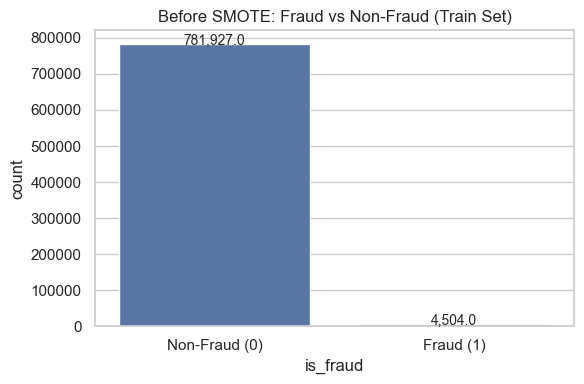


[INFO] Shape of X_train_enc AFTER SMOTE: (1563854, 13)
Class distribution in y_train AFTER SMOTE: [781927 781927]


/var/folders/z9/cvzm0bkn2gv0qywmh29rgvrr0000gn/T/ipykernel_11041/626972441.py:135: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Non-Fraud (0)", "Fraud (1)"])


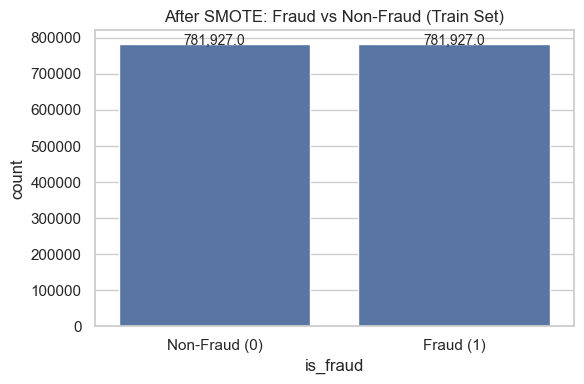


[DEBUG] We have 13 total features after encoding.

[DEBUG] Starting RFE fit... (this may take a while)
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.

=== MODEL PERFORMANCE (XGBoost + SMOTE + RFE) [TEST] ===
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    260642
           1       0.85      0.85      0.85      1502

    accuracy                           1.00    262144
   macro avg       0.92      0.92      0.92    262144
weighted avg       1.00      1.00      1.00    262144

Confusion Matrix:
 [[260412    230]
 [   226   1276]]

=== MODEL PERFORMANCE (XGBoost) [TRAIN] ===
Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    781927
           1       1.00      1.00      1.00    781927

    accuracy                           1.00   1563854
   macro avg       1.00      1

In [45]:
# -----------------------------------------------------------
# 1) IMPORTS & SETUP
# -----------------------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn / ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix

# XGBoost (CPU-based)
import xgboost as xgb

# Advanced encoding for high-cardinality or single-col cat
from category_encoders import TargetEncoder

# For synthetic sampling (SMOTE)
from imblearn.over_sampling import SMOTE

# Optional progress bar
from tqdm import tqdm

# -----------------------------------------------------------
# 2) DROP USELESS COLUMNS & DEFINE FEATURES
# -----------------------------------------------------------
"""
We keep:
   category, amt, gender, city, state, city_pop, job, is_fraud,
   age, year, month, hour, day_of_week, distance_km, amt_bin, dist_bin, citypop_bin
Drop duplicates, IDs, etc., if not already done.
"""

useful_cols = [
    "category", "amt", "gender", "city", "state", "city_pop", "job",
    "is_fraud", "age", "year", "month", "hour", "day_of_week", 
    "distance_km", "amt_bin", "dist_bin", "citypop_bin"
]

df_clean = df[useful_cols].copy()
df_clean.dropna(inplace=True)

# X, y
X = df_clean.drop(columns=["is_fraud"])
y = df_clean["is_fraud"].astype(int)

print("Initial shape of X:", X.shape)
print("Initial shape of y:", y.shape)
print("Class distribution:\n", y.value_counts(normalize=True) * 100, "%")

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("\nTraining set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)
print("Train set class distribution:\n", y_train.value_counts(normalize=True)*100, "%")
print("Test set class distribution:\n", y_test.value_counts(normalize=True)*100, "%")

# -----------------------------------------------------------
# 3) DEFINE COLUMN GROUPS FOR ENCODING
# -----------------------------------------------------------
numeric_features = [
    "amt", "distance_km", "age", "city_pop", 
    "year", "month", "hour", "day_of_week"
]

cat_small = ["gender"]  # one-hot
cat_high = ["city", "state", "job", "category"]  # target encode

# -----------------------------------------------------------
# 4) BUILD COLUMNTRANSFORMER
# -----------------------------------------------------------
from sklearn.pipeline import make_pipeline

numeric_transformer = Pipeline([
    ("scaler", StandardScaler())
])

ohe_transformer = Pipeline([
    ("ohe", OneHotEncoder(drop='first', handle_unknown='ignore'))
])

target_encoder = Pipeline([
    ("target_enc", TargetEncoder(smoothing=0.3))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("ohe", ohe_transformer, cat_small),
        ("te", target_encoder, cat_high),
    ],
    remainder="drop"
)

# -----------------------------------------------------------
# 5) TRANSFORM + SMOTE
# -----------------------------------------------------------
X_train_enc = preprocessor.fit_transform(X_train, y_train)
X_test_enc  = preprocessor.transform(X_test)

print("\n[INFO] Shape of X_train_enc BEFORE SMOTE:", X_train_enc.shape)
print("Class distribution in y_train BEFORE SMOTE:", np.bincount(y_train))

# Make a quick bar chart of Fraud vs Non-Fraud in y_train
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x=y_train, ax=ax)
ax.set_title("Before SMOTE: Fraud vs Non-Fraud (Train Set)")
ax.set_xticklabels(["Non-Fraud (0)", "Fraud (1)"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+50, f"{height:,}", 
            ha="center", fontsize=10)
plt.tight_layout()
plt.show()

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_enc, y_train)

print("\n[INFO] Shape of X_train_enc AFTER SMOTE:", X_train_sm.shape)
print("Class distribution in y_train AFTER SMOTE:", np.bincount(y_train_sm))

# Plot new distribution
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x=y_train_sm, ax=ax)
ax.set_title("After SMOTE: Fraud vs Non-Fraud (Train Set)")
ax.set_xticklabels(["Non-Fraud (0)", "Fraud (1)"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+50, f"{height:,}", 
            ha="center", fontsize=10)
plt.tight_layout()
plt.show()

# Reconstruct final column names
from sklearn.preprocessing import OneHotEncoder
ohe_step = preprocessor.named_transformers_['ohe'].named_steps['ohe']
ohe_feature_names = ohe_step.get_feature_names_out(cat_small)
te_cols = ["city_te", "state_te", "job_te", "category_te"]
final_feature_names = numeric_features + list(ohe_feature_names) + te_cols
print("\n[DEBUG] We have", len(final_feature_names), "total features after encoding.")

# -----------------------------------------------------------
# 6) RFE + XGBoost
# -----------------------------------------------------------
xgb_clf = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    verbosity=1,
    tree_method='hist'
)

rfe = RFE(estimator=xgb_clf, n_features_to_select=10, step=1, verbose=1)
print("\n[DEBUG] Starting RFE fit... (this may take a while)")
rfe.fit(X_train_sm, y_train_sm)

X_train_sel = rfe.transform(X_train_sm)
X_test_sel  = rfe.transform(X_test_enc)

final_xgb = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    verbosity=1,
    tree_method='hist'
)
final_xgb.fit(X_train_sel, y_train_sm)

# -----------------------------------------------------------
# 7) EVALUATE: TEST SET
# -----------------------------------------------------------
y_pred = final_xgb.predict(X_test_sel)
print("\n=== MODEL PERFORMANCE (XGBoost + SMOTE + RFE) [TEST] ===")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -----------------------------------------------------------
# 8) OVERFITTING CHECK: TRAIN PERFORMANCE
# -----------------------------------------------------------
# Compare how the model does on the (transformed) SMOTE train data
train_pred = final_xgb.predict(X_train_sel)
print("\n=== MODEL PERFORMANCE (XGBoost) [TRAIN] ===")
print("Classification Report (Train):\n", classification_report(y_train_sm, train_pred))
print("Confusion Matrix (Train):\n", confusion_matrix(y_train_sm, train_pred))

# If train performance >> test performance, it may indicate overfitting.

# -----------------------------------------------------------
# 9) CHECK SELECTED FEATURES
# -----------------------------------------------------------
support_mask = rfe.support_
ranking = rfe.ranking_
print("\n[DEBUG] Feature Importance and RFE Results:")
for i, feat_name in enumerate(final_feature_names):
    print(f"{i}: {feat_name} | Support={support_mask[i]}, Rank={ranking[i]}")

selected_features = [f for f, s in zip(final_feature_names, support_mask) if s]
print("\n=== SELECTED FEATURES by RFE ===")
for feat in selected_features:
    print("   -", feat)

print("\n[INFO] Done! Overfitting check: compare train vs test performance. SMOTE effect: see bar charts.")


# (Optional) you can also produce a learning curve or 
# cross-validation approach for an even better measure of overfitting.


In [46]:
# -----------------------------------------------------------
# 1) IMPORTS & SETUP
# -----------------------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn imports
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# RFECV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

# For advanced encoding (high-card cat)
# pip install category_encoders
from category_encoders import TargetEncoder

# For synthetic sampling
# pip install imblearn
from imblearn.over_sampling import SMOTE

# For progress bar (optional)
from tqdm import tqdm

# Set plot style
sns.set_style("whitegrid")

# -----------------------------------------------------------
# 2) LOAD & PREP DATA
# -----------------------------------------------------------
"""
We'll assume you have a DataFrame 'df' with columns:
  'category','amt','gender','city','state','city_pop','job',
  'is_fraud','age','year','month','hour','day_of_week','distance_km'
If your dataset has more/less columns, adjust accordingly.
"""

# Example:
# df = pd.read_csv("fraudTrain.csv")  # or however you load it

print("Initial shape:", df.shape)
print("Columns:", df.columns.tolist())

# Drop rows with critical missing data
df.dropna(subset=[
    'category','amt','gender','city','state','city_pop','job',
    'is_fraud','age','year','month','hour','day_of_week','distance_km'
], inplace=True)

# X, y
X = df.drop(columns=['is_fraud'])
y = df['is_fraud'].astype(int)

print("\nAfter dropping NA, shape:", X.shape)
print("Target distribution:\n", y.value_counts(normalize=True)*100, "%")

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("\nTrain shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train target distribution:\n", y_train.value_counts(normalize=True)*100, "%")

# -----------------------------------------------------------
# 3) COLUMN GROUPS (NUMERIC vs CAT)
# -----------------------------------------------------------
numeric_features = ['amt','distance_km','age','city_pop','year','month','hour','day_of_week']
cat_small = ['gender']   # one-hot
cat_high  = ['city','state','job','category']  # target-encode

# -----------------------------------------------------------
# 4) COLUMNTRANSFORMER FOR PREPROCESSING
# -----------------------------------------------------------
from sklearn.pipeline import make_pipeline

numeric_transformer = Pipeline([
    ("scaler", StandardScaler())
])

ohe_transformer = Pipeline([
    ("ohe", OneHotEncoder(drop='first', handle_unknown='ignore'))
])

target_encoder = Pipeline([
    ("target_enc", TargetEncoder(smoothing=0.3))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("ohe", ohe_transformer, cat_small),
        ("te", target_encoder, cat_high),
    ],
    remainder='drop'
)

# -----------------------------------------------------------
# 5) ENCODE & SMOTE
# -----------------------------------------------------------
X_train_enc = preprocessor.fit_transform(X_train, y_train)
X_test_enc  = preprocessor.transform(X_test)

print("\nBefore SMOTE, X_train_enc shape:", X_train_enc.shape)
print("Class dist in y_train:", np.bincount(y_train))

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_enc, y_train)
print("\nAfter SMOTE, shape:", X_train_sm.shape)
print("Class dist in y_train_sm:", np.bincount(y_train_sm))

# Build final feature name list
ohe_step = preprocessor.named_transformers_['ohe'].named_steps['ohe']
ohe_features = ohe_step.get_feature_names_out(cat_small)
te_features  = [f"{c}_te" for c in cat_high]
final_features = numeric_features + list(ohe_features) + te_features
print("\n[DEBUG] Final Feature List:", final_features)

# -----------------------------------------------------------
# 6) RFECV with LogisticRegression
# -----------------------------------------------------------
# 6.1 Create the estimator
logreg_clf = LogisticRegression(
    solver='lbfgs', 
    max_iter=1000, 
    random_state=42
)

# 6.2 Define RFECV
# We'll do 3-fold cross-validation. Feel free to set cv=5 or cv=StratifiedKFold(...)
# step=1 removes 1 feature at a time
# scoring='accuracy' or you can pick 'f1' for the minority class if desired
rfecv = RFECV(
    estimator=logreg_clf,
    step=1,
    cv=3, 
    scoring='accuracy', 
    verbose=1,
    min_features_to_select=10  # ensures we keep at least 5 features
)

print("\n[DEBUG] Starting RFECV fit... may take a while.")
rfecv.fit(X_train_sm, y_train_sm)
print("Optimal number of features:", rfecv.n_features_)
print("RFECV support mask:", rfecv.support_)
print("Feature Ranking:", rfecv.ranking_)

# 6.3 Subset features
X_train_sel = rfecv.transform(X_train_sm)
X_test_sel  = rfecv.transform(X_test_enc)

# 6.4 Retrain final logistic model on selected features
final_logreg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
final_logreg.fit(X_train_sel, y_train_sm)

# Evaluate on test
y_pred = final_logreg.predict(X_test_sel)
acc = accuracy_score(y_test, y_pred)
print("\n=== LOGREG + RFECV (Best Subset) ===")
print(f"Accuracy on Test: {acc:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -----------------------------------------------------------
# 7) SELECTED FEATURES
# -----------------------------------------------------------
sel_mask = rfecv.support_
ranking  = rfecv.ranking_
print("\nSelected Feature Indices:", np.where(sel_mask)[0].tolist())

selected_feats = [f for f, s in zip(final_features, sel_mask) if s]
print("\n=== SELECTED FEATURES ===")
for feat in selected_feats:
    print("  -", feat)

print("\nFeature Ranking (1 = best):")
for idx, (name, rank) in enumerate(zip(final_features, ranking)):
    print(f"{idx}. {name} => {rank}")

# Optional: Overfitting check—compare train vs test
train_pred = final_logreg.predict(X_train_sel)
print("\n=== TRAIN PERFORMANCE ===")
print("Accuracy (Train):", accuracy_score(y_train_sm, train_pred))
print("Classification Report (Train):\n", classification_report(y_train_sm, train_pred))

print("\n[INFO] Done! We used RFECV + LogisticRegression to select features with cross-validation.")


Initial shape: (1048575, 29)
Columns: ['cc_num', 'merchant', 'category', 'amt', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'age', 'year', 'month', 'hour', 'day_of_week', 'age_group', 'distance_km', 'amt_bin', 'dist_bin', 'citypop_bin', 'is_fraud_str']

After dropping NA, shape: (1048575, 28)
Target distribution:
 is_fraud
0   99.42722
1    0.57278
Name: proportion, dtype: float64 %

Train shape: (786431, 28) Test shape: (262144, 28)
Train target distribution:
 is_fraud
0   99.42729
1    0.57271
Name: proportion, dtype: float64 %

Before SMOTE, X_train_enc shape: (786431, 13)
Class dist in y_train: [781927   4504]

After SMOTE, shape: (1563854, 13)
Class dist in y_train_sm: [781927 781927]

[DEBUG] Final Feature List: ['amt', 'distance_km', 'age', 'city_pop', 'year', 'month', 'hour', 'day_of_week', 'gender_M', 'city_te', 'state_te', 'job_te', 'category_te']

[DEBUG] Starting RFECV fit... 

FEATURE SELECTION AND EMBEDED MACHINE LEARNING CLASSIFICATION

Using RFE SMOTE XGBOOST - Train Test Split

In [46]:
# -----------------------------------------------------------
# 1) IMPORTS & SETUP
# -----------------------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn / ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix

# XGBoost (CPU-based)
import xgboost as xgb

# Advanced encoding for high-cardinality or single-col cat
from category_encoders import TargetEncoder

# For synthetic sampling (SMOTE)
from imblearn.over_sampling import SMOTE

# Optional progress bar
from tqdm import tqdm

In [47]:
# -----------------------------------------------------------
# 2) DROP USELESS COLUMNS & DEFINE FEATURES
# -----------------------------------------------------------
"""
We keep:
   category, amt, gender, city, state, city_pop, job, is_fraud,
   age, year, month, hour, day_of_week, distance_km, amt_bin, dist_bin, citypop_bin
Drop duplicates, IDs, etc., if not already done.
"""

useful_cols = [
    "category", "amt", "gender", "city", "state", "city_pop", "job",
    "is_fraud", "age", "year", "month", "hour", "day_of_week", 
    "distance_km", "amt_bin", "dist_bin", "citypop_bin"
]

df_clean = df[useful_cols].copy()
df_clean.dropna(inplace=True)

# X, y
X = df_clean.drop(columns=["is_fraud"])
y = df_clean["is_fraud"].astype(int)

print("Initial shape of X:", X.shape)
print("Initial shape of y:", y.shape)
print("Class distribution:\n", y.value_counts(normalize=True) * 100, "%")

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("\nTraining set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)
print("Train set class distribution:\n", y_train.value_counts(normalize=True)*100, "%")
print("Test set class distribution:\n", y_test.value_counts(normalize=True)*100, "%")

Initial shape of X: (1048575, 16)
Initial shape of y: (1048575,)
Class distribution:
 is_fraud
0   99.42722
1    0.57278
Name: proportion, dtype: float64 %

Training set shape: (786431, 16) (786431,)
Test set shape: (262144, 16) (262144,)
Train set class distribution:
 is_fraud
0   99.42729
1    0.57271
Name: proportion, dtype: float64 %
Test set class distribution:
 is_fraud
0   99.42703
1    0.57297
Name: proportion, dtype: float64 %


In [48]:

# -----------------------------------------------------------
# 3) DEFINE COLUMN GROUPS FOR ENCODING
# -----------------------------------------------------------
numeric_features = [
    "amt", "distance_km", "age", "city_pop", 
    "year", "month", "hour", "day_of_week"
]

cat_small = ["gender"]  # one-hot
cat_high = ["city", "state", "job", "category"]  # target encode

In [49]:
# -----------------------------------------------------------
# 4) BUILD COLUMNTRANSFORMER
# -----------------------------------------------------------
from sklearn.pipeline import make_pipeline

numeric_transformer = Pipeline([
    ("scaler", StandardScaler())
])

ohe_transformer = Pipeline([
    ("ohe", OneHotEncoder(drop='first', handle_unknown='ignore'))
])

target_encoder = Pipeline([
    ("target_enc", TargetEncoder(smoothing=0.3))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("ohe", ohe_transformer, cat_small),
        ("te", target_encoder, cat_high),
    ],
    remainder="drop"
)


[INFO] Shape of X_train_enc BEFORE SMOTE: (786431, 13)
Class distribution in y_train BEFORE SMOTE: [781927   4504]


/var/folders/z9/cvzm0bkn2gv0qywmh29rgvrr0000gn/T/ipykernel_28002/2829529976.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Non-Fraud (0)", "Fraud (1)"])


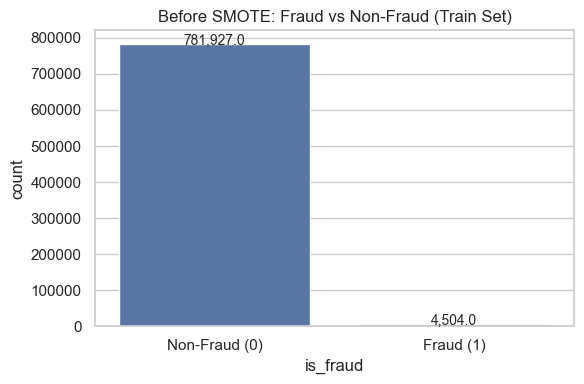


[INFO] Shape of X_train_enc AFTER SMOTE: (1563854, 13)
Class distribution in y_train AFTER SMOTE: [781927 781927]


/var/folders/z9/cvzm0bkn2gv0qywmh29rgvrr0000gn/T/ipykernel_28002/2829529976.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Non-Fraud (0)", "Fraud (1)"])


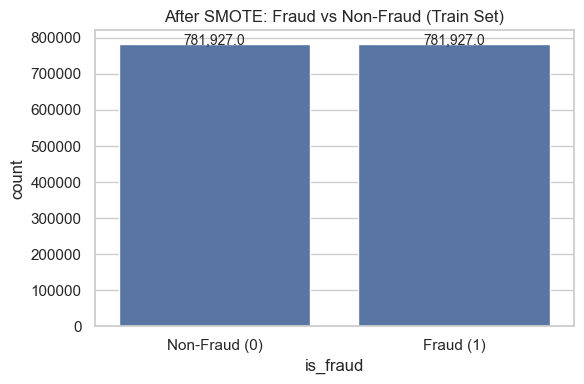


[DEBUG] We have 13 total features after encoding.


In [50]:

# -----------------------------------------------------------
# 5) TRANSFORM + SMOTE
# -----------------------------------------------------------
X_train_enc = preprocessor.fit_transform(X_train, y_train)
X_test_enc  = preprocessor.transform(X_test)

print("\n[INFO] Shape of X_train_enc BEFORE SMOTE:", X_train_enc.shape)
print("Class distribution in y_train BEFORE SMOTE:", np.bincount(y_train))

# Make a quick bar chart of Fraud vs Non-Fraud in y_train
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x=y_train, ax=ax)
ax.set_title("Before SMOTE: Fraud vs Non-Fraud (Train Set)")
ax.set_xticklabels(["Non-Fraud (0)", "Fraud (1)"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+50, f"{height:,}", 
            ha="center", fontsize=10)
plt.tight_layout()
plt.show()

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_enc, y_train)

print("\n[INFO] Shape of X_train_enc AFTER SMOTE:", X_train_sm.shape)
print("Class distribution in y_train AFTER SMOTE:", np.bincount(y_train_sm))

# Plot new distribution
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x=y_train_sm, ax=ax)
ax.set_title("After SMOTE: Fraud vs Non-Fraud (Train Set)")
ax.set_xticklabels(["Non-Fraud (0)", "Fraud (1)"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+50, f"{height:,}", 
            ha="center", fontsize=10)
plt.tight_layout()
plt.show()

# Reconstruct final column names
from sklearn.preprocessing import OneHotEncoder
ohe_step = preprocessor.named_transformers_['ohe'].named_steps['ohe']
ohe_feature_names = ohe_step.get_feature_names_out(cat_small)
te_cols = ["city_te", "state_te", "job_te", "category_te"]
final_feature_names = numeric_features + list(ohe_feature_names) + te_cols
print("\n[DEBUG] We have", len(final_feature_names), "total features after encoding.")

In [45]:
# -----------------------------------------------------------
# 6) FEATURE SELECTION (RFE) USING XGBoost
# -----------------------------------------------------------
from sklearn.metrics import accuracy_score

xgb_clf = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    verbosity=1,
    tree_method='hist'
)

rfe = RFE(
    estimator=xgb_clf,
    n_features_to_select=10,
    step=1,
    verbose=1
)

print("\n[DEBUG] Starting RFE fit... (this may take a while)")
rfe.fit(X_train_sm, y_train_sm)

# -----------------------------------------------------------
# 7) PRINT SELECTED FEATURES
# -----------------------------------------------------------
support_mask = rfe.support_
ranking = rfe.ranking_
print("\n[DEBUG] RFE Feature Ranking Results:")
for i, feat_name in enumerate(final_feature_names):
    print(f"{i}: {feat_name} | Support={support_mask[i]}, Rank={ranking[i]}")

selected_features = [f for f, s in zip(final_feature_names, support_mask) if s]
print("\n=== SELECTED FEATURES by RFE ===")
for feat in selected_features:
    print("   -", feat)

# Transform the data to keep only selected features
X_train_sel = rfe.transform(X_train_sm)
X_test_sel  = rfe.transform(X_test_enc)

# -----------------------------------------------------------
# 8) TRAIN FINAL XGBOOST MODEL ON SELECTED FEATURES
# -----------------------------------------------------------
final_xgb = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    verbosity=1,
    tree_method='hist'
)

print("\n[DEBUG] Training final XGBoost on selected features...")
final_xgb.fit(X_train_sel, y_train_sm)

# -----------------------------------------------------------
# 9) EVALUATE ON TEST SET
# -----------------------------------------------------------
y_pred = final_xgb.predict(X_test_sel)
print("\n=== MODEL PERFORMANCE (XGBoost + SMOTE + RFE) [TEST] ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -----------------------------------------------------------
# 10) OVERFITTING CHECK: TRAIN PERFORMANCE
# -----------------------------------------------------------
train_pred = final_xgb.predict(X_train_sel)
print("\n=== MODEL PERFORMANCE (XGBoost) [TRAIN] ===")
print("Accuracy (Train):", accuracy_score(y_train_sm, train_pred))
print("Classification Report (Train):\n", classification_report(y_train_sm, train_pred))
print("Confusion Matrix (Train):\n", confusion_matrix(y_train_sm, train_pred))

print("\n[INFO] Done! RFE selected features are printed first, then final XGBoost is trained and evaluated.")



[DEBUG] Starting RFE fit... (this may take a while)
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.

[DEBUG] RFE Feature Ranking Results:
0: amt | Support=True, Rank=1
1: distance_km | Support=False, Rank=4
2: age | Support=True, Rank=1
3: city_pop | Support=False, Rank=2
4: year | Support=False, Rank=3
5: month | Support=True, Rank=1
6: hour | Support=True, Rank=1
7: day_of_week | Support=True, Rank=1
8: gender_M | Support=True, Rank=1
9: city_te | Support=True, Rank=1
10: state_te | Support=True, Rank=1
11: job_te | Support=True, Rank=1
12: category_te | Support=True, Rank=1

=== SELECTED FEATURES by RFE ===
   - amt
   - age
   - month
   - hour
   - day_of_week
   - gender_M
   - city_te
   - state_te
   - job_te
   - category_te

[DEBUG] Training final XGBoost on selected features...

=== MODEL PERFORMANCE (XGBoost + SMOTE + RFE) [TEST] ===
Accuracy: 0.998260498046875
Classification Report:
               precision    re

Code using RFE SMOTE and XGBOOST - TRAIN TEST VALID SPLIT 

Initial shape of X: (1048575, 13)
Initial shape of y: (1048575,)
Class distribution:
 is_fraud
0   99.42722
1    0.57278
Name: proportion, dtype: float64 %

=== FINAL SPLITS ===
Train shape: (838860, 13) (838860,)
Validation shape: (104857, 13) (104857,)
Test shape: (104858, 13) (104858,)

Train class distribution:
 is_fraud
0   99.42720
1    0.57280
Name: proportion, dtype: float64 %
Val class distribution:
 is_fraud
0   99.42779
1    0.57221
Name: proportion, dtype: float64 %
Test class distribution:
 is_fraud
0   99.42684
1    0.57316
Name: proportion, dtype: float64 %

[INFO] Shape of X_train_enc BEFORE SMOTE: (838860, 13)
Class distribution in y_train_temp BEFORE SMOTE: [834055   4805]

[INFO] Shape of X_train_enc AFTER SMOTE: (1668110, 13)
Class distribution in y_train_sm AFTER SMOTE: [834055 834055]

[DEBUG] Final Encoded Feature List (Train/Val/Test share):
['amt', 'distance_km', 'age', 'city_pop', 'year', 'month', 'hour', 'day_of_week', 'gender_M', 'city_te', 'state_te', 'job_

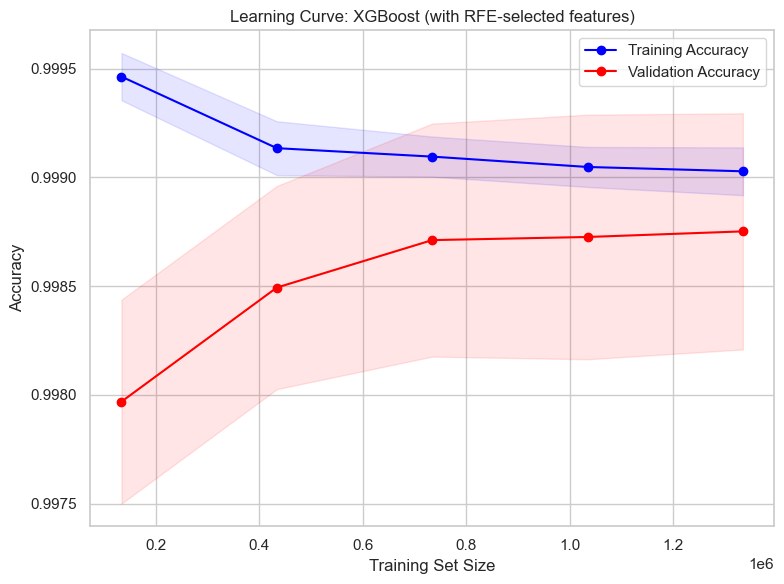


[INFO] Done! Code now prints in the order: Train -> Val -> (Conditionally) Test, plus learning curve.


In [54]:
# -----------------------------------------------------------
# 1) IMPORTS & SETUP
# -----------------------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn / ML
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# XGBoost (CPU-based)
import xgboost as xgb

# Advanced encoding for high-cardinality or single-col cat
from category_encoders import TargetEncoder

# For synthetic sampling (SMOTE)
from imblearn.over_sampling import SMOTE

# Optional progress bar
from tqdm import tqdm

sns.set_style("whitegrid")

# -----------------------------------------------------------
# 2) LOAD DATA & SPLIT INTO TRAIN/VALIDATION/TEST
# -----------------------------------------------------------
"""
We assume your DataFrame is named 'df' with columns:

   'category','amt','gender','city','state','city_pop','job',
   'is_fraud','age','year','month','hour','day_of_week',
   'distance_km','amt_bin','dist_bin','citypop_bin'

Adjust if needed.
"""

useful_cols = [
    "category", "amt", "gender", "city", "state", "city_pop", "job",
    "is_fraud", "age", "year", "month", "hour", "day_of_week", 
    "distance_km"
]

df_clean = df[useful_cols].copy()
df_clean.dropna(inplace=True)

X = df_clean.drop(columns=["is_fraud"])
y = df_clean["is_fraud"].astype(int)

print("Initial shape of X:", X.shape)
print("Initial shape of y:", y.shape)
print("Class distribution:\n", y.value_counts(normalize=True)*100, "%")

# First split: 80% Train + 20% Temp
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Second split: 50% of Temp → Val, 50% of Temp → Test
# => 70% Train, 10% Validation, 20% Test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

print("\n=== FINAL SPLITS ===")
print("Train shape:", X_train_temp.shape, y_train_temp.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)

print("\nTrain class distribution:\n", y_train_temp.value_counts(normalize=True)*100, "%")
print("Val class distribution:\n", y_val.value_counts(normalize=True)*100, "%")
print("Test class distribution:\n", y_test.value_counts(normalize=True)*100, "%")

# -----------------------------------------------------------
# 3) COLUMN GROUPS FOR ENCODING
# -----------------------------------------------------------
numeric_features = [
    "amt", "distance_km", "age", "city_pop", 
    "year", "month", "hour", "day_of_week"
]
cat_small = ["gender"]             # one-hot
cat_high  = ["city","state","job","category"]  # target-encode

# -----------------------------------------------------------
# 4) COLUMNTRANSFORMER (SCALING + ENCODING)
# -----------------------------------------------------------
from sklearn.pipeline import make_pipeline

numeric_transformer = Pipeline([
    ("scaler", StandardScaler())
])

ohe_transformer = Pipeline([
    ("ohe", OneHotEncoder(drop='first', handle_unknown='ignore'))
])

target_encoder = Pipeline([
    ("target_enc", TargetEncoder(smoothing=0.3))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("ohe", ohe_transformer, cat_small),
        ("te", target_encoder, cat_high),
    ],
    remainder="drop"
)

# -----------------------------------------------------------
# 5) FIT PREPROCESSOR & APPLY SMOTE (TRAIN ONLY)
# -----------------------------------------------------------
X_train_enc = preprocessor.fit_transform(X_train_temp, y_train_temp)
print("\n[INFO] Shape of X_train_enc BEFORE SMOTE:", X_train_enc.shape)
print("Class distribution in y_train_temp BEFORE SMOTE:", np.bincount(y_train_temp))

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_enc, y_train_temp)

print("\n[INFO] Shape of X_train_enc AFTER SMOTE:", X_train_sm.shape)
print("Class distribution in y_train_sm AFTER SMOTE:", np.bincount(y_train_sm))

# -----------------------------------------------------------
# 6) ENCODE VAL & TEST WITHOUT REFITTING PREPROCESSOR
# -----------------------------------------------------------
X_val_enc  = preprocessor.transform(X_val)
X_test_enc = preprocessor.transform(X_test)

# Build final feature name list
ohe_step = preprocessor.named_transformers_['ohe'].named_steps['ohe']
ohe_feature_names = ohe_step.get_feature_names_out(cat_small)
te_cols = [f"{col}_te" for col in cat_high]
final_feature_names = numeric_features + list(ohe_feature_names) + te_cols

print("\n[DEBUG] Final Encoded Feature List (Train/Val/Test share):")
print(final_feature_names)

# -----------------------------------------------------------
# 7) RFE USING XGBoost ON TRAIN
# -----------------------------------------------------------
xgb_clf = xgboost_model = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    verbosity=1,
    tree_method='hist'
)

rfe = RFE(
    estimator=xgb_clf,
    n_features_to_select=10,
    step=1,
    verbose=1
)

print("\n[DEBUG] Starting RFE fit on TRAIN ONLY... (this may take a while)")
rfe.fit(X_train_sm, y_train_sm)

support_mask = rfe.support_
ranking = rfe.ranking_

print("\n[DEBUG] RFE Feature Ranking Results:")
for i, feat_name in enumerate(final_feature_names):
    print(f"{i}: {feat_name} | Support={support_mask[i]}, Rank={ranking[i]}")

selected_features = [f for f, s in zip(final_feature_names, support_mask) if s]
print("\n=== SELECTED FEATURES by RFE ===")
for feat in selected_features:
    print("   -", feat)

X_train_sel = rfe.transform(X_train_sm)
X_val_sel   = rfe.transform(X_val_enc)
X_test_sel  = rfe.transform(X_test_enc)

# -----------------------------------------------------------
# 8) TRAIN FINAL XGBOOST ON SELECTED FEATURES (TRAIN ONLY)
# -----------------------------------------------------------
final_xgb = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    verbosity=1,
    tree_method='hist'
)

print("\n[DEBUG] Training final XGBoost on selected features (TRAIN ONLY)...")
final_xgb.fit(X_train_sel, y_train_sm)

# -----------------------------------------------------------
# 9) EVALUATE ON TRAIN SET FIRST (OVERFITTING CHECK)
# -----------------------------------------------------------
train_pred = final_xgb.predict(X_train_sel)
train_acc  = accuracy_score(y_train_sm, train_pred)

print("\n=== MODEL PERFORMANCE ON TRAIN SET (WITH SMOTE) ===")
print("Accuracy (Train):", train_acc)
print("Classification Report (Train):\n", classification_report(y_train_sm, train_pred))
print("Confusion Matrix (Train):\n", confusion_matrix(y_train_sm, train_pred))

# -----------------------------------------------------------
# 10) EVALUATE ON VALIDATION SET
# -----------------------------------------------------------
y_val_pred = final_xgb.predict(X_val_sel)
val_acc = accuracy_score(y_val, y_val_pred)

print("\n=== MODEL PERFORMANCE ON VALIDATION SET ===")
print("Accuracy (Val):", val_acc)
print("Classification Report (Val):\n", classification_report(y_val, y_val_pred))
print("Confusion Matrix (Val):\n", confusion_matrix(y_val, y_val_pred))

# Decide if we want to proceed to the test set:
VAL_THRESHOLD = 0.99  # Example threshold. Adjust as needed.

if val_acc < VAL_THRESHOLD:
    print(f"\n[WARNING] Validation Accuracy {val_acc:.4f} < {VAL_THRESHOLD}.")
    print("We are NOT satisfied. You may want to tweak hyperparameters, features, etc.")
    print("Skipping test evaluation for now.\n")
else:
    # -----------------------------------------------------------
    # 11) EVALUATE ON TEST SET IF VALIDATION IS GOOD
    # -----------------------------------------------------------
    y_test_pred = final_xgb.predict(X_test_sel)
    test_acc = accuracy_score(y_test, y_test_pred)
    print("\n=== MODEL PERFORMANCE ON TEST SET ===")
    print("Accuracy (Test):", test_acc)
    print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))
    print("Confusion Matrix (Test):\n", confusion_matrix(y_test, y_test_pred))

# -----------------------------------------------------------
# 12) OPTIONAL: PLOT LEARNING CURVE
# -----------------------------------------------------------
from sklearn.model_selection import learning_curve

# We run the curve on the final_xgb model and the selected training data
train_sizes, train_scores, val_scores = learning_curve(
    final_xgb,
    X_train_sel,
    y_train_sm,
    cv=5,              # e.g. 5-fold CV
    n_jobs=-1,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5),
    shuffle=True,
    random_state=42
)

train_means = np.mean(train_scores, axis=1)
train_stds  = np.std(train_scores, axis=1)
val_means   = np.mean(val_scores, axis=1)
val_stds    = np.std(val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_means, 'o-', color='blue', label='Training Accuracy')
plt.fill_between(train_sizes, train_means - train_stds, train_means + train_stds,
                 alpha=0.1, color='blue')

plt.plot(train_sizes, val_means, 'o-', color='red', label='Validation Accuracy')
plt.fill_between(train_sizes, val_means - val_stds, val_means + val_stds,
                 alpha=0.1, color='red')

plt.title('Learning Curve: XGBoost (with RFE-selected features)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

print("\n[INFO] Done! Code now prints in the order: Train -> Val -> (Conditionally) Test, plus learning curve.")


Another Method: using SelectKBest instead of RFE.

In [49]:
# -----------------------------------------------------------
# 1) IMPORTS & SETUP
# -----------------------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn / ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# XGBoost (CPU-based)
import xgboost as xgb

# Advanced encoding for high-cardinality or single-col cat
from category_encoders import TargetEncoder

# For synthetic sampling (SMOTE)
from imblearn.over_sampling import SMOTE

# Optional progress bar
from tqdm import tqdm

sns.set_style("whitegrid")

# -----------------------------------------------------------
# 2) LOAD DATA & SPLIT INTO TRAIN/VALIDATION/TEST
# -----------------------------------------------------------
"""
We assume your DataFrame is named 'df' with columns:

   'category','amt','gender','city','state','city_pop','job',
   'is_fraud','age','year','month','hour','day_of_week',
   'distance_km'

Adjust if needed.
"""

useful_cols = [
    "category", "amt", "gender", "city", "state", "city_pop", "job",
    "is_fraud", "age", "year", "month", "hour", "day_of_week", 
    "distance_km"
]

df_clean = df[useful_cols].copy()
df_clean.dropna(inplace=True)

X = df_clean.drop(columns=["is_fraud"])
y = df_clean["is_fraud"].astype(int)

print("Initial shape of X:", X.shape)
print("Initial shape of y:", y.shape)
print("Class distribution:\n", y.value_counts(normalize=True)*100, "%")

# First split: 80% Train + 20% Temp
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Second split: 50% of Temp → Val, 50% of Temp → Test
# So each is 10% of overall data => 70%/10%/20% total
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,  # half of the 20%
    random_state=42,
    stratify=y_temp
)

print("\n=== FINAL SPLITS ===")
print("Train shape:", X_train_temp.shape, y_train_temp.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)

print("\nTrain class distribution:\n", y_train_temp.value_counts(normalize=True)*100, "%")
print("Val class distribution:\n", y_val.value_counts(normalize=True)*100, "%")
print("Test class distribution:\n", y_test.value_counts(normalize=True)*100, "%")


# -----------------------------------------------------------
# 3) COLUMN GROUPS FOR ENCODING
# -----------------------------------------------------------
numeric_features = [
    "amt", "distance_km", "age", "city_pop", 
    "year", "month", "hour", "day_of_week"
]
cat_small = ["gender"]            # one-hot
cat_high  = ["city","state","job","category"]  # target encode

# -----------------------------------------------------------
# 4) COLUMNTRANSFORMER (SCALING + ENCODING)
# -----------------------------------------------------------
from sklearn.pipeline import make_pipeline

numeric_transformer = Pipeline([
    ("scaler", StandardScaler())
])

ohe_transformer = Pipeline([
    ("ohe", OneHotEncoder(drop='first', handle_unknown='ignore'))
])

target_encoder = Pipeline([
    ("target_enc", TargetEncoder(smoothing=0.3))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("ohe", ohe_transformer, cat_small),
        ("te", target_encoder, cat_high),
    ],
    remainder="drop"
)

# -----------------------------------------------------------
# 5) FIT PREPROCESSOR & APPLY SMOTE (TRAIN ONLY)
# -----------------------------------------------------------
X_train_enc = preprocessor.fit_transform(X_train_temp, y_train_temp)
print("\n[INFO] Shape of X_train_enc BEFORE SMOTE:", X_train_enc.shape)
print("Class distribution in y_train_temp BEFORE SMOTE:", np.bincount(y_train_temp))

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_enc, y_train_temp)

print("\n[INFO] Shape of X_train_enc AFTER SMOTE:", X_train_sm.shape)
print("Class distribution in y_train_sm AFTER SMOTE:", np.bincount(y_train_sm))

# -----------------------------------------------------------
# 6) ENCODE VAL & TEST WITHOUT REFITTING PREPROCESSOR
# -----------------------------------------------------------
X_val_enc  = preprocessor.transform(X_val)
X_test_enc = preprocessor.transform(X_test)

# Build final feature name list
from sklearn.preprocessing import OneHotEncoder
ohe_step = preprocessor.named_transformers_['ohe'].named_steps['ohe']
ohe_feature_names = ohe_step.get_feature_names_out(cat_small)
te_cols = [f"{col}_te" for col in cat_high]
final_feature_names = numeric_features + list(ohe_feature_names) + te_cols

print("\n[DEBUG] Final Encoded Feature List (Train/Val/Test share):")
print(final_feature_names)

# -----------------------------------------------------------
# 7) SELECTKBEST (ALTERNATIVE FEATURE SELECTION)
# -----------------------------------------------------------
from sklearn.feature_selection import SelectKBest, f_classif

k = 10  # number of top features to keep

kbest = SelectKBest(score_func=f_classif, k=k)
print(f"\n[DEBUG] Fitting SelectKBest with k={k} on TRAIN ONLY...")
kbest.fit(X_train_sm, y_train_sm)

# Show the feature scores
scores = kbest.scores_
pvalues = kbest.pvalues_

feature_scores = sorted(
    zip(final_feature_names, scores, pvalues),
    key=lambda x: x[1],  # sort by F-score descending
    reverse=True
)

print("\n=== SELECTED FEATURES by SelectKBest (scores, p-values) ===")
for name, score, pval in feature_scores[:k]:
    print(f"Feature={name}, F-score={score:.4f}, p-value={pval:.4e}")

# Transform train/val/test to keep only the selected features
X_train_sel = kbest.transform(X_train_sm)
X_val_sel   = kbest.transform(X_val_enc)
X_test_sel  = kbest.transform(X_test_enc)

# If you want the actual top feature names:
selected_mask = kbest.get_support()
selected_feature_names = np.array(final_feature_names)[selected_mask]
print("\n[INFO] Actual selected feature names:")
for f in selected_feature_names:
    print("   -", f)

# -----------------------------------------------------------
# 8) TRAIN FINAL XGBOOST ON SELECTED FEATURES (TRAIN ONLY)
# -----------------------------------------------------------
final_xgb = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    verbosity=1,
    tree_method='hist'
)

print("\n[DEBUG] Training final XGBoost on selected features (TRAIN ONLY)...")
final_xgb.fit(X_train_sel, y_train_sm)

# -----------------------------------------------------------
# 9) EVALUATE ON VALIDATION SET
# -----------------------------------------------------------
y_val_pred = final_xgb.predict(X_val_sel)
val_acc = accuracy_score(y_val, y_val_pred)
print("\n=== MODEL PERFORMANCE ON VALIDATION SET ===")
print("Accuracy (Val):", val_acc)
print("Classification Report (Val):\n", classification_report(y_val, y_val_pred))
print("Confusion Matrix (Val):\n", confusion_matrix(y_val, y_val_pred))

# -----------------------------------------------------------
# 10) IF SATISFIED WITH VAL, EVALUATE ON TEST SET
# -----------------------------------------------------------
y_test_pred = final_xgb.predict(X_test_sel)
test_acc = accuracy_score(y_test, y_test_pred)
print("\n=== MODEL PERFORMANCE ON TEST SET ===")
print("Accuracy (Test):", test_acc)
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test):\n", confusion_matrix(y_test, y_test_pred))

# -----------------------------------------------------------
# 11) OVERFITTING CHECK: TRAIN PERFORMANCE
# -----------------------------------------------------------
train_pred = final_xgb.predict(X_train_sel)
train_acc  = accuracy_score(y_train_sm, train_pred)

print("\n=== MODEL PERFORMANCE (XGBoost) [TRAIN + SMOTE] ===")
print("Accuracy (Train):", train_acc)
print("Classification Report (Train):\n", classification_report(y_train_sm, train_pred))
print("Confusion Matrix (Train):\n", confusion_matrix(y_train_sm, train_pred))

print("\n[INFO] Done! Now we have Train (with SMOTE), Validation, and Test sets, using SelectKBest instead of RFE.")


Initial shape of X: (1048575, 13)
Initial shape of y: (1048575,)
Class distribution:
 is_fraud
0   99.42722
1    0.57278
Name: proportion, dtype: float64 %

=== FINAL SPLITS ===
Train shape: (838860, 13) (838860,)
Validation shape: (104857, 13) (104857,)
Test shape: (104858, 13) (104858,)

Train class distribution:
 is_fraud
0   99.42720
1    0.57280
Name: proportion, dtype: float64 %
Val class distribution:
 is_fraud
0   99.42779
1    0.57221
Name: proportion, dtype: float64 %
Test class distribution:
 is_fraud
0   99.42684
1    0.57316
Name: proportion, dtype: float64 %

[INFO] Shape of X_train_enc BEFORE SMOTE: (838860, 13)
Class distribution in y_train_temp BEFORE SMOTE: [834055   4805]

[INFO] Shape of X_train_enc AFTER SMOTE: (1668110, 13)
Class distribution in y_train_sm AFTER SMOTE: [834055 834055]

[DEBUG] Final Encoded Feature List (Train/Val/Test share):
['amt', 'distance_km', 'age', 'city_pop', 'year', 'month', 'hour', 'day_of_week', 'gender_M', 'city_te', 'state_te', 'job_

Code with XGBoost and RandomForest Comparison:

Initial shape of X: (1048575, 13)
Initial shape of y: (1048575,)
Class distribution:
 is_fraud
0   99.42722
1    0.57278
Name: proportion, dtype: float64 %

=== FINAL SPLITS ===
Train shape: (838860, 13) (838860,)
Validation shape: (104857, 13) (104857,)
Test shape: (104858, 13) (104858,)

Train class distribution:
 is_fraud
0   99.42720
1    0.57280
Name: proportion, dtype: float64 %
Val class distribution:
 is_fraud
0   99.42779
1    0.57221
Name: proportion, dtype: float64 %
Test class distribution:
 is_fraud
0   99.42684
1    0.57316
Name: proportion, dtype: float64 %

[INFO] Shape of X_train_enc BEFORE SMOTE: (838860, 13)
Class distribution in y_train_temp BEFORE SMOTE: [834055   4805]

[INFO] Shape of X_train_enc AFTER SMOTE: (1668110, 13)
Class distribution in y_train_sm AFTER SMOTE: [834055 834055]

[DEBUG] Final Encoded Feature List (Train/Val/Test share):
['amt', 'distance_km', 'age', 'city_pop', 'year', 'month', 'hour', 'day_of_week', 'gender_M', 'city_te', 'state_te', 'job_

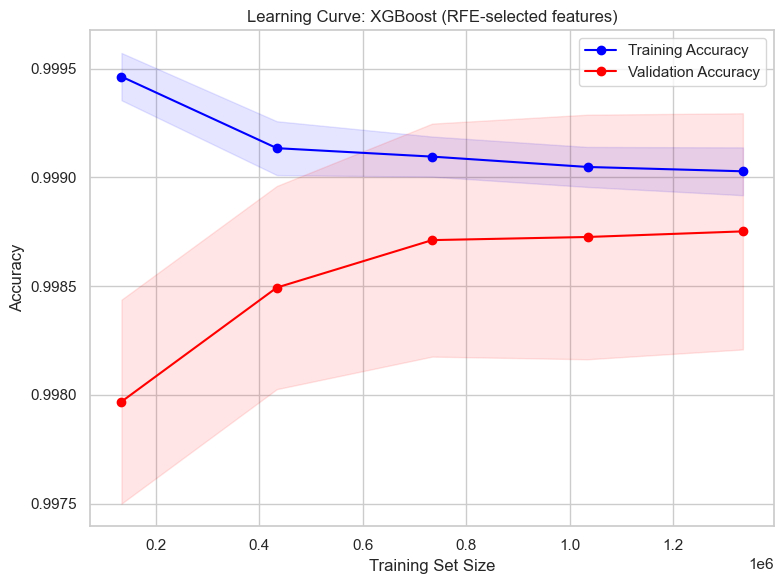


================= RANDOM FOREST PIPELINE =================


[DEBUG] Starting RFE fit (RandomForest) on TRAIN ONLY... (this may take a while)
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.

[DEBUG] RandomForest RFE Feature Ranking Results:
0: amt | Support=True, Rank=1
1: distance_km | Support=False, Rank=3
2: age | Support=True, Rank=1
3: city_pop | Support=True, Rank=1
4: year | Support=False, Rank=4
5: month | Support=True, Rank=1
6: hour | Support=True, Rank=1
7: day_of_week | Support=True, Rank=1
8: gender_M | Support=False, Rank=2
9: city_te | Support=True, Rank=1
10: state_te | Support=True, Rank=1
11: job_te | Support=True, Rank=1
12: category_te | Support=True, Rank=1

=== SELECTED FEATURES by RandomForest RFE ===
   - amt
   - age
   - city_pop
   - month
   - hour
   - day_of_week
   - city_te
   - state_te
   - job_te
   - category_te

[DEBUG] Training final RandomForest on selected features (TRAIN ONLY)...

=== 

In [57]:
# -----------------------------------------------------------
# 1) IMPORTS & SETUP
# -----------------------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn / ML
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# XGBoost (CPU-based)
import xgboost as xgb

# RandomForest
from sklearn.ensemble import RandomForestClassifier

# Advanced encoding for high-cardinality or single-col cat
from category_encoders import TargetEncoder

# For synthetic sampling (SMOTE)
from imblearn.over_sampling import SMOTE

# Optional progress bar
from tqdm import tqdm

sns.set_style("whitegrid")

# -----------------------------------------------------------
# 2) LOAD DATA & SPLIT INTO TRAIN/VALIDATION/TEST
# -----------------------------------------------------------
"""
We assume your DataFrame is named 'df' with columns:

   'category','amt','gender','city','state','city_pop','job',
   'is_fraud','age','year','month','hour','day_of_week',
   'distance_km','amt_bin','dist_bin','citypop_bin'

Adjust if needed.
"""

useful_cols = [
    "category", "amt", "gender", "city", "state", "city_pop", "job",
    "is_fraud", "age", "year", "month", "hour", "day_of_week", 
    "distance_km"
]

df_clean = df[useful_cols].copy()
df_clean.dropna(inplace=True)

X = df_clean.drop(columns=["is_fraud"])
y = df_clean["is_fraud"].astype(int)

print("Initial shape of X:", X.shape)
print("Initial shape of y:", y.shape)
print("Class distribution:\n", y.value_counts(normalize=True)*100, "%")

# First split: 80% Train + 20% Temp
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Second split: 50% of Temp → Val, 50% of Temp → Test
# => 70% Train, 10% Validation, 20% Test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

print("\n=== FINAL SPLITS ===")
print("Train shape:", X_train_temp.shape, y_train_temp.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)

print("\nTrain class distribution:\n", y_train_temp.value_counts(normalize=True)*100, "%")
print("Val class distribution:\n", y_val.value_counts(normalize=True)*100, "%")
print("Test class distribution:\n", y_test.value_counts(normalize=True)*100, "%")

# -----------------------------------------------------------
# 3) COLUMN GROUPS FOR ENCODING
# -----------------------------------------------------------
numeric_features = [
    "amt", "distance_km", "age", "city_pop", 
    "year", "month", "hour", "day_of_week"
]
cat_small = ["gender"]             # one-hot
cat_high  = ["city","state","job","category"]  # target-encode

# -----------------------------------------------------------
# 4) COLUMNTRANSFORMER (SCALING + ENCODING)
# -----------------------------------------------------------
from sklearn.pipeline import make_pipeline

numeric_transformer = Pipeline([
    ("scaler", StandardScaler())
])

ohe_transformer = Pipeline([
    ("ohe", OneHotEncoder(drop='first', handle_unknown='ignore'))
])

target_encoder = Pipeline([
    ("target_enc", TargetEncoder(smoothing=0.3))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("ohe", ohe_transformer, cat_small),
        ("te", target_encoder, cat_high),
    ],
    remainder="drop"
)

# -----------------------------------------------------------
# 5) FIT PREPROCESSOR & APPLY SMOTE (TRAIN ONLY)
# -----------------------------------------------------------
X_train_enc = preprocessor.fit_transform(X_train_temp, y_train_temp)
print("\n[INFO] Shape of X_train_enc BEFORE SMOTE:", X_train_enc.shape)
print("Class distribution in y_train_temp BEFORE SMOTE:", np.bincount(y_train_temp))

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_enc, y_train_temp)

print("\n[INFO] Shape of X_train_enc AFTER SMOTE:", X_train_sm.shape)
print("Class distribution in y_train_sm AFTER SMOTE:", np.bincount(y_train_sm))

# -----------------------------------------------------------
# 6) ENCODE VAL & TEST WITHOUT REFITTING PREPROCESSOR
# -----------------------------------------------------------
X_val_enc  = preprocessor.transform(X_val)
X_test_enc = preprocessor.transform(X_test)

# Build final feature name list
ohe_step = preprocessor.named_transformers_['ohe'].named_steps['ohe']
ohe_feature_names = ohe_step.get_feature_names_out(cat_small)
te_cols = [f"{col}_te" for col in cat_high]
final_feature_names = numeric_features + list(ohe_feature_names) + te_cols

print("\n[DEBUG] Final Encoded Feature List (Train/Val/Test share):")
print(final_feature_names)

# ===========================================================
# PART A: XGBOOST 
# ===========================================================
print("\n==================== XGBOOST PIPELINE ====================\n")

# -----------------------------------------------------------
# A.1) RFE USING XGBoost ON TRAIN
# -----------------------------------------------------------
xgb_clf = xgboost_model = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    verbosity=1,
    tree_method='hist'
)

xgb_rfe = RFE(
    estimator=xgb_clf,
    n_features_to_select=10,
    step=1,
    verbose=1
)

print("\n[DEBUG] Starting RFE fit (XGBoost) on TRAIN ONLY... (this may take a while)")
xgb_rfe.fit(X_train_sm, y_train_sm)

xgb_support_mask = xgb_rfe.support_
xgb_ranking = xgb_rfe.ranking_

print("\n[DEBUG] XGBoost RFE Feature Ranking Results:")
for i, feat_name in enumerate(final_feature_names):
    print(f"{i}: {feat_name} | Support={xgb_support_mask[i]}, Rank={xgb_ranking[i]}")

xgb_selected_features = [f for f, s in zip(final_feature_names, xgb_support_mask) if s]
print("\n=== SELECTED FEATURES by XGBoost RFE ===")
for feat in xgb_selected_features:
    print("   -", feat)

X_train_sel_xgb = xgb_rfe.transform(X_train_sm)
X_val_sel_xgb   = xgb_rfe.transform(X_val_enc)
X_test_sel_xgb  = xgb_rfe.transform(X_test_enc)

# -----------------------------------------------------------
# A.2) TRAIN FINAL XGBOOST ON SELECTED FEATURES (TRAIN ONLY)
# -----------------------------------------------------------
final_xgb = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    verbosity=1,
    tree_method='hist'
)

print("\n[DEBUG] Training final XGBoost on selected features (TRAIN ONLY)...")
final_xgb.fit(X_train_sel_xgb, y_train_sm)

# -----------------------------------------------------------
# A.3) EVALUATE ON TRAIN SET FIRST (OVERFITTING CHECK)
# -----------------------------------------------------------
xgb_train_pred = final_xgb.predict(X_train_sel_xgb)
xgb_train_acc  = accuracy_score(y_train_sm, xgb_train_pred)

print("\n=== [XGBoost] MODEL PERFORMANCE ON TRAIN SET (WITH SMOTE) ===")
print("Accuracy (Train):", xgb_train_acc)
print("Classification Report (Train):\n", classification_report(y_train_sm, xgb_train_pred))
print("Confusion Matrix (Train):\n", confusion_matrix(y_train_sm, xgb_train_pred))

# -----------------------------------------------------------
# A.4) EVALUATE ON VALIDATION SET
# -----------------------------------------------------------
xgb_val_pred = final_xgb.predict(X_val_sel_xgb)
xgb_val_acc = accuracy_score(y_val, xgb_val_pred)

print("\n=== [XGBoost] MODEL PERFORMANCE ON VALIDATION SET ===")
print("Accuracy (Val):", xgb_val_acc)
print("Classification Report (Val):\n", classification_report(y_val, xgb_val_pred))
print("Confusion Matrix (Val):\n", confusion_matrix(y_val, xgb_val_pred))

# Decide if we want to proceed to the test set:
XGB_VAL_THRESHOLD = 0.99  # Example threshold. Adjust as needed.

if xgb_val_acc < XGB_VAL_THRESHOLD:
    print(f"\n[WARNING] [XGBoost] Validation Accuracy {xgb_val_acc:.4f} < {XGB_VAL_THRESHOLD}.")
    print("We are NOT satisfied. You may want to tweak hyperparameters, features, etc.")
    print("Skipping test evaluation for XGBoost.\n")
else:
    # -----------------------------------------------------------
    # A.5) EVALUATE ON TEST SET IF VALIDATION IS GOOD
    # -----------------------------------------------------------
    xgb_test_pred = final_xgb.predict(X_test_sel_xgb)
    xgb_test_acc = accuracy_score(y_test, xgb_test_pred)
    print("\n=== [XGBoost] MODEL PERFORMANCE ON TEST SET ===")
    print("Accuracy (Test):", xgb_test_acc)
    print("Classification Report (Test):\n", classification_report(y_test, xgb_test_pred))
    print("Confusion Matrix (Test):\n", confusion_matrix(y_test, xgb_test_pred))

# -----------------------------------------------------------
# A.6) OPTIONAL: PLOT LEARNING CURVE FOR XGBOOST
# -----------------------------------------------------------
train_sizes, train_scores, val_scores = learning_curve(
    final_xgb,
    X_train_sel_xgb,
    y_train_sm,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5),
    shuffle=True,
    random_state=42
)

train_means = np.mean(train_scores, axis=1)
train_stds  = np.std(train_scores, axis=1)
val_means   = np.mean(val_scores, axis=1)
val_stds    = np.std(val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_means, 'o-', color='blue', label='Training Accuracy')
plt.fill_between(train_sizes, train_means - train_stds, train_means + train_stds,
                 alpha=0.1, color='blue')

plt.plot(train_sizes, val_means, 'o-', color='red', label='Validation Accuracy')
plt.fill_between(train_sizes, val_means - val_stds, val_means + val_stds,
                 alpha=0.1, color='red')

plt.title('Learning Curve: XGBoost (RFE-selected features)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# ===========================================================
# PART B: RANDOM FOREST (Compare to XGBoost)
# ===========================================================
print("\n================= RANDOM FOREST PIPELINE =================\n")

# -----------------------------------------------------------
# B.1) RFE USING RANDOMFOREST ON TRAIN
# -----------------------------------------------------------
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1  # parallel
)

rf_rfe = RFE(
    estimator=rf_clf,
    n_features_to_select=10,
    step=1,
    verbose=1
)

print("\n[DEBUG] Starting RFE fit (RandomForest) on TRAIN ONLY... (this may take a while)")
rf_rfe.fit(X_train_sm, y_train_sm)

rf_support_mask = rf_rfe.support_
rf_ranking = rf_rfe.ranking_

print("\n[DEBUG] RandomForest RFE Feature Ranking Results:")
for i, feat_name in enumerate(final_feature_names):
    print(f"{i}: {feat_name} | Support={rf_support_mask[i]}, Rank={rf_ranking[i]}")

rf_selected_features = [f for f, s in zip(final_feature_names, rf_support_mask) if s]
print("\n=== SELECTED FEATURES by RandomForest RFE ===")
for feat in rf_selected_features:
    print("   -", feat)

X_train_sel_rf = rf_rfe.transform(X_train_sm)
X_val_sel_rf   = rf_rfe.transform(X_val_enc)
X_test_sel_rf  = rf_rfe.transform(X_test_enc)

# -----------------------------------------------------------
# B.2) TRAIN FINAL RANDOMFOREST ON SELECTED FEATURES (TRAIN ONLY)
# -----------------------------------------------------------
final_rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

print("\n[DEBUG] Training final RandomForest on selected features (TRAIN ONLY)...")
final_rf.fit(X_train_sel_rf, y_train_sm)

# -----------------------------------------------------------
# B.3) EVALUATE ON TRAIN SET FIRST (OVERFITTING CHECK)
# -----------------------------------------------------------
rf_train_pred = final_rf.predict(X_train_sel_rf)
rf_train_acc  = accuracy_score(y_train_sm, rf_train_pred)

print("\n=== [RandomForest] MODEL PERFORMANCE ON TRAIN SET (WITH SMOTE) ===")
print("Accuracy (Train):", rf_train_acc)
print("Classification Report (Train):\n", classification_report(y_train_sm, rf_train_pred))
print("Confusion Matrix (Train):\n", confusion_matrix(y_train_sm, rf_train_pred))

# -----------------------------------------------------------
# B.4) EVALUATE ON VALIDATION SET
# -----------------------------------------------------------
rf_val_pred = final_rf.predict(X_val_sel_rf)
rf_val_acc = accuracy_score(y_val, rf_val_pred)

print("\n=== [RandomForest] MODEL PERFORMANCE ON VALIDATION SET ===")
print("Accuracy (Val):", rf_val_acc)
print("Classification Report (Val):\n", classification_report(y_val, rf_val_pred))
print("Confusion Matrix (Val):\n", confusion_matrix(y_val, rf_val_pred))

# Decide if we want to proceed to the test set:
RF_VAL_THRESHOLD = 0.99  # Example threshold. Adjust as needed.

if rf_val_acc < RF_VAL_THRESHOLD:
    print(f"\n[WARNING] [RandomForest] Validation Accuracy {rf_val_acc:.4f} < {RF_VAL_THRESHOLD}.")
    print("We are NOT satisfied. Consider tuning hyperparameters, features, etc.")
    print("Skipping test evaluation for RandomForest.\n")
else:
    # -----------------------------------------------------------
    # B.5) EVALUATE ON TEST SET IF VALIDATION IS GOOD
    # -----------------------------------------------------------
    rf_test_pred = final_rf.predict(X_test_sel_rf)
    rf_test_acc = accuracy_score(y_test, rf_test_pred)
    print("\n=== [RandomForest] MODEL PERFORMANCE ON TEST SET ===")
    print("Accuracy (Test):", rf_test_acc)
    print("Classification Report (Test):\n", classification_report(y_test, rf_test_pred))
    print("Confusion Matrix (Test):\n", confusion_matrix(y_test, rf_test_pred))



print("\n[INFO] Done! You can now compare XGBoost vs RandomForest performance on train, validation, and test sets.")


Initial shape of X: (1048575, 13)
Initial shape of y: (1048575,)
Class distribution:
 is_fraud
0   99.42722
1    0.57278
Name: proportion, dtype: float64 %

=== FINAL SPLITS ===
Train shape: (838860, 13) (838860,)
Validation shape: (104857, 13) (104857,)
Test shape: (104858, 13) (104858,)

Train class distribution:
 is_fraud
0   99.42720
1    0.57280
Name: proportion, dtype: float64 %
Val class distribution:
 is_fraud
0   99.42779
1    0.57221
Name: proportion, dtype: float64 %
Test class distribution:
 is_fraud
0   99.42684
1    0.57316
Name: proportion, dtype: float64 %

[INFO] Shape of X_train_enc BEFORE SMOTE: (838860, 13)
Class distribution in y_train_temp BEFORE SMOTE: [834055   4805]

[INFO] Shape of X_train_enc AFTER SMOTE: (1668110, 13)
Class distribution in y_train_sm AFTER SMOTE: [834055 834055]

[DEBUG] Final Encoded Feature List (Train/Val/Test share):
['amt', 'distance_km', 'age', 'city_pop', 'year', 'month', 'hour', 'day_of_week', 'gender_M', 'city_te', 'state_te', 'job_

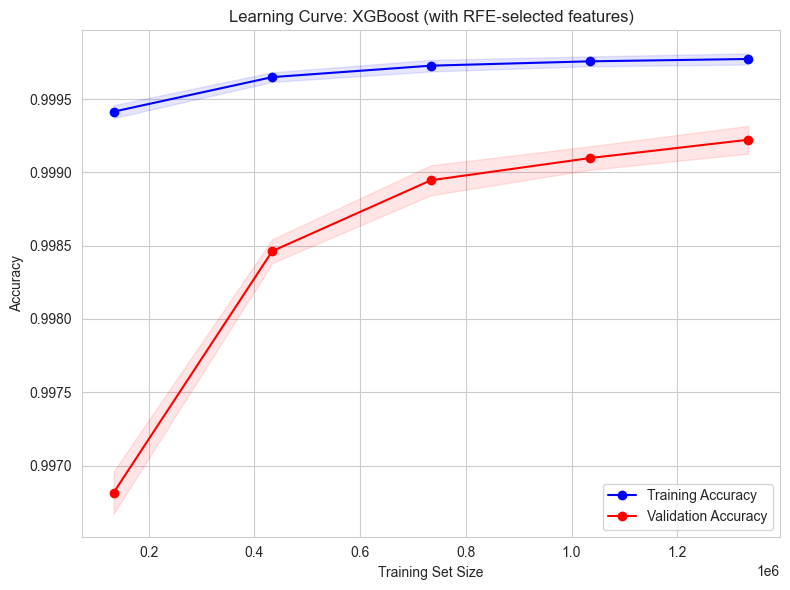


[INFO] Done! Code now prints in the order: Train -> Val -> (Conditionally) Test, plus learning curve.


In [29]:
# -----------------------------------------------------------
# 1) IMPORTS & SETUP
# -----------------------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn / ML
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# XGBoost (CPU-based)
import xgboost as xgb

# Advanced encoding for high-cardinality or single-col cat
from category_encoders import TargetEncoder

# For synthetic sampling (SMOTE)
from imblearn.over_sampling import SMOTE

# Optional progress bar
from tqdm import tqdm

sns.set_style("whitegrid")

# -----------------------------------------------------------
# 2) LOAD DATA & SPLIT INTO TRAIN/VALIDATION/TEST
# -----------------------------------------------------------
"""
We assume your DataFrame is named 'df' with columns:

   'category','amt','gender','city','state','city_pop','job',
   'is_fraud','age','year','month','hour','day_of_week',
   'distance_km','amt_bin','dist_bin','citypop_bin'

Adjust if needed.
"""

useful_cols = [
    "category", "amt", "gender", "city", "state", "city_pop", "job",
    "is_fraud", "age", "year", "month", "hour", "day_of_week", 
    "distance_km"
]

df_clean = df[useful_cols].copy()
df_clean.dropna(inplace=True)

X = df_clean.drop(columns=["is_fraud"])
y = df_clean["is_fraud"].astype(int)

print("Initial shape of X:", X.shape)
print("Initial shape of y:", y.shape)
print("Class distribution:\n", y.value_counts(normalize=True)*100, "%")

# First split: 80% Train + 20% Temp
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Second split: 50% of Temp → Val, 50% of Temp → Test
# => 70% Train, 10% Validation, 20% Test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

print("\n=== FINAL SPLITS ===")
print("Train shape:", X_train_temp.shape, y_train_temp.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)

print("\nTrain class distribution:\n", y_train_temp.value_counts(normalize=True)*100, "%")
print("Val class distribution:\n", y_val.value_counts(normalize=True)*100, "%")
print("Test class distribution:\n", y_test.value_counts(normalize=True)*100, "%")

# -----------------------------------------------------------
# 3) COLUMN GROUPS FOR ENCODING
# -----------------------------------------------------------
numeric_features = [
    "amt", "distance_km", "age", "city_pop", 
    "year", "month", "hour", "day_of_week"
]
cat_small = ["gender"]             # one-hot
cat_high  = ["city","state","job","category"]  # target-encode

# -----------------------------------------------------------
# 4) COLUMNTRANSFORMER (SCALING + ENCODING)
# -----------------------------------------------------------
from sklearn.pipeline import make_pipeline

numeric_transformer = Pipeline([
    ("scaler", StandardScaler())
])

ohe_transformer = Pipeline([
    ("ohe", OneHotEncoder(drop='first', handle_unknown='ignore'))
])

target_encoder = Pipeline([
    ("target_enc", TargetEncoder(smoothing=0.3))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("ohe", ohe_transformer, cat_small),
        ("te", target_encoder, cat_high),
    ],
    remainder="drop"
)

# -----------------------------------------------------------
# 5) FIT PREPROCESSOR & APPLY SMOTE (TRAIN ONLY)
# -----------------------------------------------------------
X_train_enc = preprocessor.fit_transform(X_train_temp, y_train_temp)
print("\n[INFO] Shape of X_train_enc BEFORE SMOTE:", X_train_enc.shape)
print("Class distribution in y_train_temp BEFORE SMOTE:", np.bincount(y_train_temp))

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_enc, y_train_temp)

print("\n[INFO] Shape of X_train_enc AFTER SMOTE:", X_train_sm.shape)
print("Class distribution in y_train_sm AFTER SMOTE:", np.bincount(y_train_sm))

# -----------------------------------------------------------
# 6) ENCODE VAL & TEST WITHOUT REFITTING PREPROCESSOR
# -----------------------------------------------------------
X_val_enc  = preprocessor.transform(X_val)
X_test_enc = preprocessor.transform(X_test)

# Build final feature name list
ohe_step = preprocessor.named_transformers_['ohe'].named_steps['ohe']
ohe_feature_names = ohe_step.get_feature_names_out(cat_small)
te_cols = [f"{col}_te" for col in cat_high]
final_feature_names = numeric_features + list(ohe_feature_names) + te_cols

print("\n[DEBUG] Final Encoded Feature List (Train/Val/Test share):")
print(final_feature_names)

# -----------------------------------------------------------
# 7) RFE USING XGBoost ON TRAIN
# -----------------------------------------------------------
xgb_clf = xgboost_model = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    verbosity=1,
    tree_method='hist'
)

rfe = RFE(
    estimator=xgb_clf,
    n_features_to_select=10,
    step=1,
    verbose=1
)

print("\n[DEBUG] Starting RFE fit on TRAIN ONLY... (this may take a while)")
rfe.fit(X_train_sm, y_train_sm)

support_mask = rfe.support_
ranking = rfe.ranking_

print("\n[DEBUG] RFE Feature Ranking Results:")
for i, feat_name in enumerate(final_feature_names):
    print(f"{i}: {feat_name} | Support={support_mask[i]}, Rank={ranking[i]}")

selected_features = [f for f, s in zip(final_feature_names, support_mask) if s]
print("\n=== SELECTED FEATURES by RFE ===")
for feat in selected_features:
    print("   -", feat)

X_train_sel = rfe.transform(X_train_sm)
X_val_sel   = rfe.transform(X_val_enc)
X_test_sel  = rfe.transform(X_test_enc)

# -----------------------------------------------------------
# 8) TRAIN FINAL XGBOOST ON SELECTED FEATURES (TRAIN ONLY)
# -----------------------------------------------------------
final_xgb = xgb.XGBClassifier(
    n_estimators=500,          # Increase the number of trees
    learning_rate=0.15,        # Smaller learning rate
    max_depth=8,               # Moderate tree depth
    min_child_weight=5,        # Prevent overfitting
    subsample=0.8,             # Use 80% of data for each tree
    colsample_bytree=0.8,      # Use 80% of features for each tree
    gamma=1,                   # Add regularization
    scale_pos_weight=173,      # Address class imbalance
    random_state=42,
    verbosity=1,
    tree_method='hist'         # Optimized tree growth
)

print("\n[DEBUG] Training final XGBoost on selected features (TRAIN ONLY)...")
final_xgb.fit(X_train_sel, y_train_sm)

# -----------------------------------------------------------
# 9) EVALUATE ON TRAIN SET FIRST (OVERFITTING CHECK)
# -----------------------------------------------------------
train_pred = final_xgb.predict(X_train_sel)
train_acc  = accuracy_score(y_train_sm, train_pred)

print("\n=== MODEL PERFORMANCE ON TRAIN SET (WITH SMOTE) ===")
print("Accuracy (Train):", train_acc)
print("Classification Report (Train):\n", classification_report(y_train_sm, train_pred))
print("Confusion Matrix (Train):\n", confusion_matrix(y_train_sm, train_pred))

# -----------------------------------------------------------
# 10) EVALUATE ON VALIDATION SET
# -----------------------------------------------------------
y_val_pred = final_xgb.predict(X_val_sel)
val_acc = accuracy_score(y_val, y_val_pred)

print("\n=== MODEL PERFORMANCE ON VALIDATION SET ===")
print("Accuracy (Val):", val_acc)
print("Classification Report (Val):\n", classification_report(y_val, y_val_pred))
print("Confusion Matrix (Val):\n", confusion_matrix(y_val, y_val_pred))

# Decide if we want to proceed to the test set:
VAL_THRESHOLD = 0.99  # Example threshold. Adjust as needed.

if val_acc < VAL_THRESHOLD:
    print(f"\n[WARNING] Validation Accuracy {val_acc:.4f} < {VAL_THRESHOLD}.")
    print("We are NOT satisfied. You may want to tweak hyperparameters, features, etc.")
    print("Skipping test evaluation for now.\n")
else:
    # -----------------------------------------------------------
    # 11) EVALUATE ON TEST SET IF VALIDATION IS GOOD
    # -----------------------------------------------------------
    y_test_pred = final_xgb.predict(X_test_sel)
    test_acc = accuracy_score(y_test, y_test_pred)
    print("\n=== MODEL PERFORMANCE ON TEST SET ===")
    print("Accuracy (Test):", test_acc)
    print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))
    print("Confusion Matrix (Test):\n", confusion_matrix(y_test, y_test_pred))

# -----------------------------------------------------------
# 12) OPTIONAL: PLOT LEARNING CURVE
# -----------------------------------------------------------
from sklearn.model_selection import learning_curve

# We run the curve on the final_xgb model and the selected training data
train_sizes, train_scores, val_scores = learning_curve(
    final_xgb,
    X_train_sel,
    y_train_sm,
    cv=5,              # e.g. 5-fold CV
    n_jobs=-1,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5),
    shuffle=True,
    random_state=42
)

train_means = np.mean(train_scores, axis=1)
train_stds  = np.std(train_scores, axis=1)
val_means   = np.mean(val_scores, axis=1)
val_stds    = np.std(val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_means, 'o-', color='blue', label='Training Accuracy')
plt.fill_between(train_sizes, train_means - train_stds, train_means + train_stds,
                 alpha=0.1, color='blue')

plt.plot(train_sizes, val_means, 'o-', color='red', label='Validation Accuracy')
plt.fill_between(train_sizes, val_means - val_stds, val_means + val_stds,
                 alpha=0.1, color='red')

plt.title('Learning Curve: XGBoost (with RFE-selected features)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

print("\n[INFO] Done! Code now prints in the order: Train -> Val -> (Conditionally) Test, plus learning curve.")


In [31]:
df.head()
df.to_csv('updatedcreditcard.csv', index=False)